In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Credit_Risk_Dataset_Onyx_Data_September_25.xlsx')
df.head()

client_ID  person_age  person_income person_home_ownership  \
0  CUST_00001          22          59000                  RENT   
1  CUST_00002          21           9600                   OWN   
2  CUST_00003          25           9600              MORTGAGE   
3  CUST_00004          23          65500                  RENT   
4  CUST_00005          24          54400                  RENT   

   person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0              123.0    PERSONAL          D      35000          16.02   
1                5.0   EDUCATION          B       1000          11.14   
2                1.0     MEDICAL          C       5500          12.87   
3                4.0     MEDICAL          C      35000          15.23   
4                8.0     MEDICAL          C      35000          14.27   

   loan_status  ...  city_latitude city_longitude  employment_type  \
0            1  ...        43.6532       -79.3832    Self-employed   
1            0  ...        43.6532       -79.3832        Full-time   
2            1  ...        51.6214        -3.9436        Full-time   
3            1  ...        49.2827      -123.1207        Part-time   
4            1  ...        42.8864       -78.8784        Part-time   

  loan_term_months loan_to_income_ratio    other_debt debt_to_income_ratio  \
0               36             0.593220   8402.453850             0.735635   
1               36             0.104167   1607.802794             0.271646   
2               36             0.572917   2760.505633             0.860469   
3               12             0.534351   7155.286150             0.643592   
4               36             0.643382  15626.153439             0.930628   

  open_accounts credit_utilization_ratio  past_delinquencies  
0            14                 0.495557                   0  
1            10                 0.585436                   3  
2            14                 0.750732                   0  
3            15                 0.379333                   0  
4             4                 0.228103                   0  

[5 rows x 29 columns]

In [3]:
df.columns

Index(['client_ID', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'gender',
       'marital_status', 'education_level', 'country', 'state', 'city',
       'city_latitude', 'city_longitude', 'employment_type',
       'loan_term_months', 'loan_to_income_ratio', 'other_debt',
       'debt_to_income_ratio', 'open_accounts', 'credit_utilization_ratio',
       'past_delinquencies'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

In [5]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  city_latitude  city_longitude  \
count                32581.000000   32581.000000    32581.000000   
mean                     5.804211      45.407613      -63.805473   
std                      4.055001       7.644809       46.615580   
min                      2.000000      29.760400     -123.365600   
25%                      3.000000      40.712800      -96.797000   
50%                      4.000000      46.813900      -75.697200   
75%                      8.000000      51.507400       -3.943600   
max                     30.000000      55.953300       -0.127800   

       loan_term_months  loan_to_income_ratio    other_debt  \
count      32581.000000          32581.000000  3.258100e+04   
mean          38.501581              0.170553  1.156796e+04   
std           16.012441              0.107049  1.306093e+04   
min           12.000000              0.000789  2.252074e+02   
25%           24.000000              0.089655  5.387168e+03   
50%           36.000000              0.148148  8.995071e+03   
75%           60.000000              0.229167  1.456293e+04   
max           60.000000              0.830000  1.187999e+06   

       debt_to_income_ratio  open_accounts  credit_utilization_ratio  \
count          32581.000000   32581.000000              32581.000000   
mean               0.345208       8.042018                  0.499884   
std                0.129406       4.328087                  0.259530   
min                0.064502       0.000000                  0.050001   
25%                0.251236       4.000000                  0.275358   
50%                0.333188       8.000000                  0.500289   
75%                0.423142      12.000000                  0.725056   
max                1.053888      15.000000                  0.949998   

       past_delinquencies  
count        32581.000000  
mean             0.505141  
std              0.711745  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              6.000000

In [6]:
df.shape

(32581, 29)

In [7]:
df.drop(columns = ['city_latitude','city_longitude'],inplace = True)
df.head()

client_ID  person_age  person_income person_home_ownership  \
0  CUST_00001          22          59000                  RENT   
1  CUST_00002          21           9600                   OWN   
2  CUST_00003          25           9600              MORTGAGE   
3  CUST_00004          23          65500                  RENT   
4  CUST_00005          24          54400                  RENT   

   person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0              123.0    PERSONAL          D      35000          16.02   
1                5.0   EDUCATION          B       1000          11.14   
2                1.0     MEDICAL          C       5500          12.87   
3                4.0     MEDICAL          C      35000          15.23   
4                8.0     MEDICAL          C      35000          14.27   

   loan_status  ...     state       city  employment_type loan_term_months  \
0            1  ...   Ontario    Toronto    Self-employed               36   
1            0  ...   Ontario    Toronto        Full-time               36   
2            1  ...     Wales    Swansea        Full-time               36   
3            1  ...        BC  Vancouver        Part-time               12   
4            1  ...  New York    Buffalo        Part-time               36   

  loan_to_income_ratio    other_debt debt_to_income_ratio open_accounts  \
0             0.593220   8402.453850             0.735635            14   
1             0.104167   1607.802794             0.271646            10   
2             0.572917   2760.505633             0.860469            14   
3             0.534351   7155.286150             0.643592            15   
4             0.643382  15626.153439             0.930628             4   

  credit_utilization_ratio past_delinquencies  
0                 0.495557                  0  
1                 0.585436                  3  
2                 0.750732                  0  
3                 0.379333                  0  
4                 0.228103                  0  

[5 rows x 27 columns]

In [8]:
df.isnull().sum()

client_ID                        0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
gender                           0
marital_status                   0
education_level                  0
country                          0
state                            0
city                             0
employment_type                  0
loan_term_months                 0
loan_to_income_ratio             0
other_debt                       0
debt_to_income_ratio             0
open_accounts                    0
credit_utilization_ratio         0
past_delinquencies               0
dtype: int64

In [9]:
df['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [10]:
import math

df['emp_length_missing'] = df['person_emp_length'].isna().astype(int)
df['person_emp_length'] = df['person_emp_length'].fillna(round(df['person_emp_length'].mean()))

In [11]:

# Step 1: Create missingness flag
df['loan_int_rate_missing'] = df['loan_int_rate'].isna().astype(int)


In [12]:
# Step 2: Compute median interest rate per loan_grade
median_rate_by_grade = df.groupby('loan_grade')['loan_int_rate'].median()
median_rate_by_grade

loan_grade
A     7.490
B    10.990
C    13.480
D    15.310
E    16.820
F    18.535
G    20.160
Name: loan_int_rate, dtype: float64

In [13]:
# Step 3: Map each loan_grade to its median rate, then fill missing values
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df['loan_grade'].map(median_rate_by_grade)
)

df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [14]:
# Step 4: Round to 2 decimal places
df['loan_int_rate'] = df['loan_int_rate'].round(2)

print("Imputation complete. Missing values now:", df['loan_int_rate'].isna().sum())

Imputation complete. Missing values now: 0


In [15]:
df.isnull().sum()

client_ID                     0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
gender                        0
marital_status                0
education_level               0
country                       0
state                         0
city                          0
employment_type               0
loan_term_months              0
loan_to_income_ratio          0
other_debt                    0
debt_to_income_ratio          0
open_accounts                 0
credit_utilization_ratio      0
past_delinquencies            0
emp_length_missing            0
loan_int_rate_missing         0
dtype: int64

In [16]:
df.duplicated().sum()

0

What is the overall default rate (loan_status = 1)?

In [18]:
# Calculate default rate
default_rate = df['loan_status'].mean() * 100

print(f"Overall Default Rate: {default_rate:.2f}%")

Overall Default Rate: 21.82%


How does default vary by loan_grade?

In [20]:
# Step 1: Group by loan_grade and calculate default rate
default_by_grade = df.groupby('loan_grade')['loan_status'].mean() * 100

# Step 2: Round and sort from highest to lowest risk
default_by_grade = default_by_grade.round(2).sort_values(ascending=False)

print("Default Rate by Loan Grade:")
print(default_by_grade)

Default Rate by Loan Grade:
loan_grade
G    98.44
F    70.54
E    64.42
D    59.05
C    20.73
B    16.28
A     9.96
Name: loan_status, dtype: float64


Which loan_intent has the highest average loan_amnt?

In [22]:
df.groupby('loan_intent')['loan_amnt'].mean()

loan_intent
DEBTCONSOLIDATION     9594.886800
EDUCATION             9482.678599
HOMEIMPROVEMENT      10360.520111
MEDICAL               9259.582441
PERSONAL              9573.772867
VENTURE               9583.777758
Name: loan_amnt, dtype: float64

In [23]:
highest_intent = df.groupby('loan_intent')['loan_amnt'].mean().idxmax()
highest_amount = df.groupby('loan_intent')['loan_amnt'].mean().max()

print(f"Highest average: {highest_intent} → ${highest_amount:.2f}")

Highest average: HOMEIMPROVEMENT → $10360.52


Is there a relationship between person_age and loan_percent_income?

In [25]:
corr = df['person_age'].corr(df['loan_percent_income'])
print(f"Correlation between age and loan % income: {corr:.3f}")

Correlation between age and loan % income: -0.042


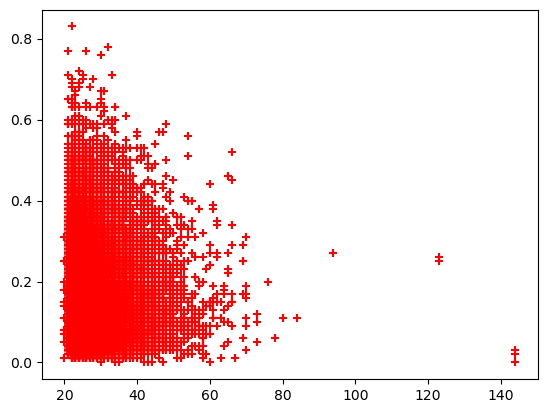

In [26]:
plt.scatter(x=df['person_age'],y=df['loan_percent_income'],color ='red',marker ='+')

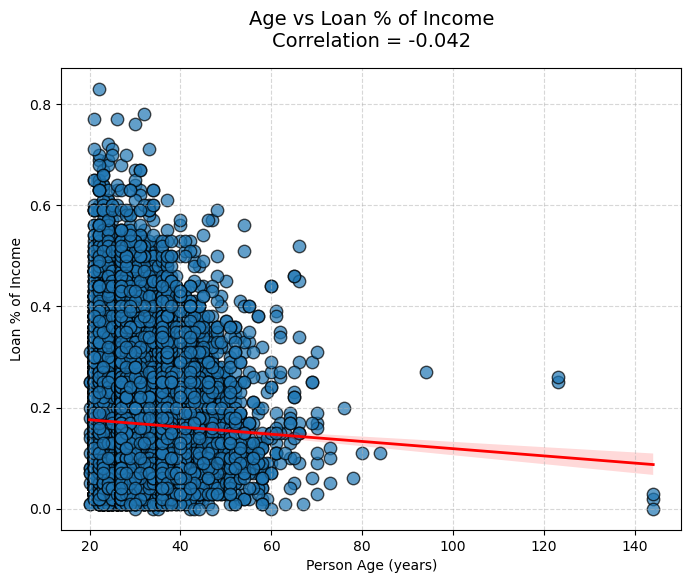

In [27]:
#scatter + trend line + correlation label
# -------------------------------------------------
plt.figure(figsize=(8, 6))
sns.regplot(
    x='person_age',
    y='loan_percent_income',
    data=df,
    scatter_kws={'s': 80, 'edgecolor': 'k', 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Add titles / labels
plt.title(f'Age vs Loan % of Income\nCorrelation = {corr:.3f}', fontsize=14, pad=15)
plt.xlabel('Person Age (years)')
plt.ylabel('Loan % of Income')
plt.grid(True, linestyle='--', alpha=0.5)

Do homeowners (person_home_ownership = OWN/MORTGAGE) default less?

In [29]:
df['is_homeowner'] = df['person_home_ownership'].isin(['OWN', 'MORTGAGE'])
print(df.groupby('is_homeowner')['loan_status'].mean())

is_homeowner
False    0.315653
True     0.117482
Name: loan_status, dtype: float64


How does debt_to_income_ratio differ across employment_type?

In [31]:
df.groupby('employment_type')['debt_to_income_ratio'].mean()

employment_type
Full-time        0.344144
Part-time        0.346993
Self-employed    0.345447
Unemployed       0.349948
Name: debt_to_income_ratio, dtype: float64

Are longer loan_term_months associated with higher interest rates?

In [33]:
df.groupby('loan_term_months')['loan_int_rate'].mean()

loan_term_months
12    11.032084
24    10.946639
36    11.022824
60    11.039362
Name: loan_int_rate, dtype: float64

Which education_level has the lowest past_delinquencies?

In [35]:
df.groupby('education_level')['past_delinquencies'].sum()

education_level
Bachelor       5825
High School    6707
Master         3140
PhD             786
Name: past_delinquencies, dtype: int64

Target Variable: Distribution of Loan Defaults

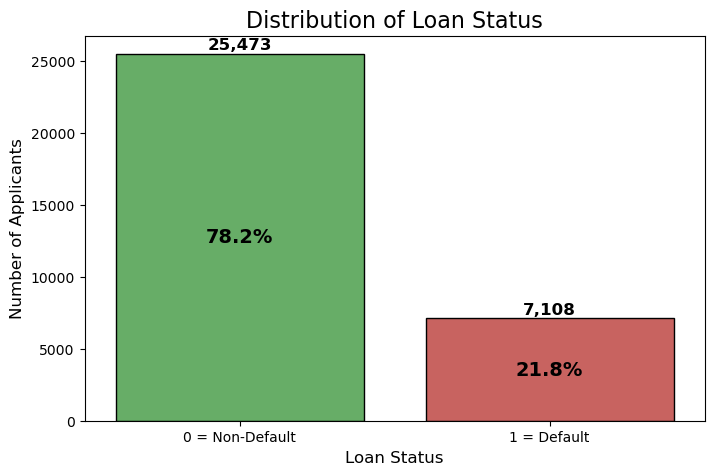

In [37]:
plt.figure(figsize=(8,5))

status_counts = df['loan_status'].value_counts().sort_index()

ax = sns.countplot(data = df, x='loan_status',palette=['#5cb85c', '#d9534f'], edgecolor='black')

plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)

# Set custom labels for the x-axis
ax.set_xticklabels(['0 = Non-Default', '1 = Default'])

# Add count labels on top
for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 100, 
             f'{int(height):,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add percentage labels
total = status_counts.sum()
for i, count in enumerate(status_counts):
    pct = count / total * 100
    plt.text(i, count/2, f'{pct:.1f}%', ha='center', va='center', 
             fontsize=14, fontweight='bold', color='black')


Age vs. Default Status

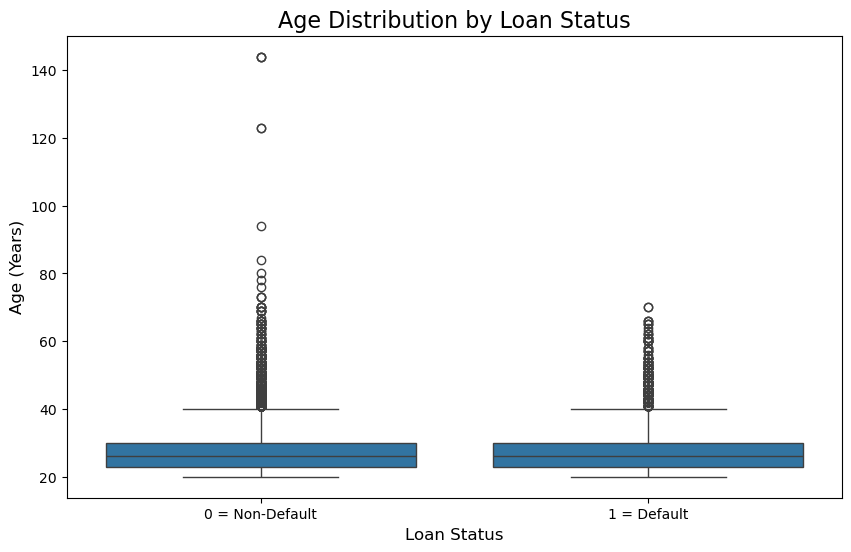

In [39]:
plt.figure(figsize=(10, 6))
    
# Use a box plot for a clear comparison of distributions
sns.boxplot(x='loan_status', y='person_age', data=df)
    
plt.title('Age Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
    
# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['0 = Non-Default', '1 = Default'])
    
plt.show()

Default Rate by Home Ownership

In [41]:
default_rates = df.groupby('person_home_ownership')['loan_status'].sum().sort_values(ascending=False)
default_rates

person_home_ownership
RENT        5192
MORTGAGE    1690
OWN          193
OTHER         33
Name: loan_status, dtype: int64

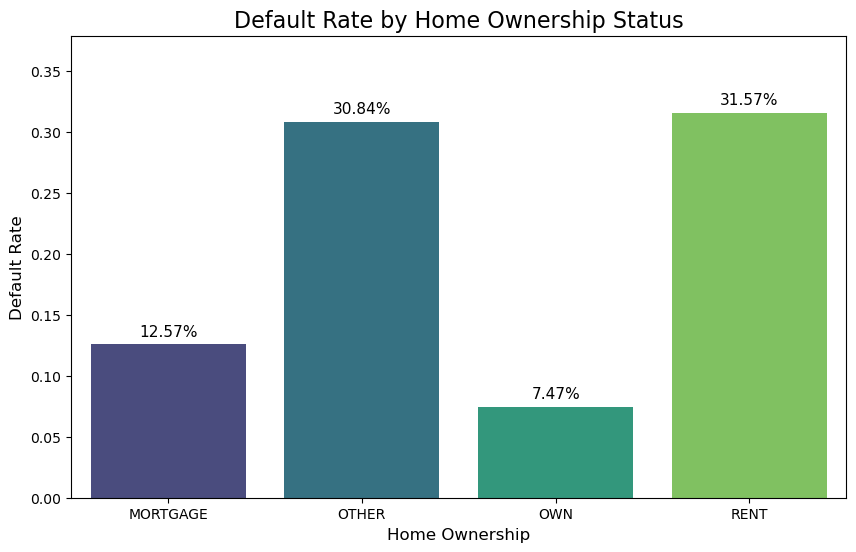

In [42]:

# To get the default RATE, we group by the category and calculate the mean of 'loan_status'
# (since Default=1 and Non-Default=0, the mean is the default rate)
default_rates = df.groupby('person_home_ownership')['loan_status'].mean().reset_index()
    
plt.figure(figsize=(10, 6))
    
# Plot the calculated default rates
ax = sns.barplot(x='person_home_ownership', y='loan_status', data=default_rates, palette='viridis')
    
plt.title('Default Rate by Home Ownership Status', fontsize=16)
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
    
# Set y-axis limit to 0-1 (or lower) to represent the rate clearly
plt.ylim(0, default_rates['loan_status'].max() * 1.2) # Set limit to 20% above max rate
    
# Add rate labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11)
        
plt.show()

Interest Rate vs. Default Status

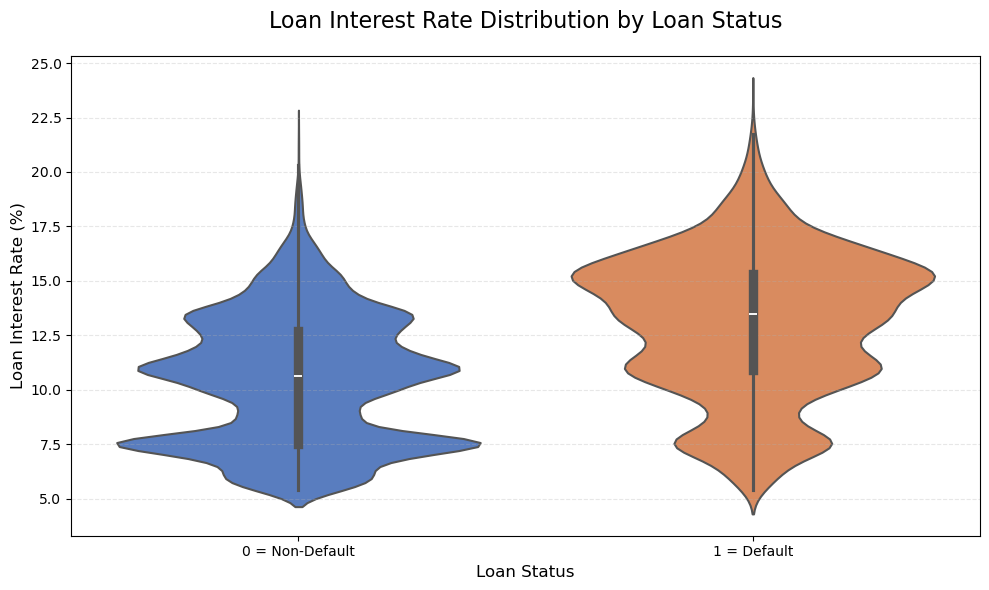

In [44]:

# --- Create the Violin Plot ---
plt.figure(figsize=(10, 6))

sns.violinplot(
    x='loan_status',
    y='loan_int_rate',
    data=df,
    palette='muted',
    inner='box',        # Shows quartiles inside violin
    linewidth=1.5
)

# --- Customize the plot ---
plt.title('Loan Interest Rate Distribution by Loan Status', fontsize=16, pad=20)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Interest Rate (%)', fontsize=12)

# Custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['0 = Non-Default', '1 = Default'])

# Optional: Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# --- Show the plot ---
plt.show()

Credit History: Debt-to-Income Ratio vs. Default

([<matplotlib.axis.XTick at 0x25b3b618410>,
 [Text(0, 0, '0 = Non-Default'), Text(1, 0, '1 = Default')])

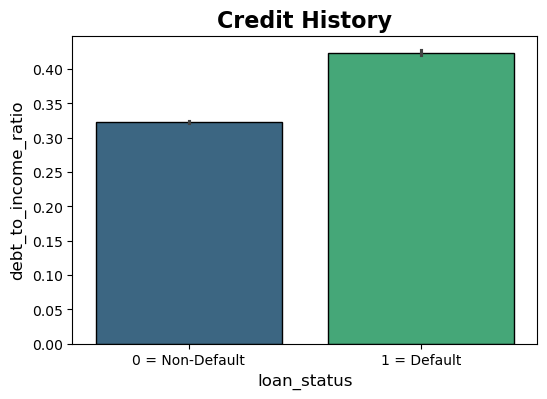

In [46]:

plt.figure(figsize = (6,4))

ax = sns.barplot(x='loan_status',y='debt_to_income_ratio',data=df,palette='viridis',edgecolor='black')

plt.title('Credit History',fontsize=16,fontweight='bold')
plt.xlabel('loan_status',fontsize=12)
plt.ylabel('debt_to_income_ratio',fontsize=12)
# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['0 = Non-Default', '1 = Default'])



In [47]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city','employment_type']

for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print('='*20)

Value counts for person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
Value counts for loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
Value counts for loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
Value counts for cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
Value counts for gender:
gender
Male      16371
Female    16210
Name: count, dtype: int64
Value counts for marital_status:
marital_status
Single      16368
Married     11393
Divorced     3173
Widowed      1647
Name: count, dtype: int64
Value counts for education_level:
education_level
High School    13185
Bachelor       11390
Master          6508
PhD   

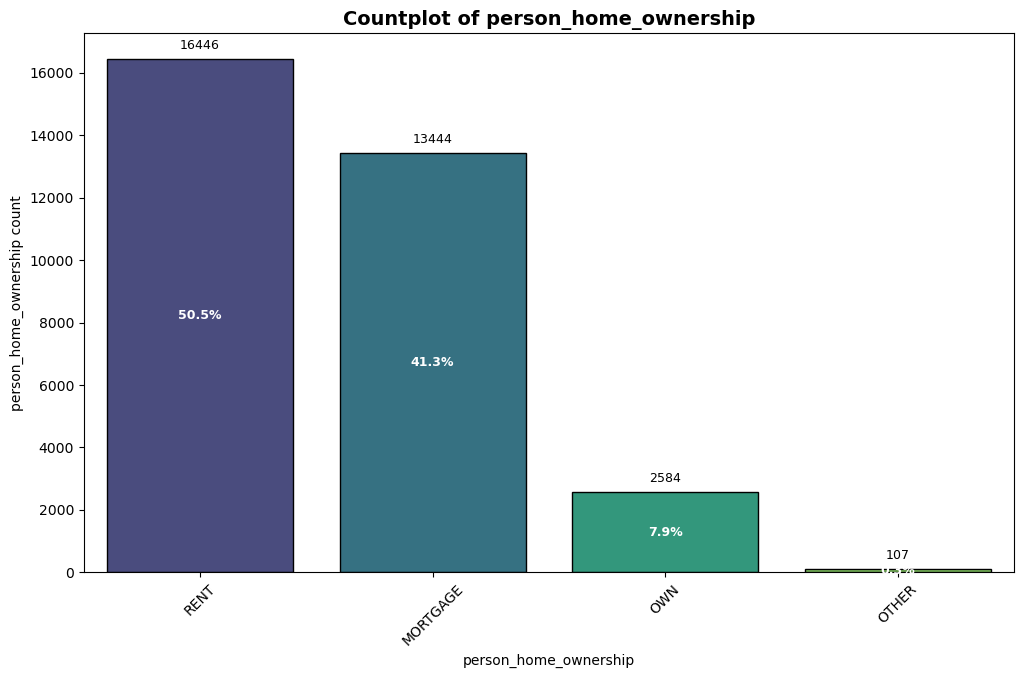

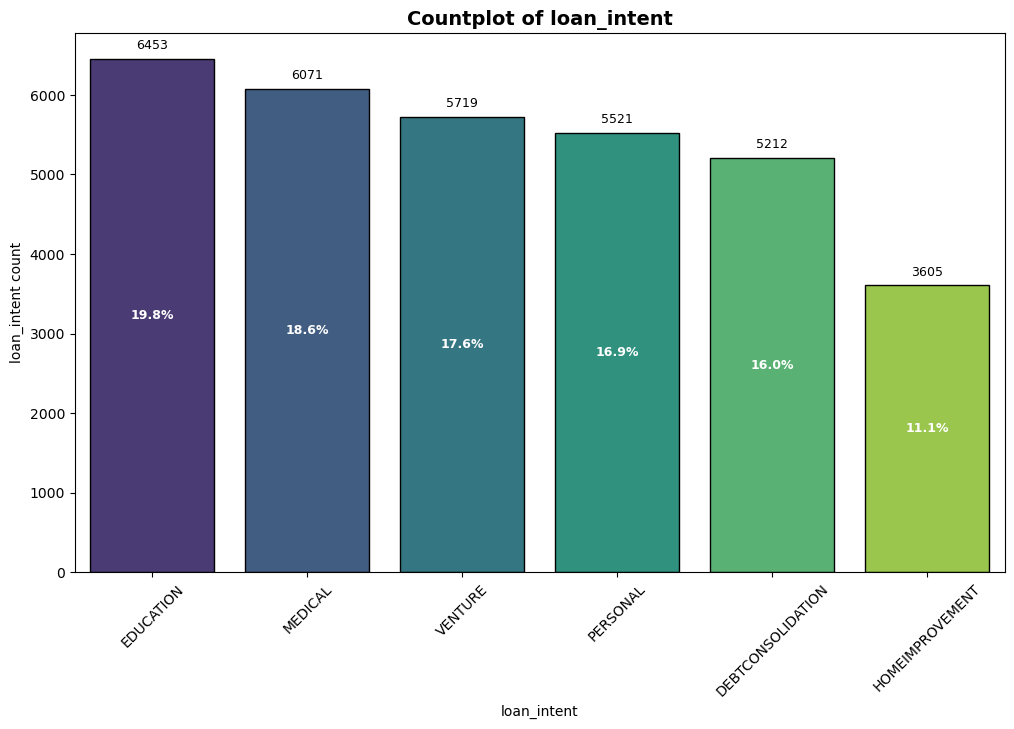

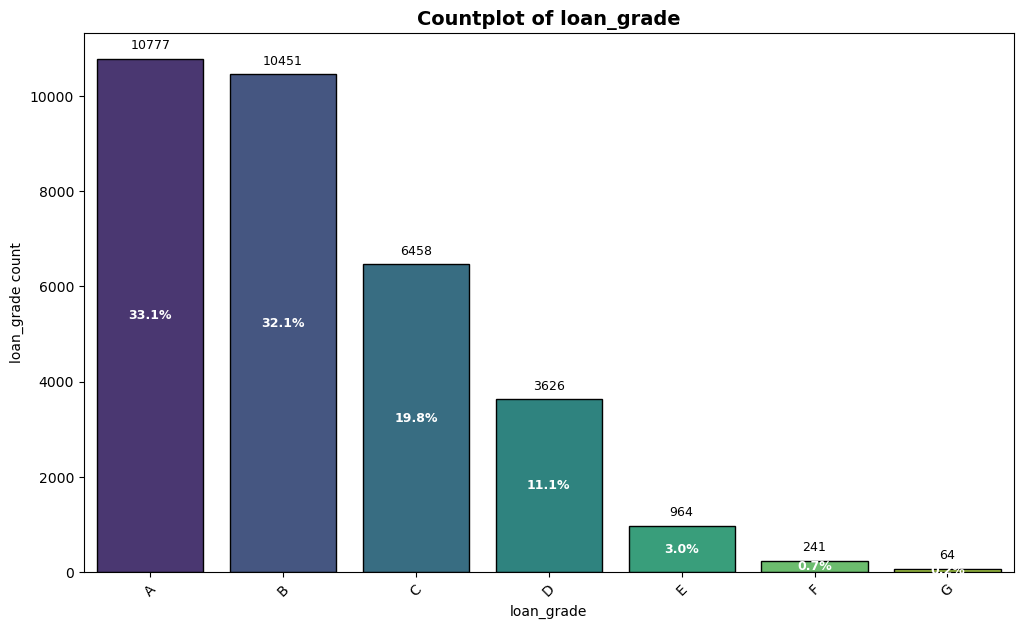

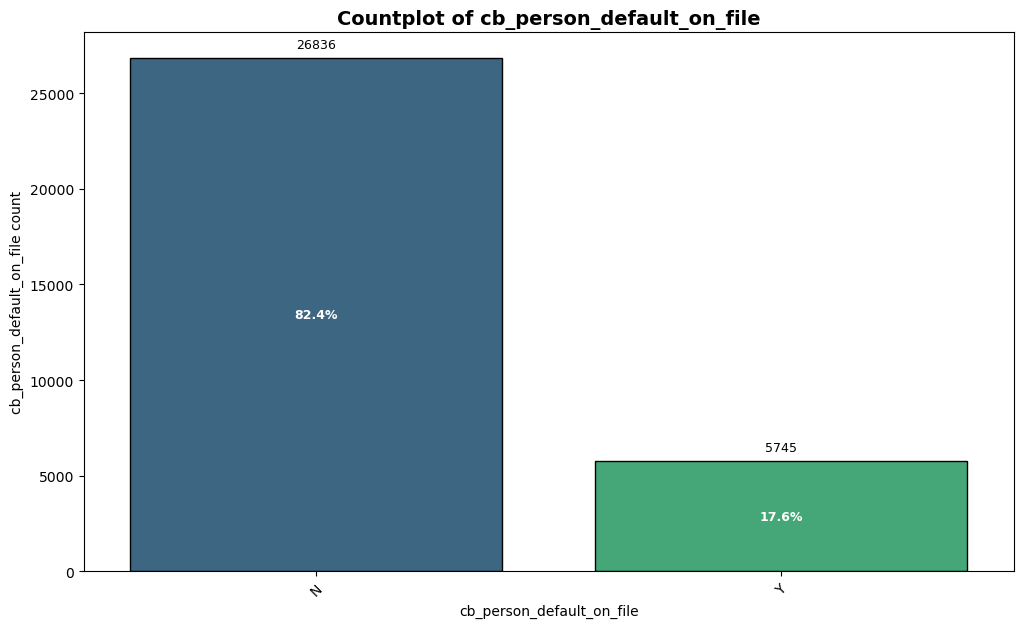

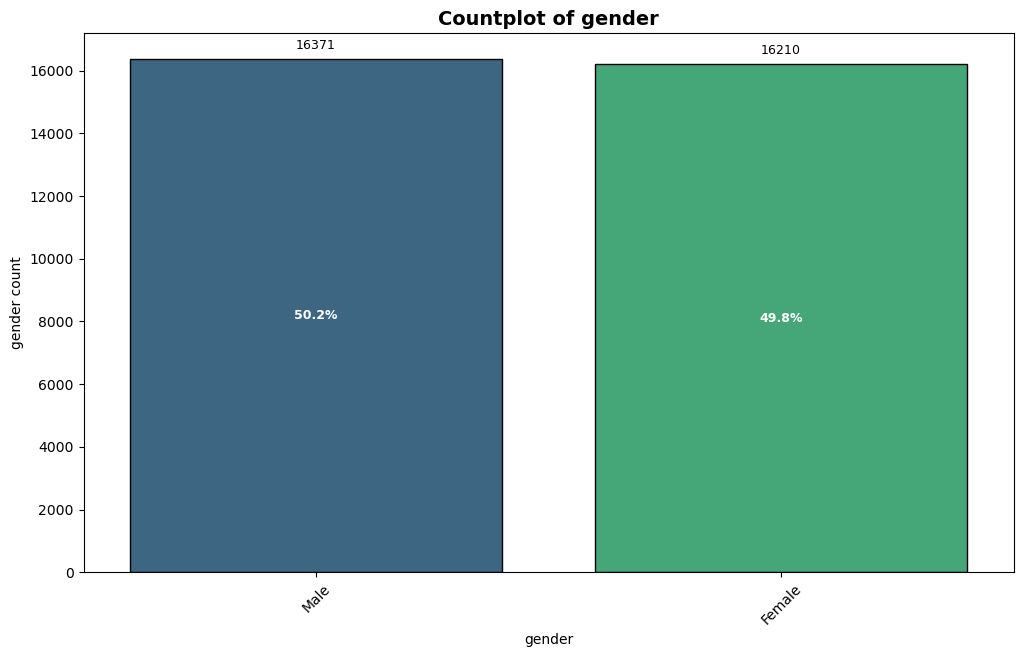

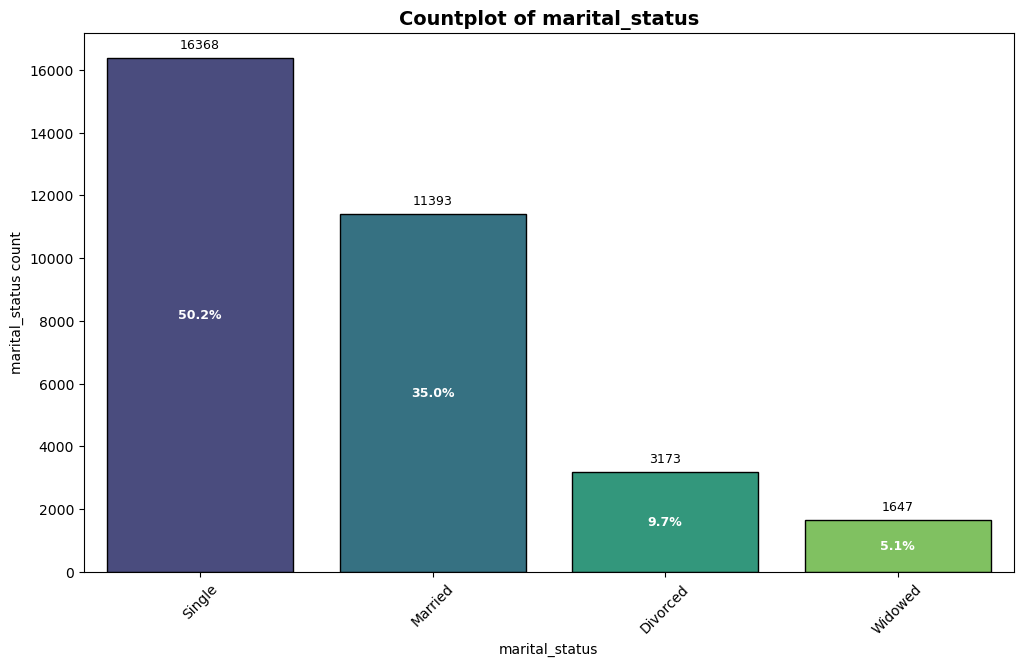

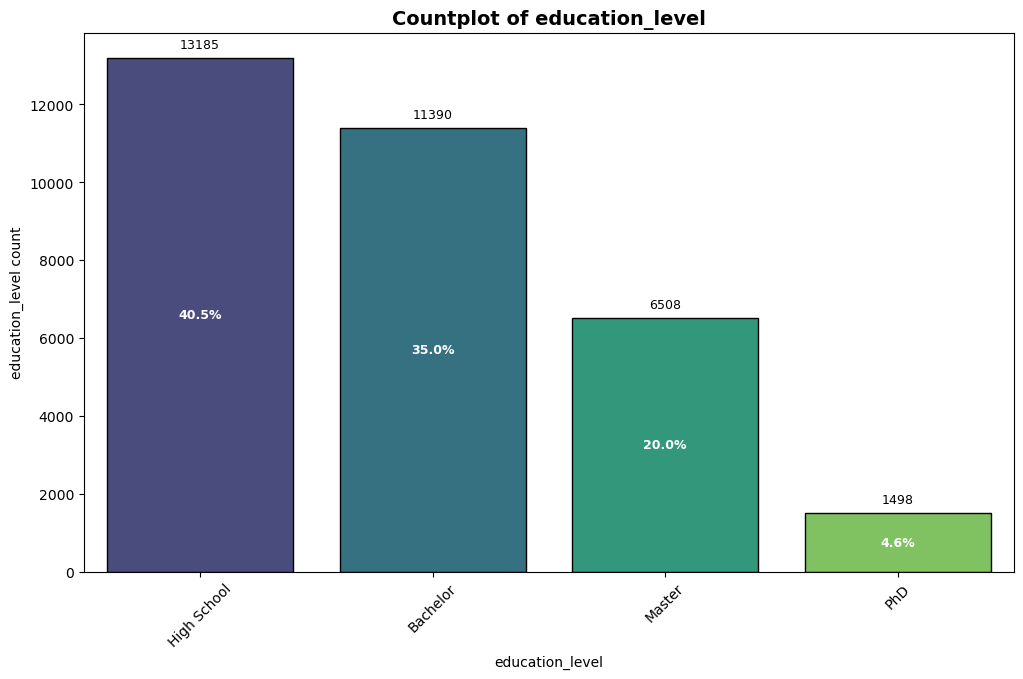

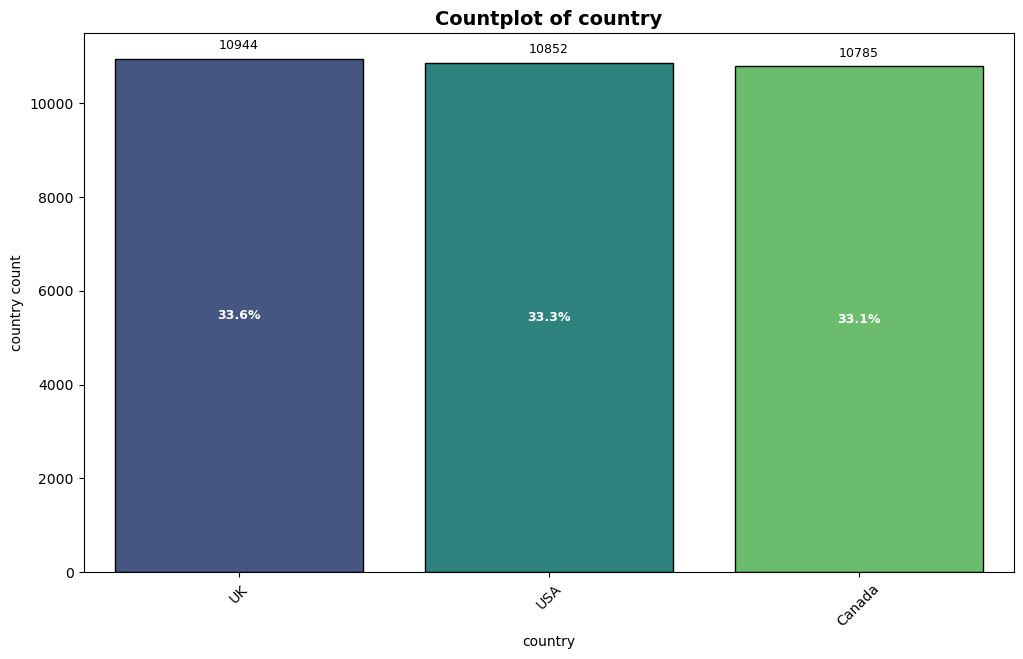

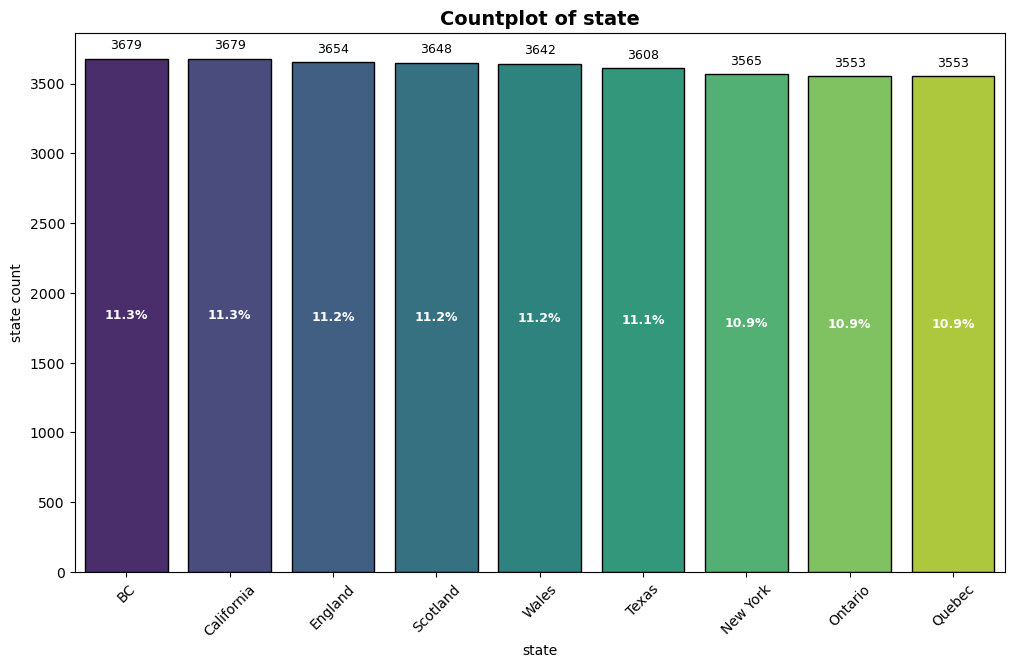

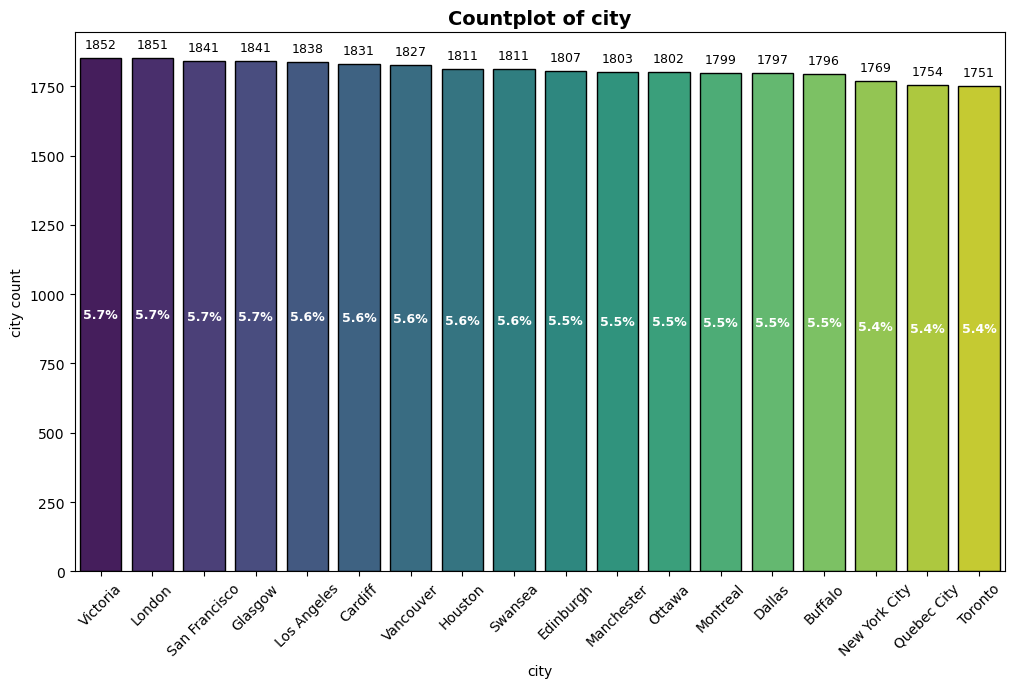

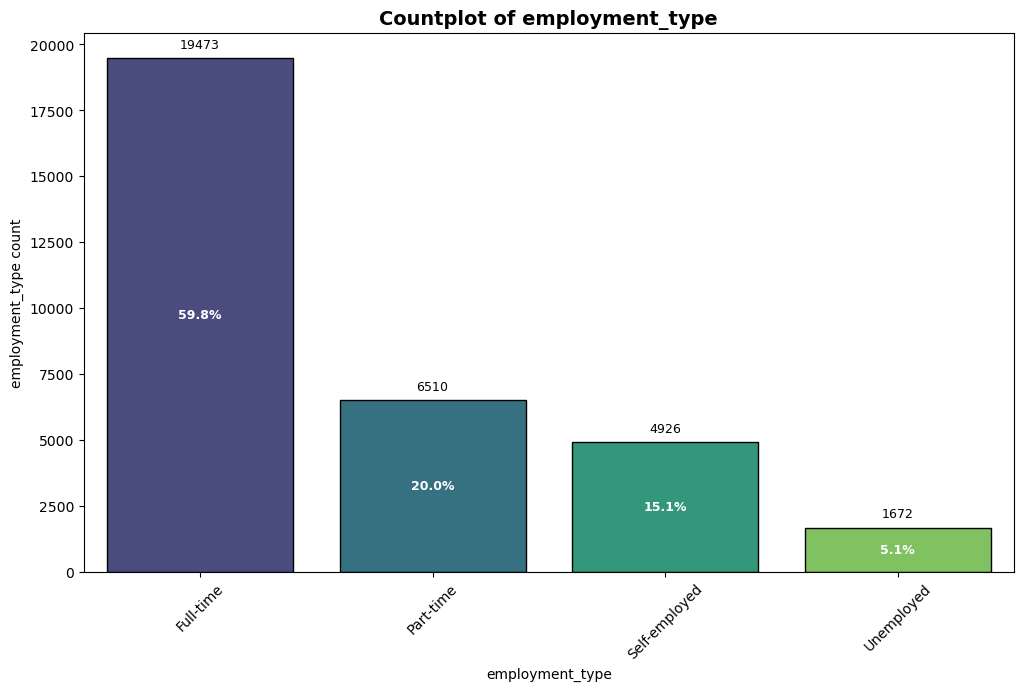

In [48]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,palette='viridis',edgecolor='black',order=df[col].value_counts().index)
    total = len(df[col].dropna())

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')

        #Percentage Label
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width()/2.,height/2),
                    ha='center',va='center',fontsize=9,color='white',weight='bold')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()



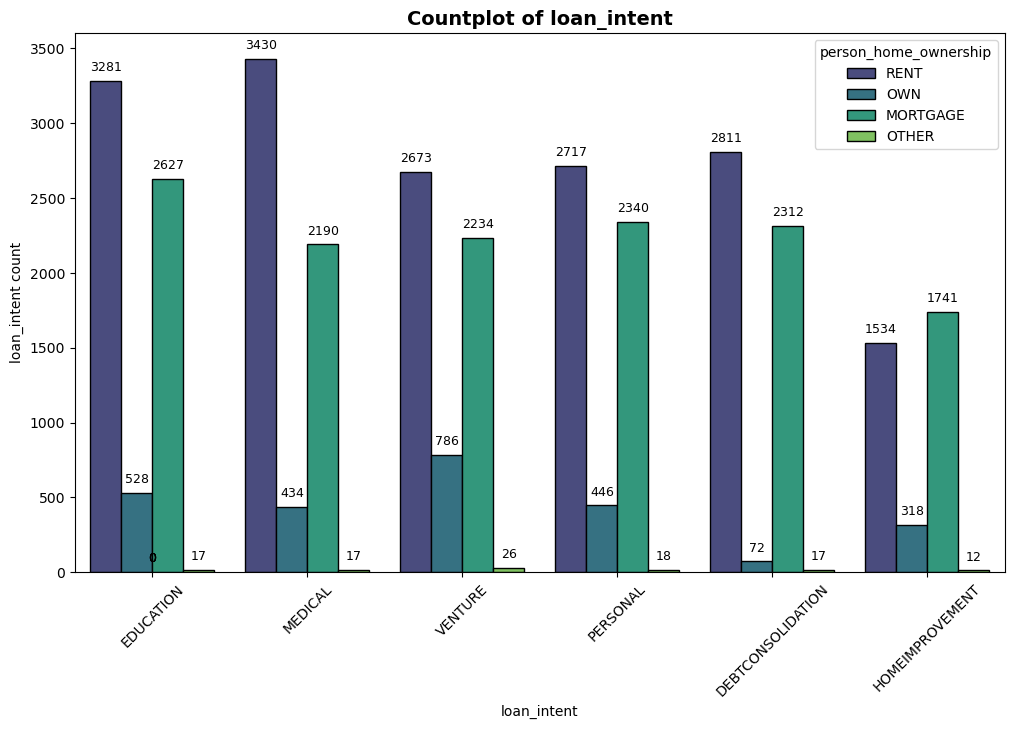

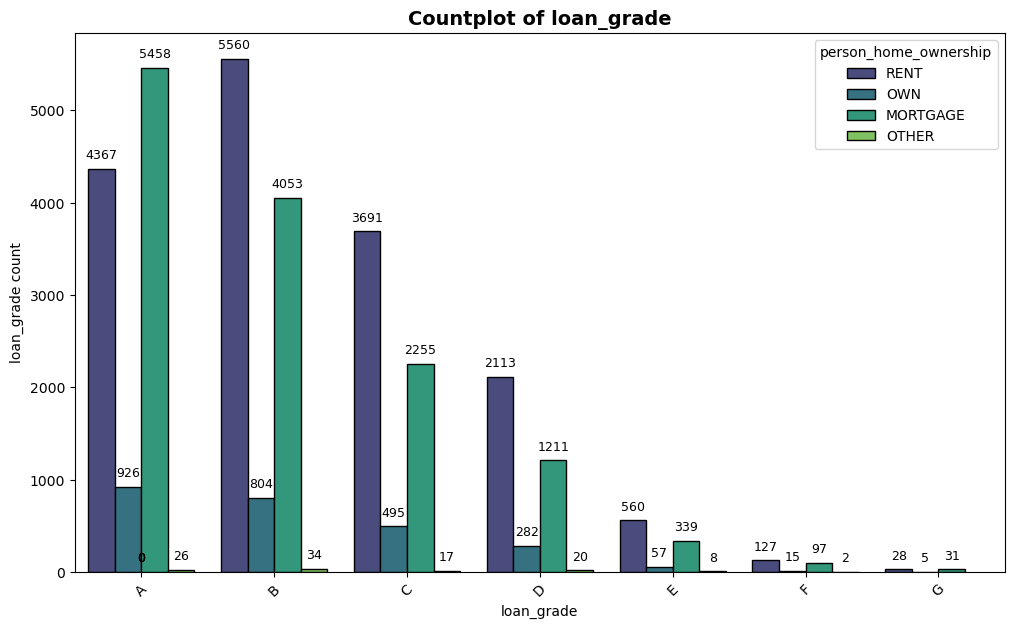

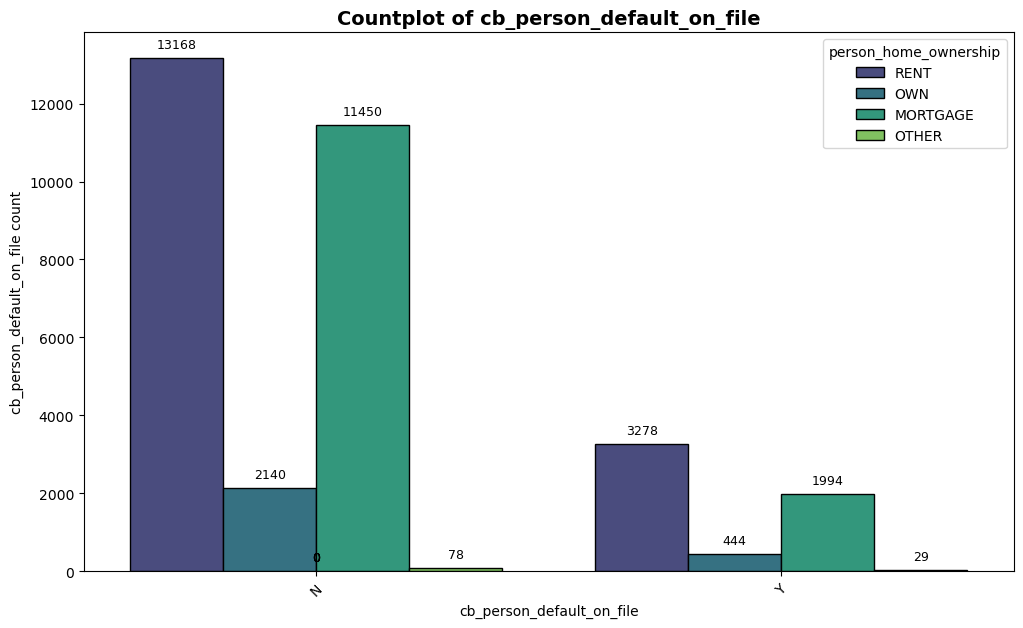

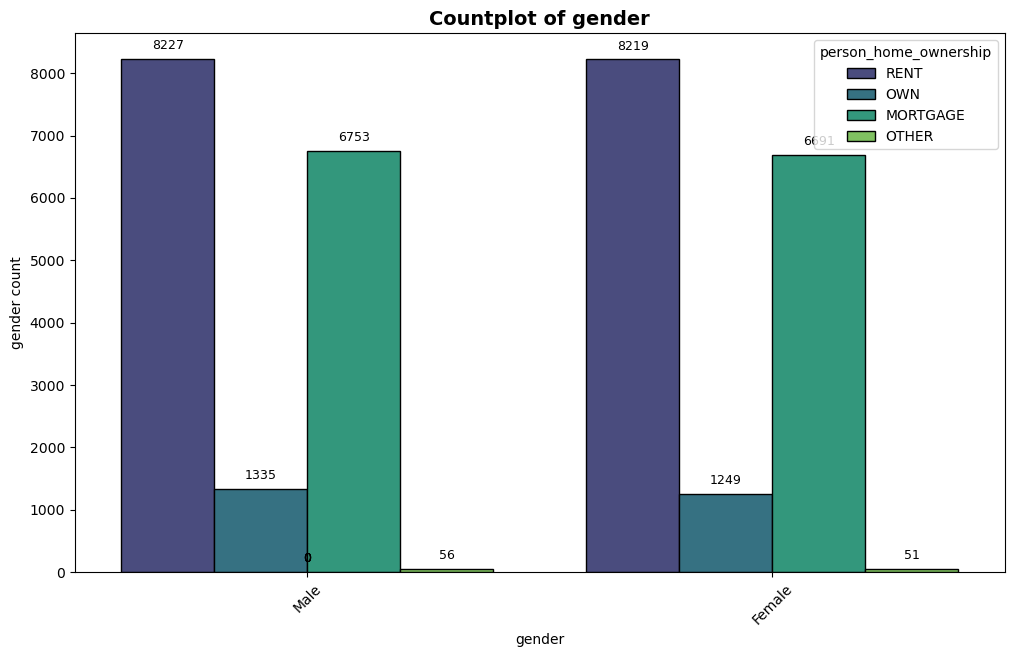

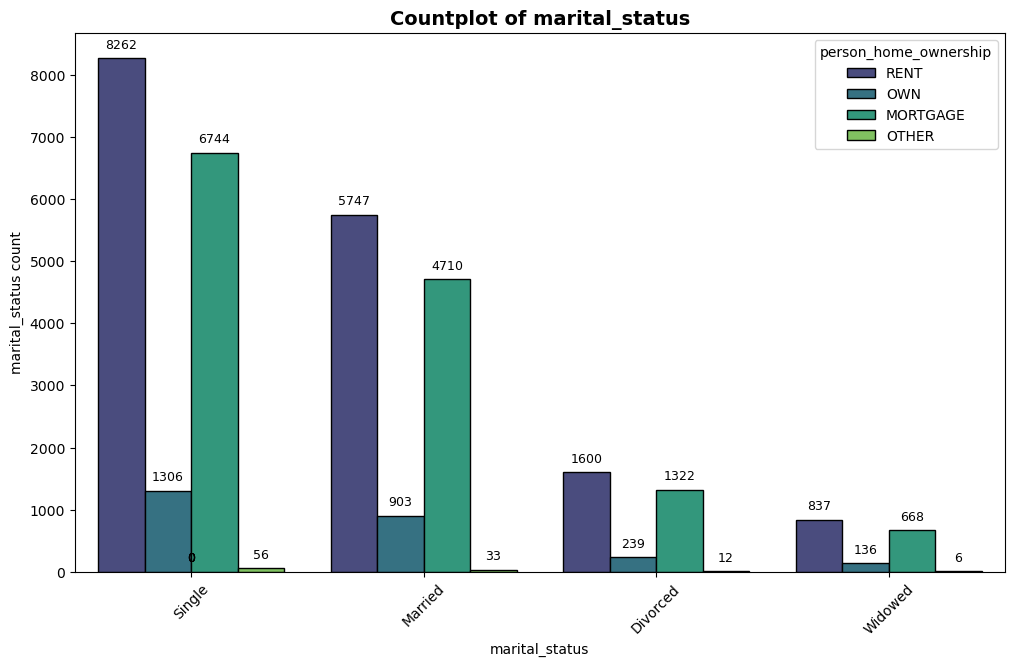

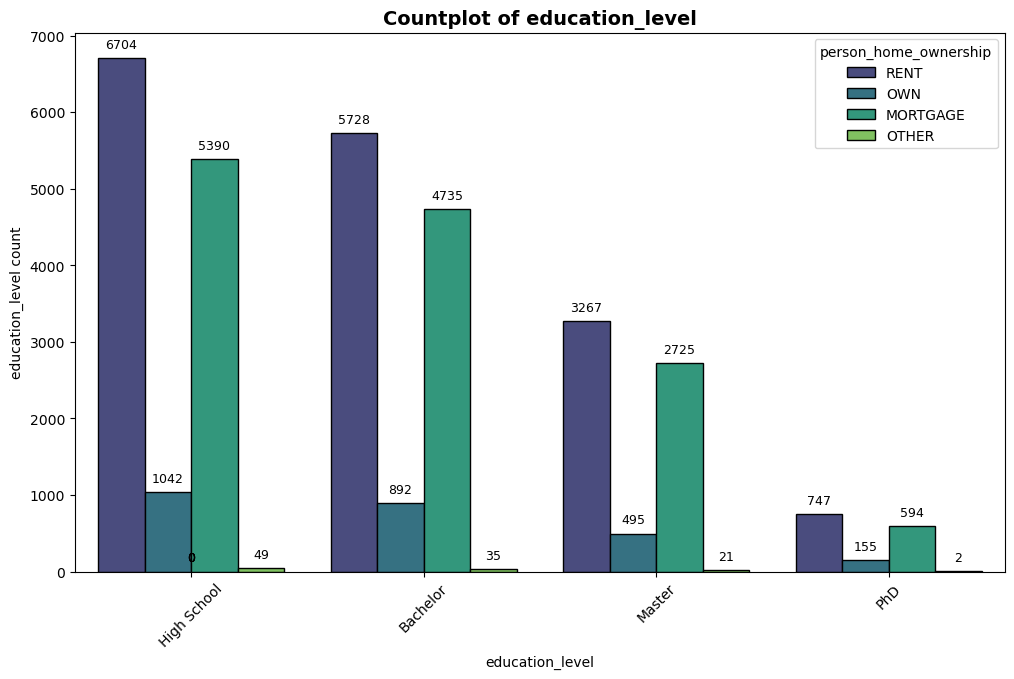

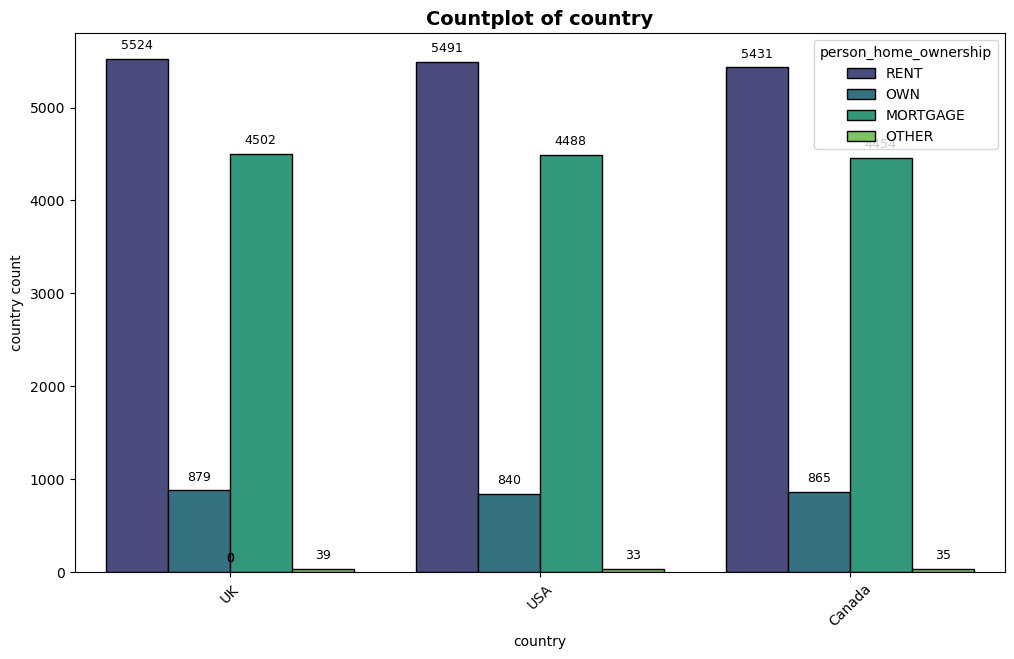

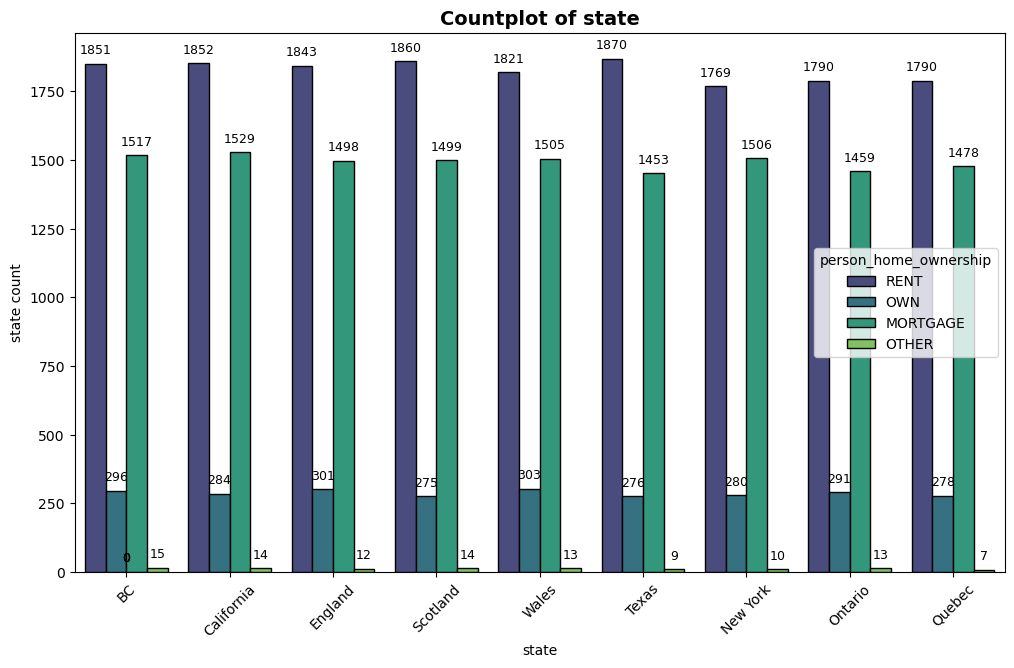

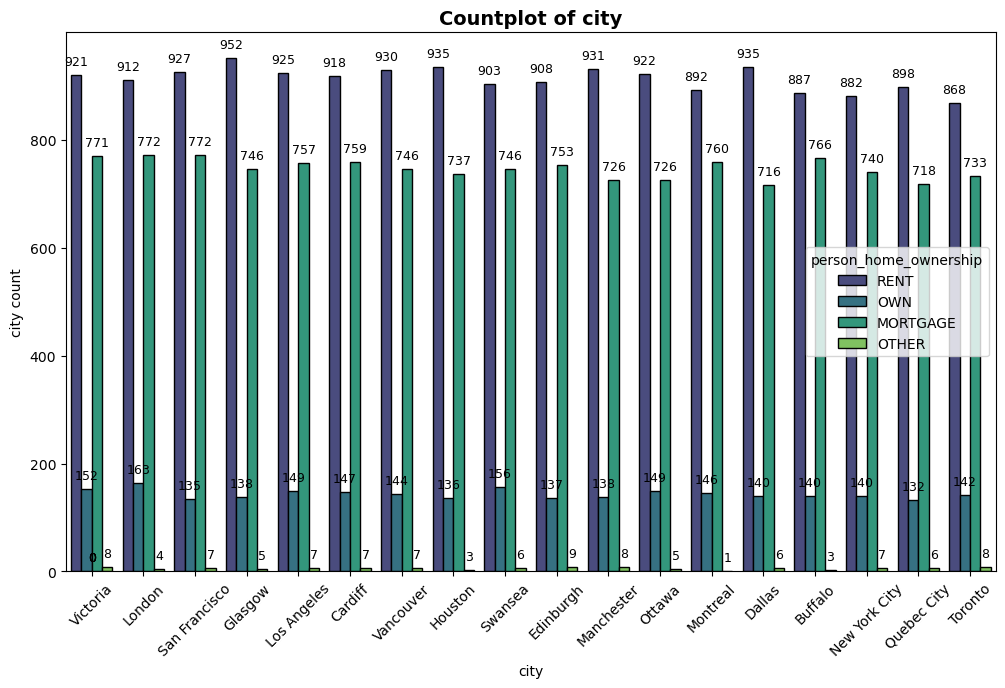

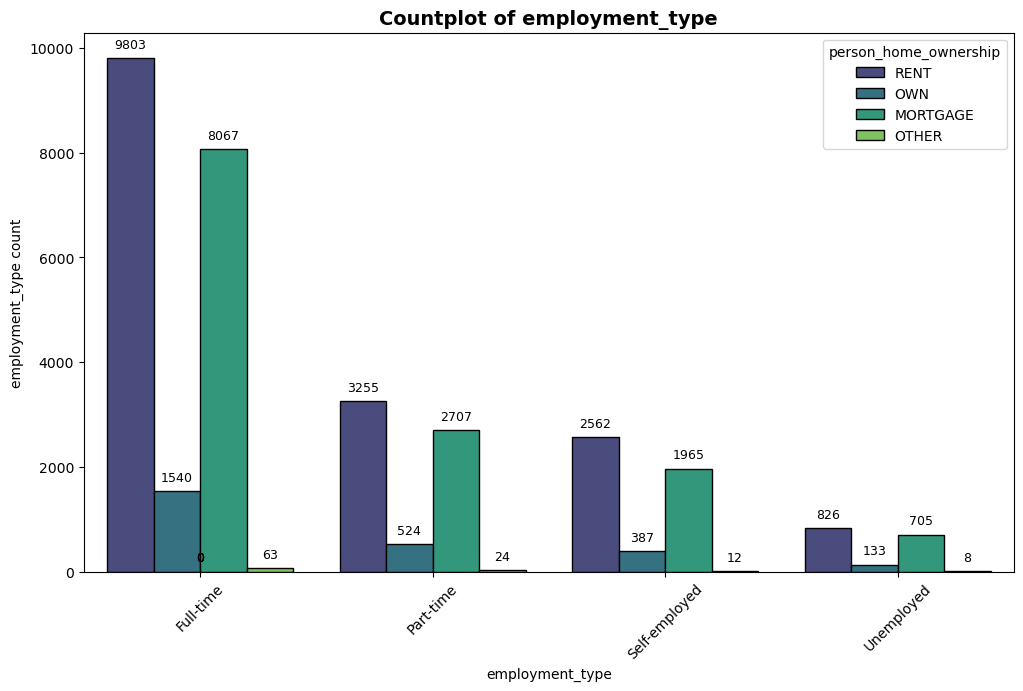

In [49]:
categorical_columns = ['loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue ='person_home_ownership', palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

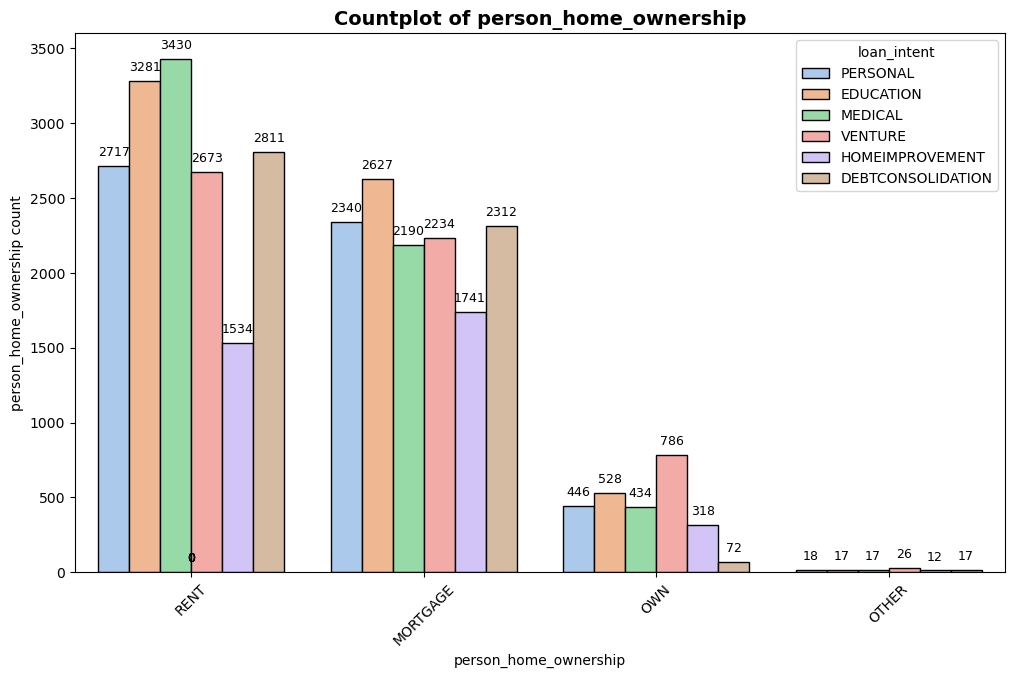

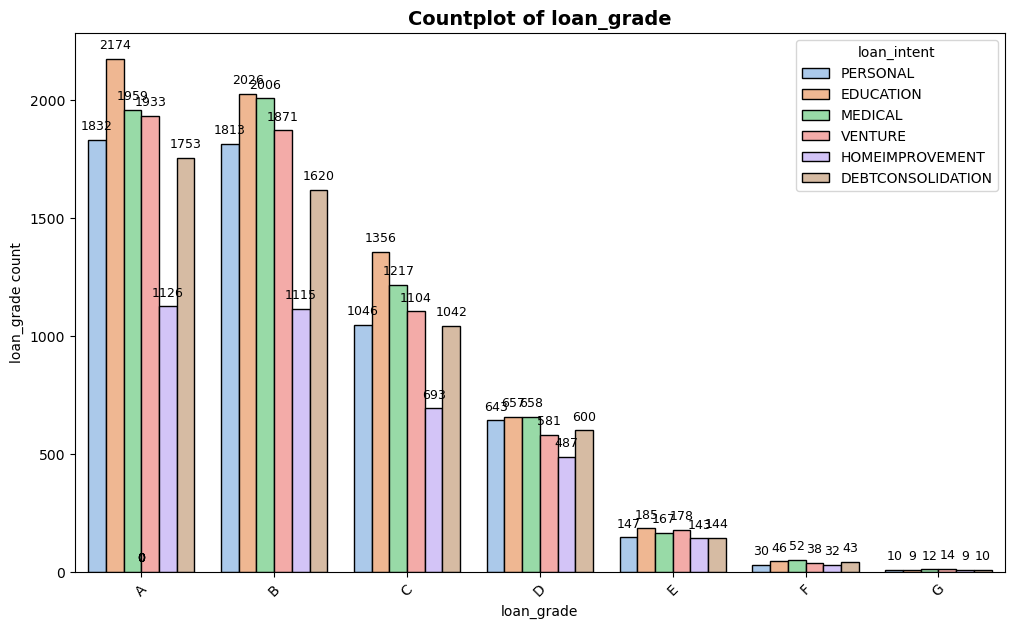

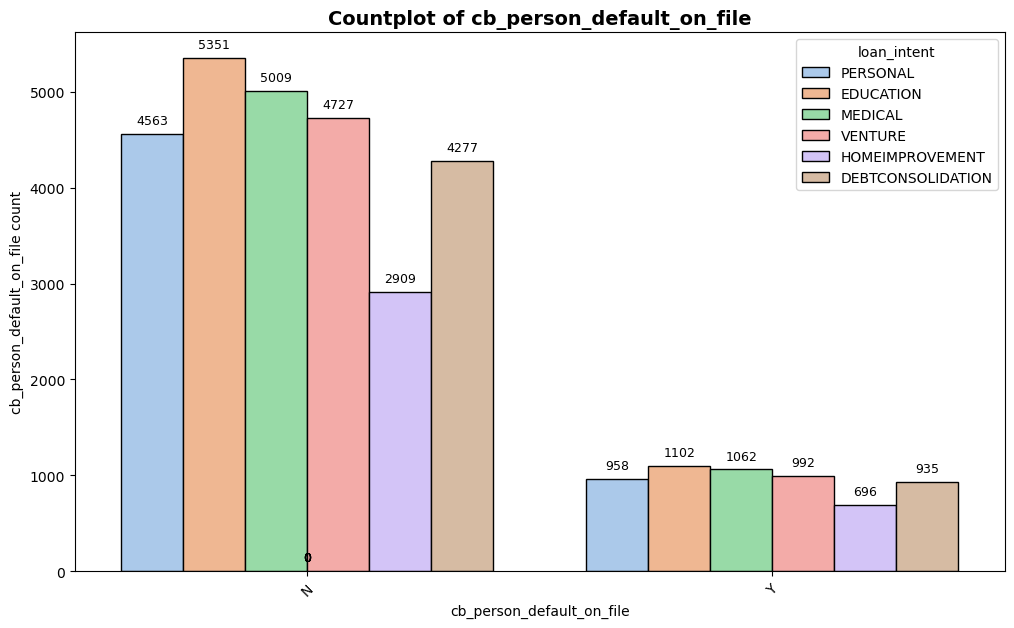

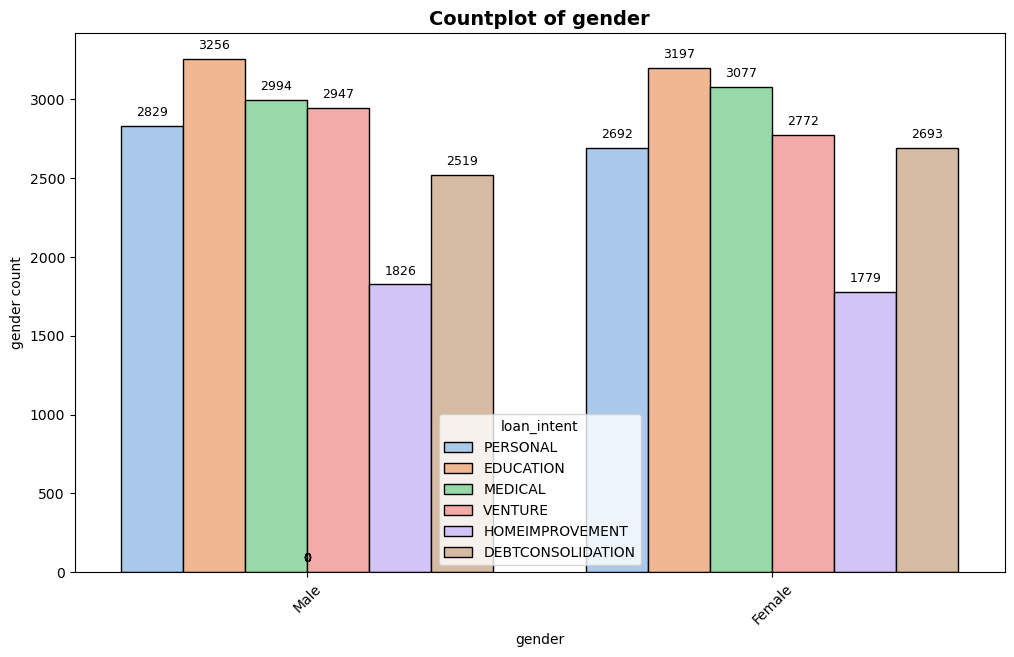

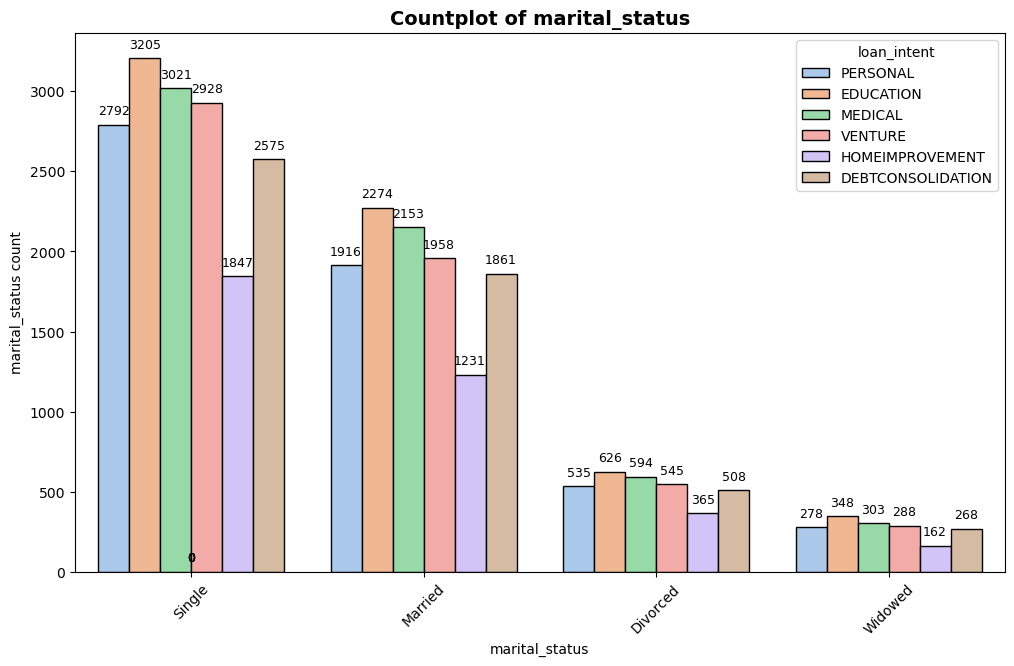

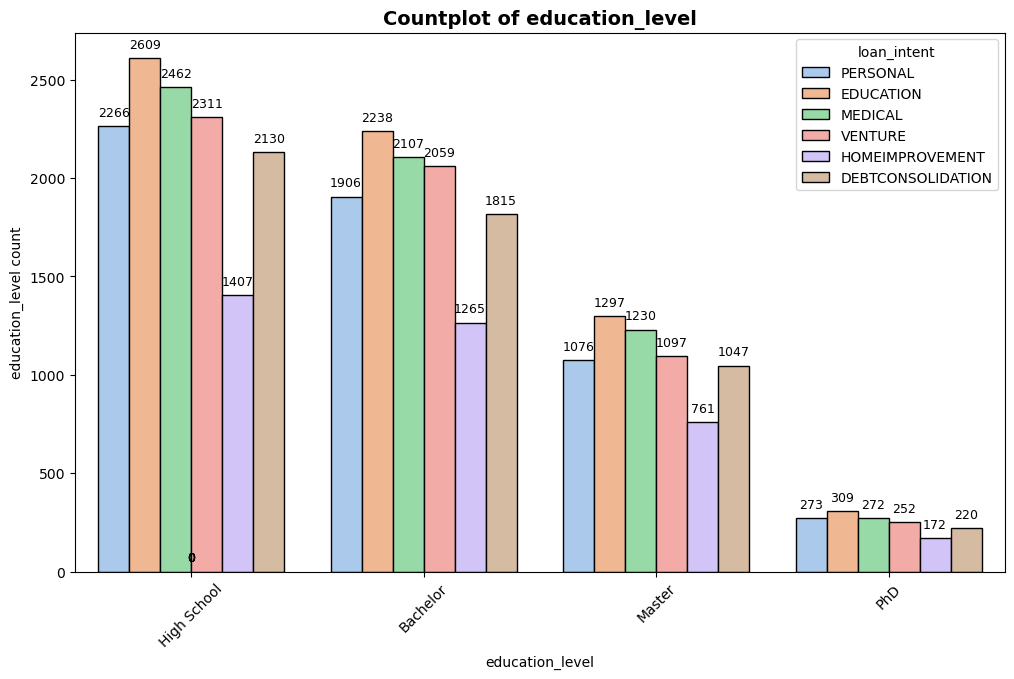

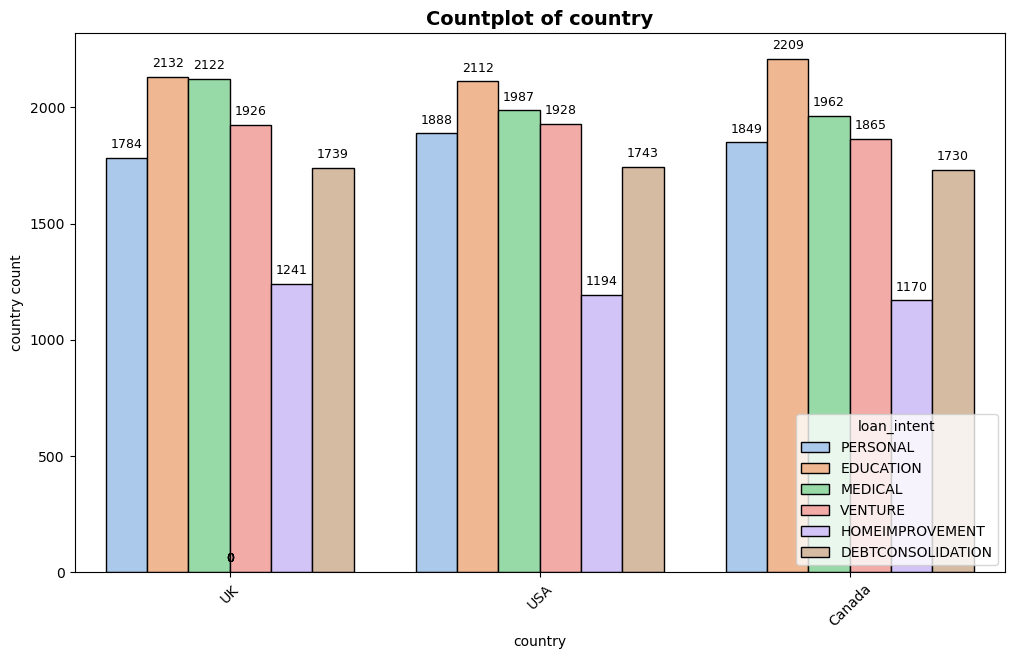

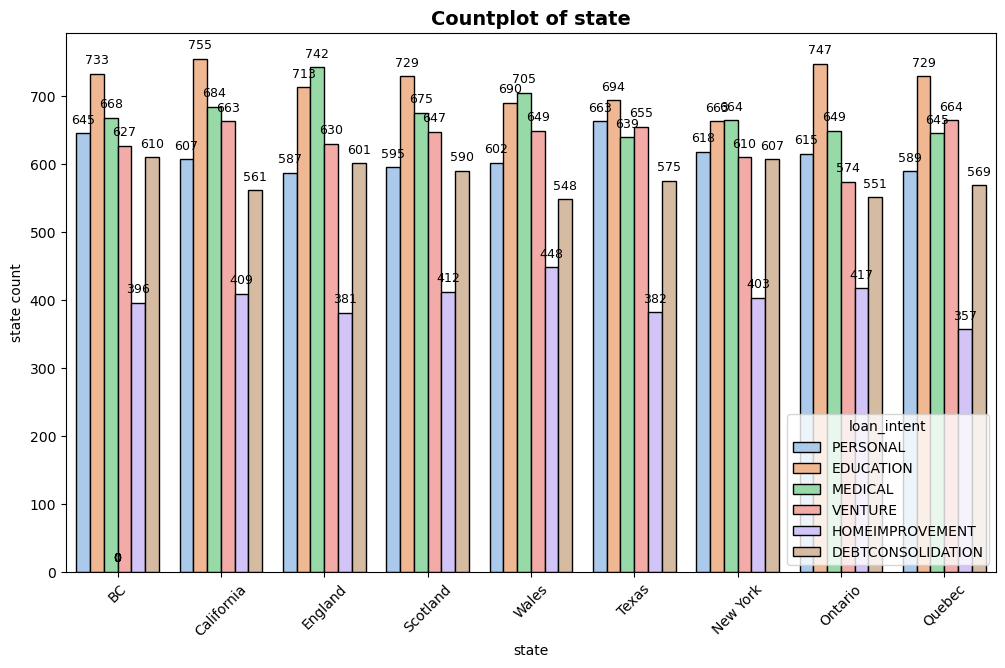

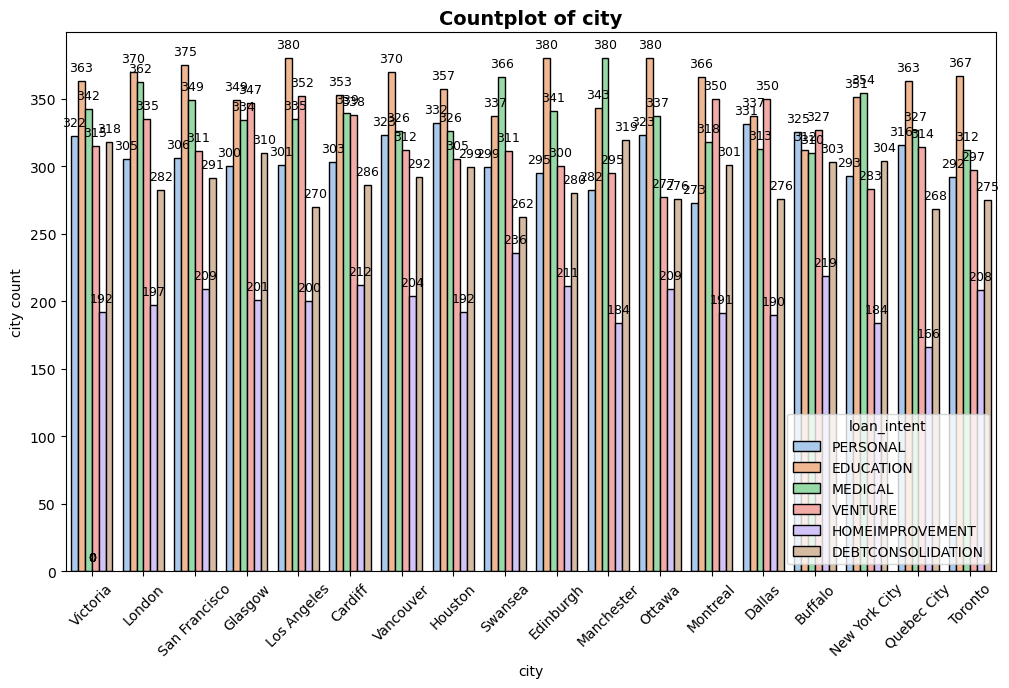

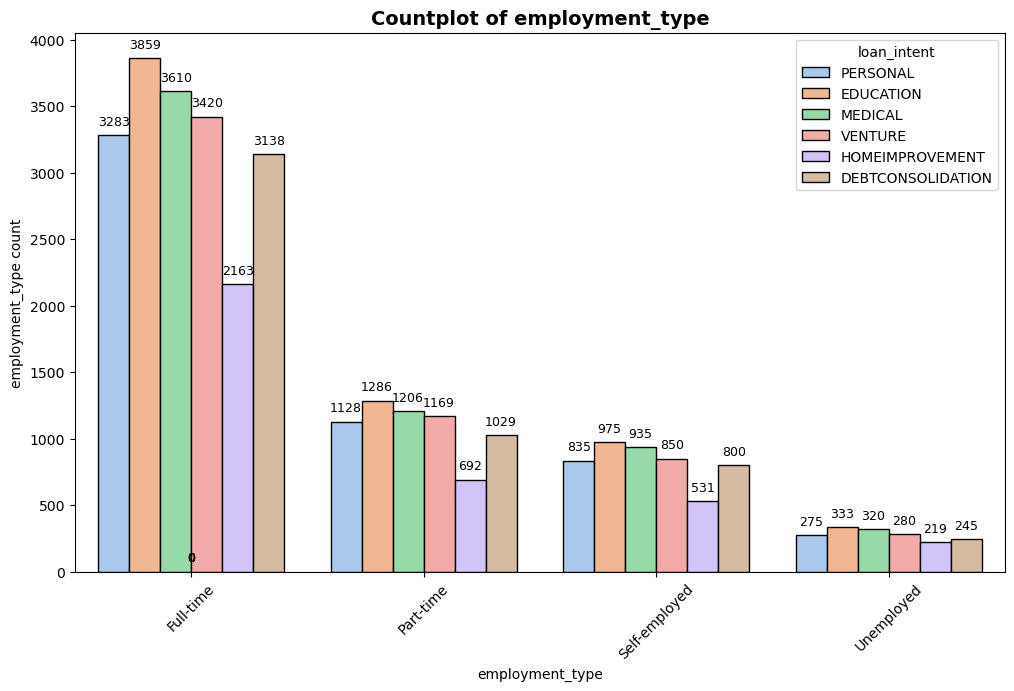

In [50]:
categorical_columns = ['person_home_ownership','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'loan_intent',palette='pastel',edgecolor='black',order=df[col].value_counts().index)
    total = len(df[col].dropna())

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

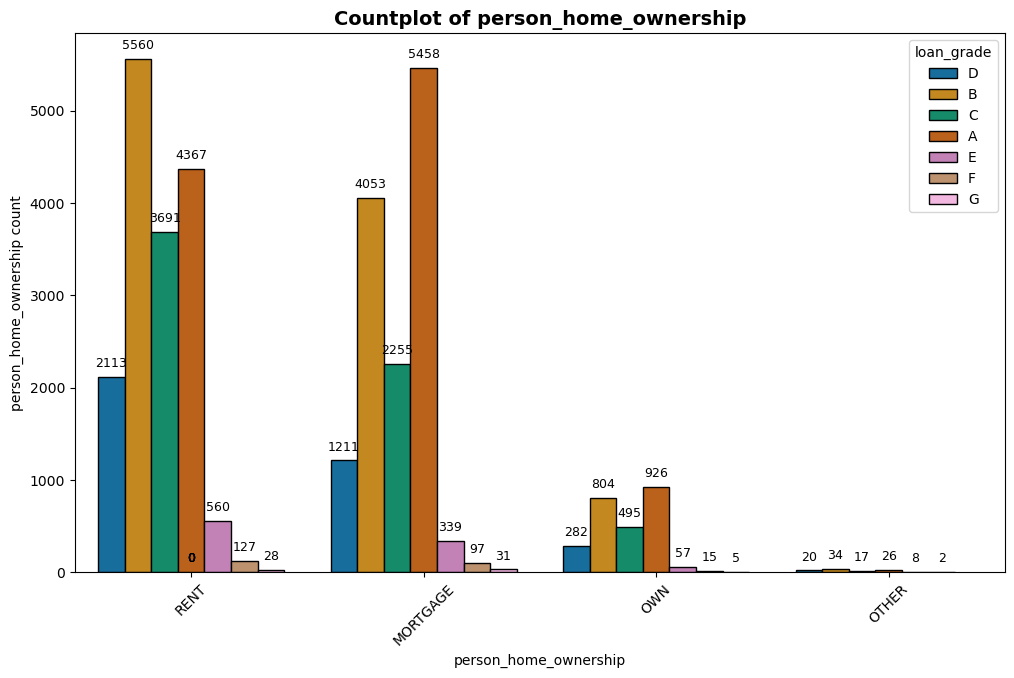

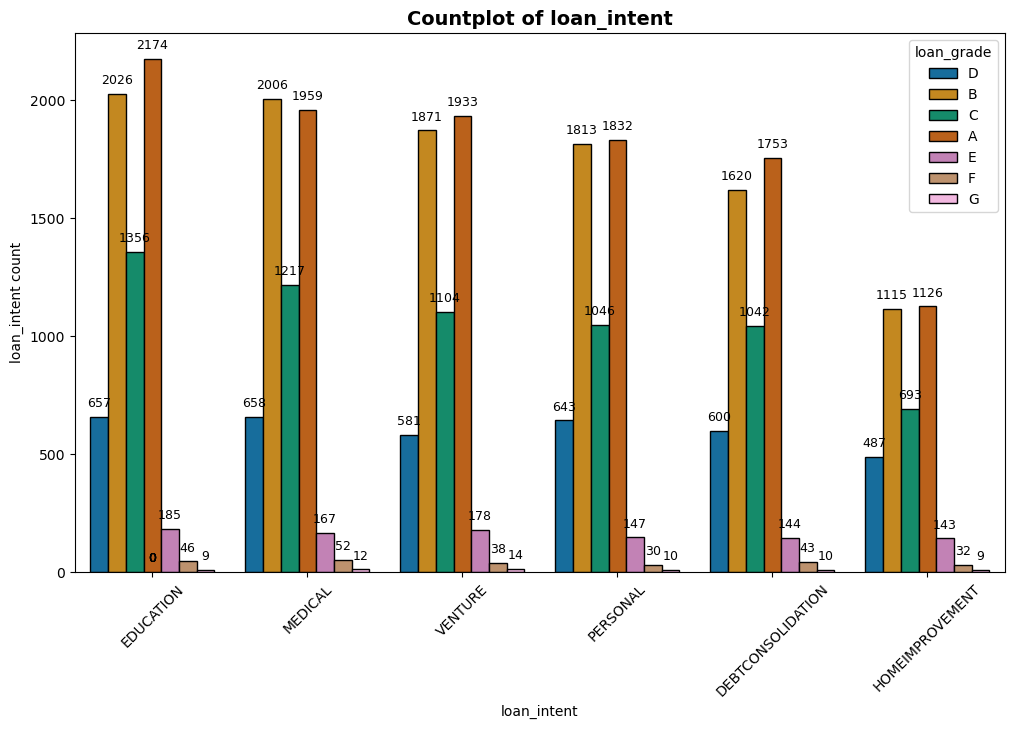

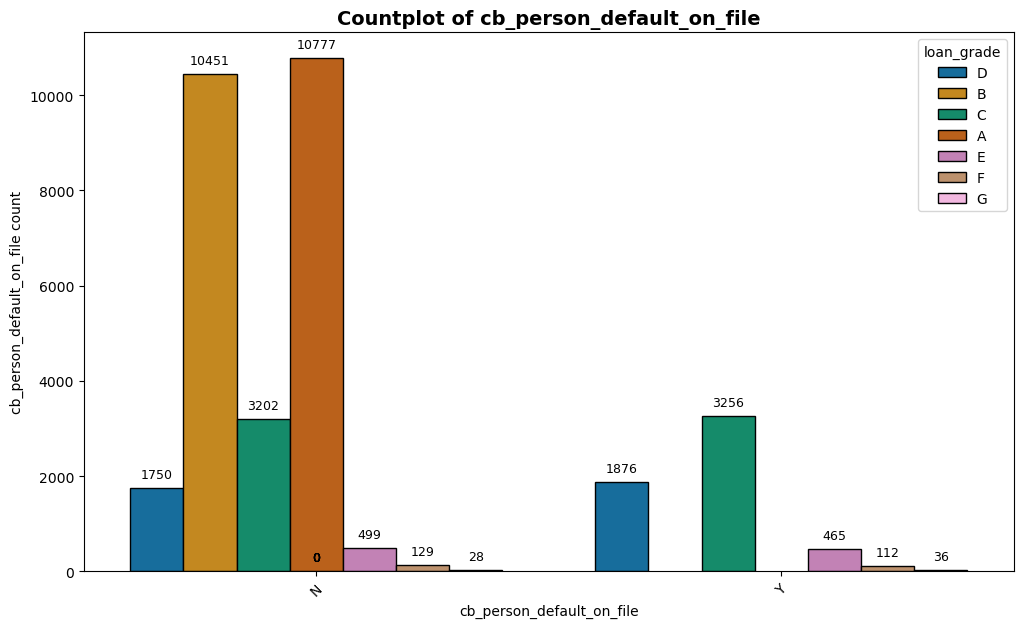

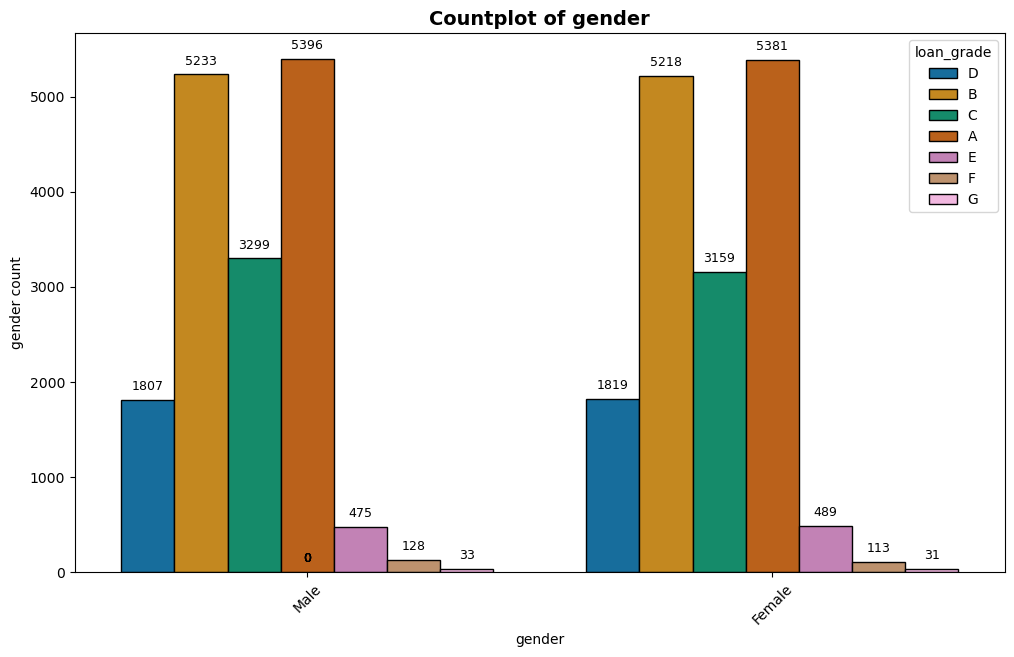

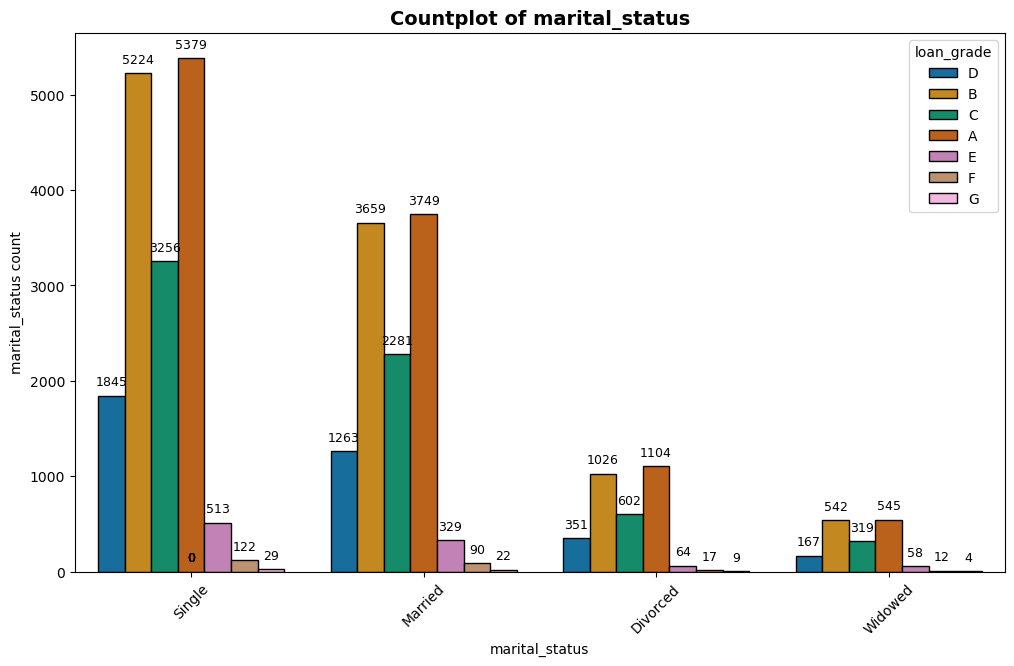

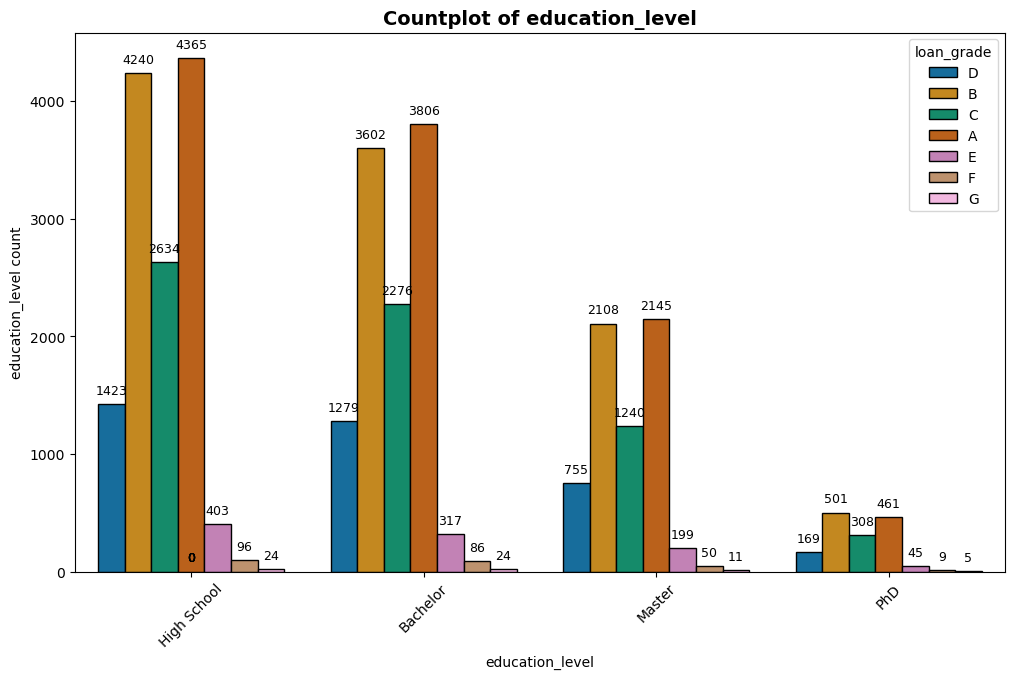

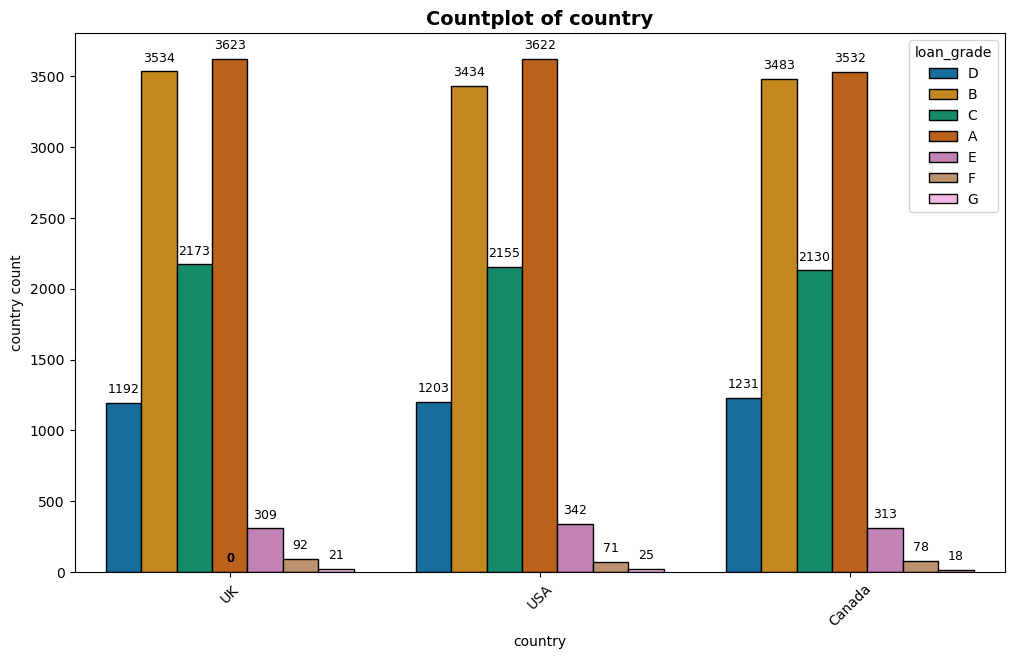

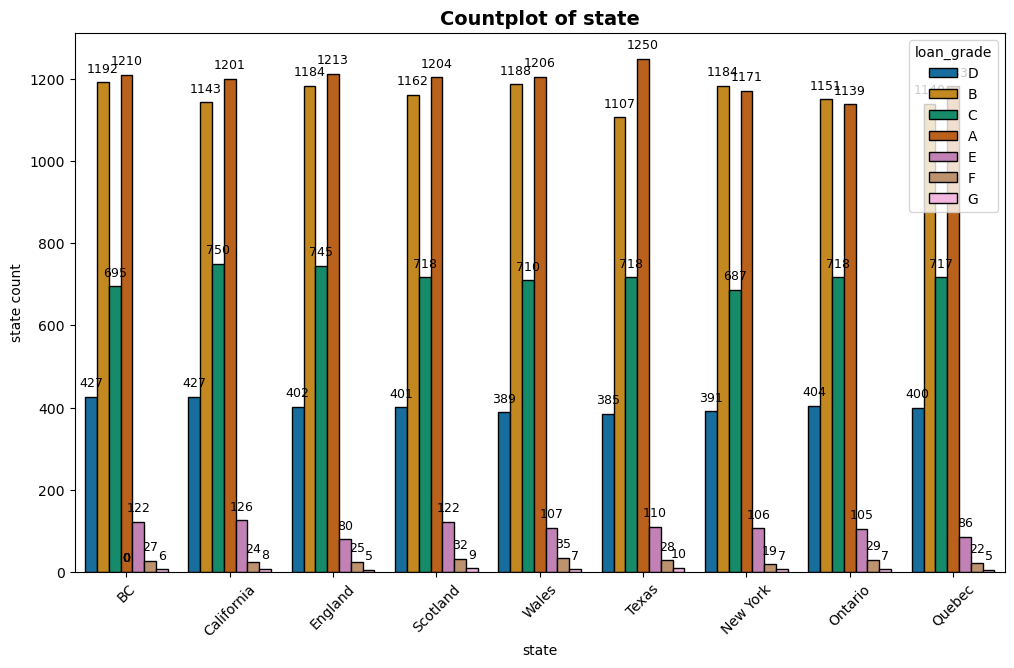

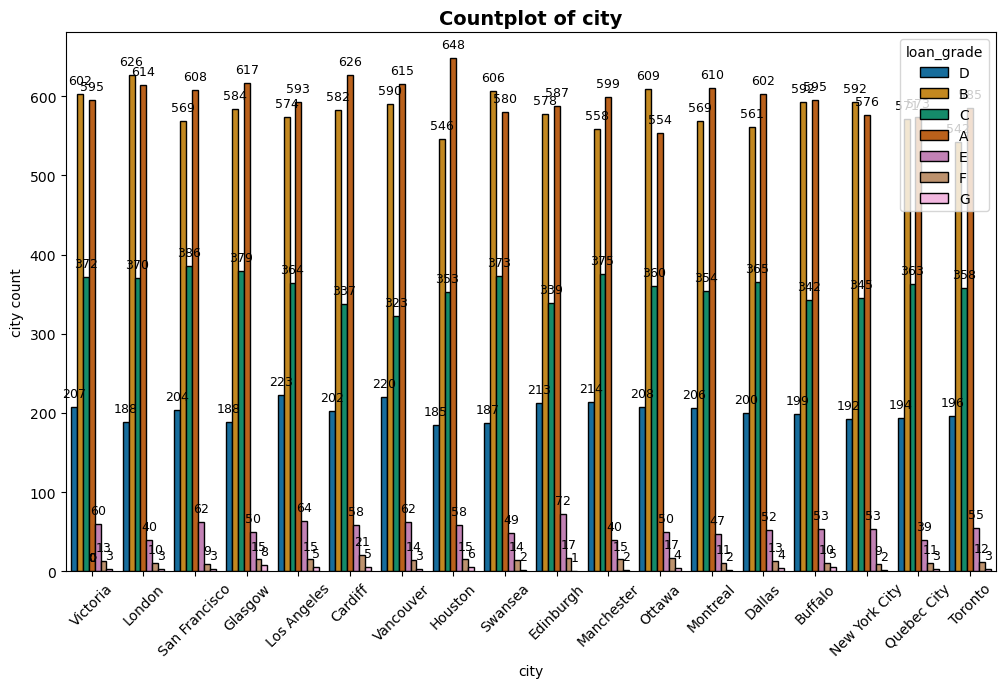

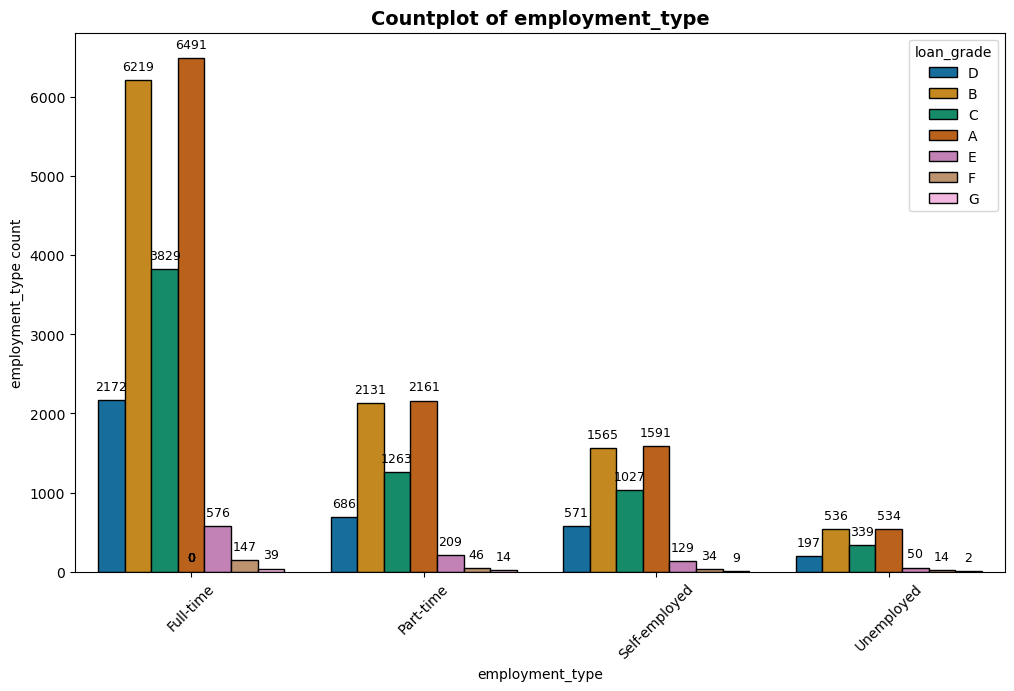

In [51]:
categorical_columns = ['person_home_ownership','loan_intent','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'loan_grade',palette='colorblind',edgecolor='black',order=df[col].value_counts().index)
    total = len(df[col].dropna())

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

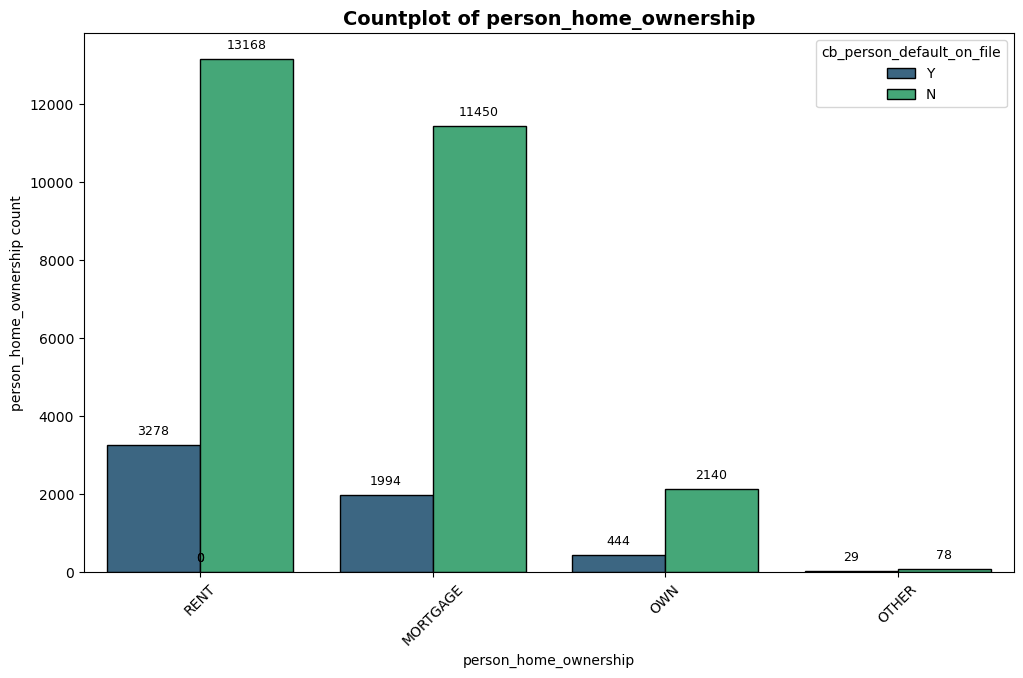

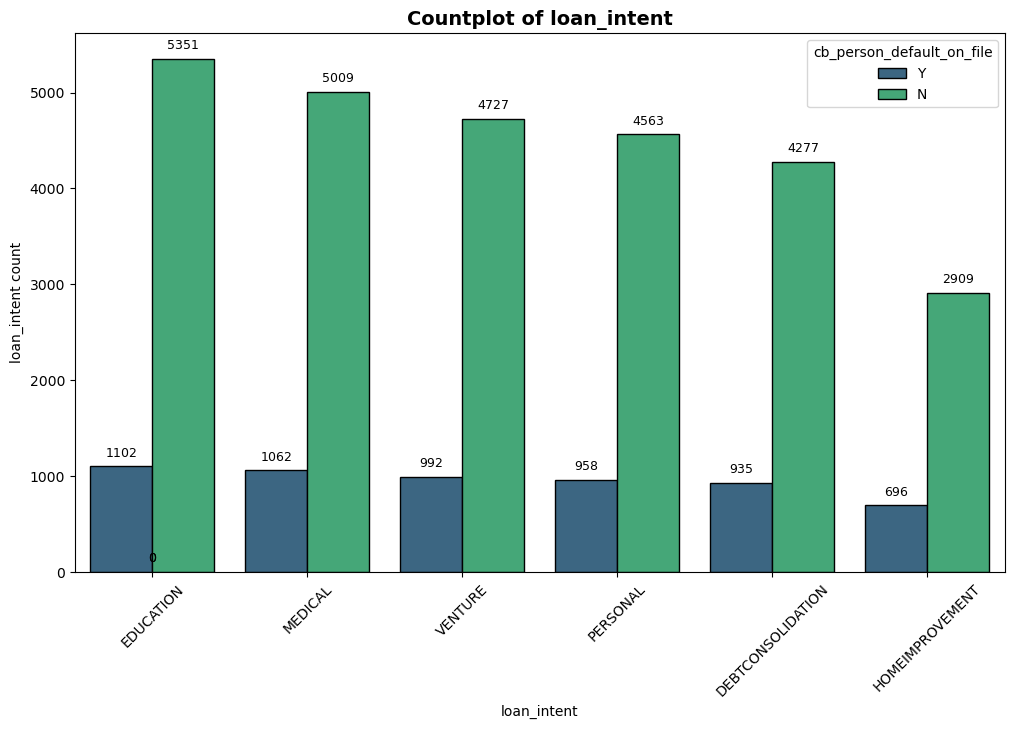

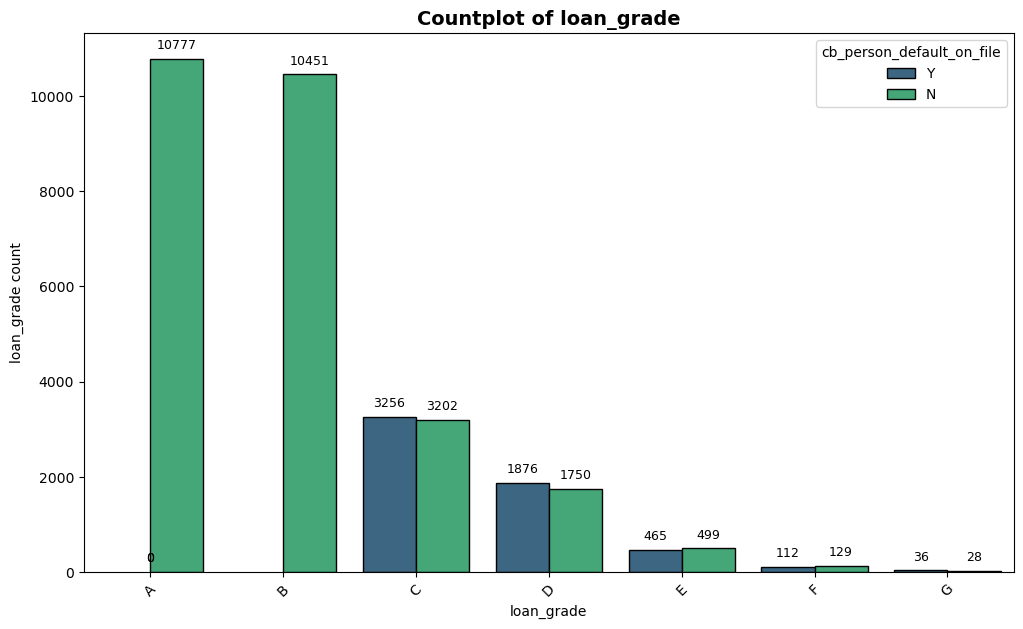

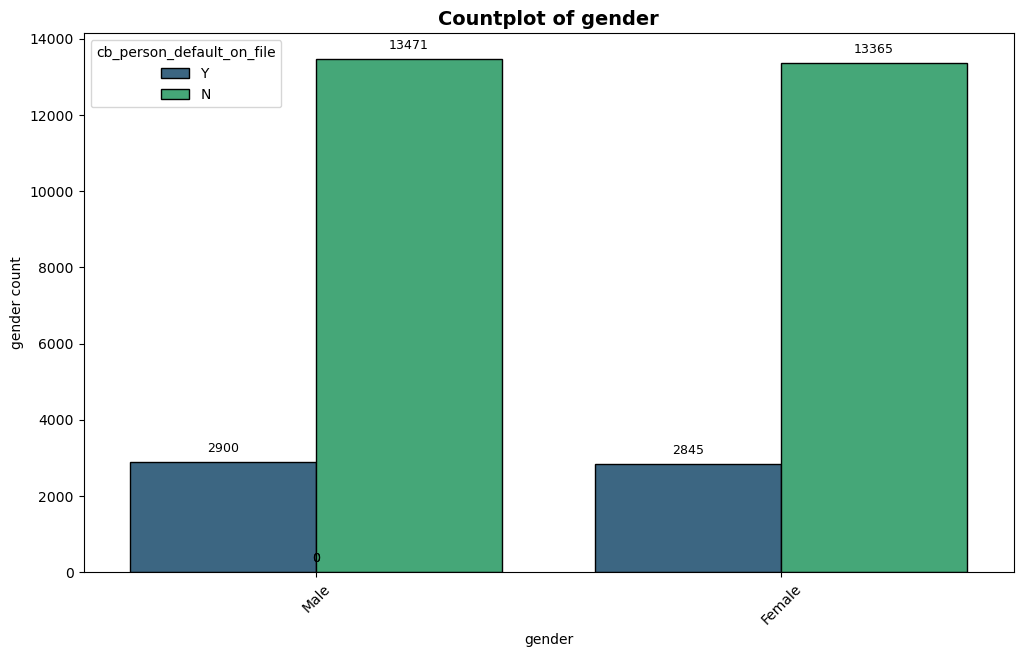

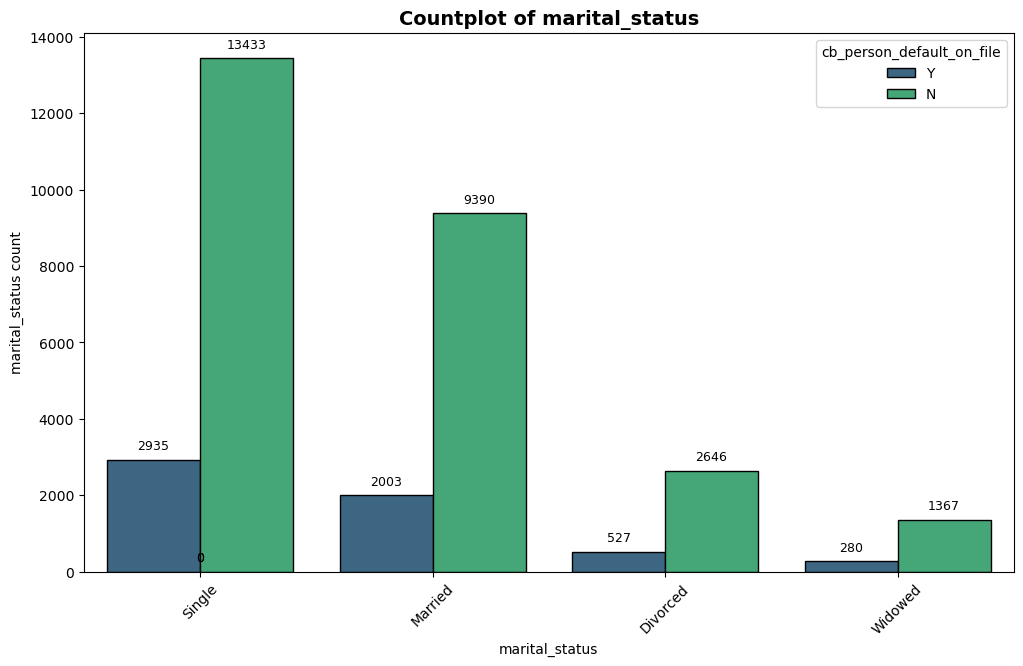

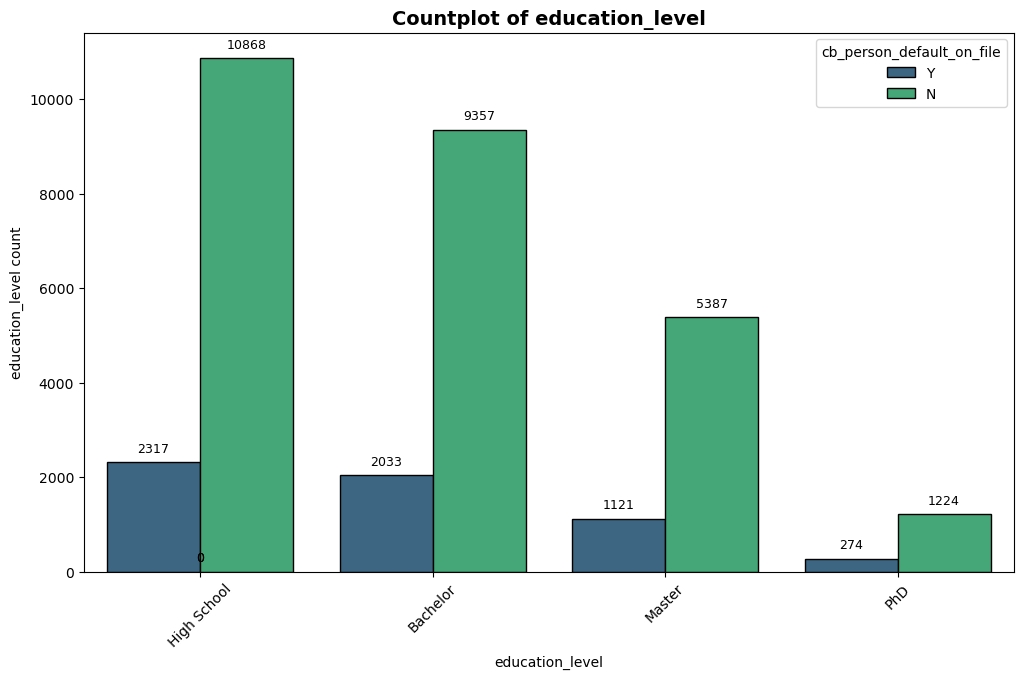

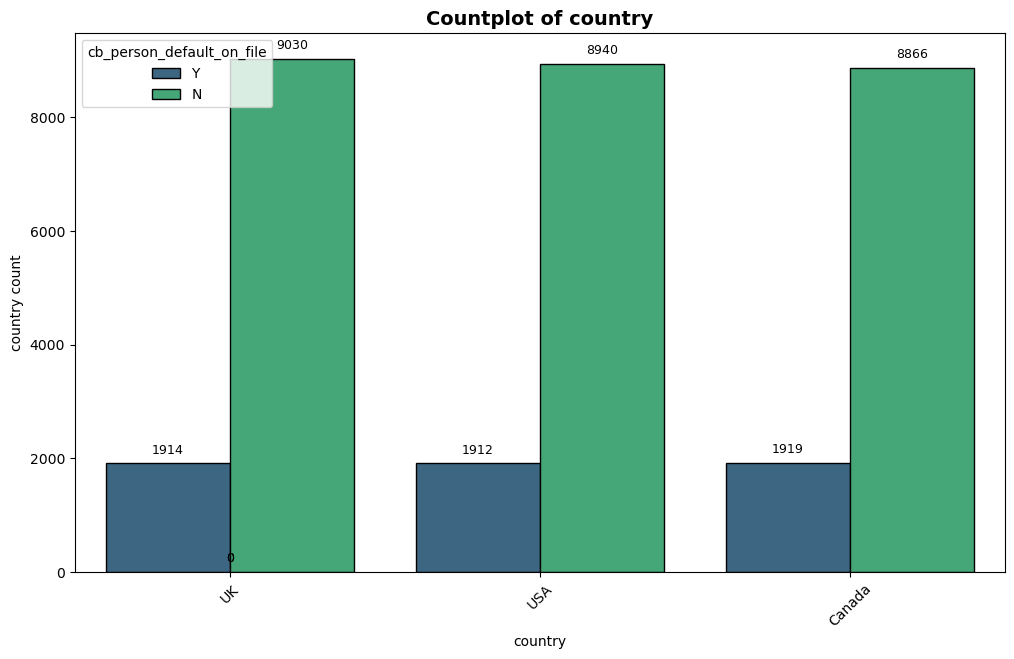

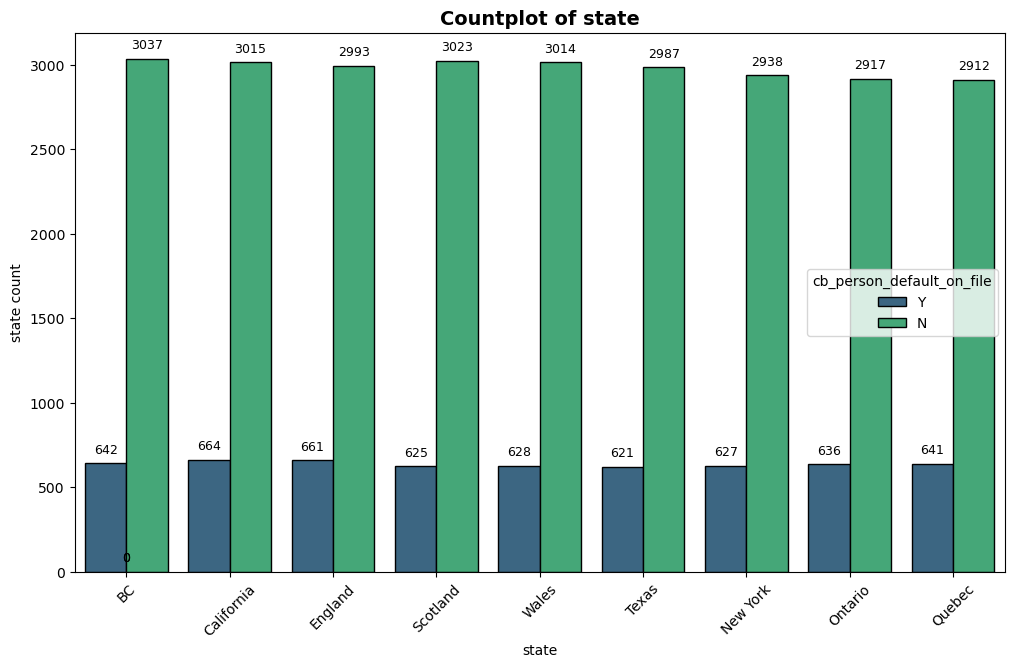

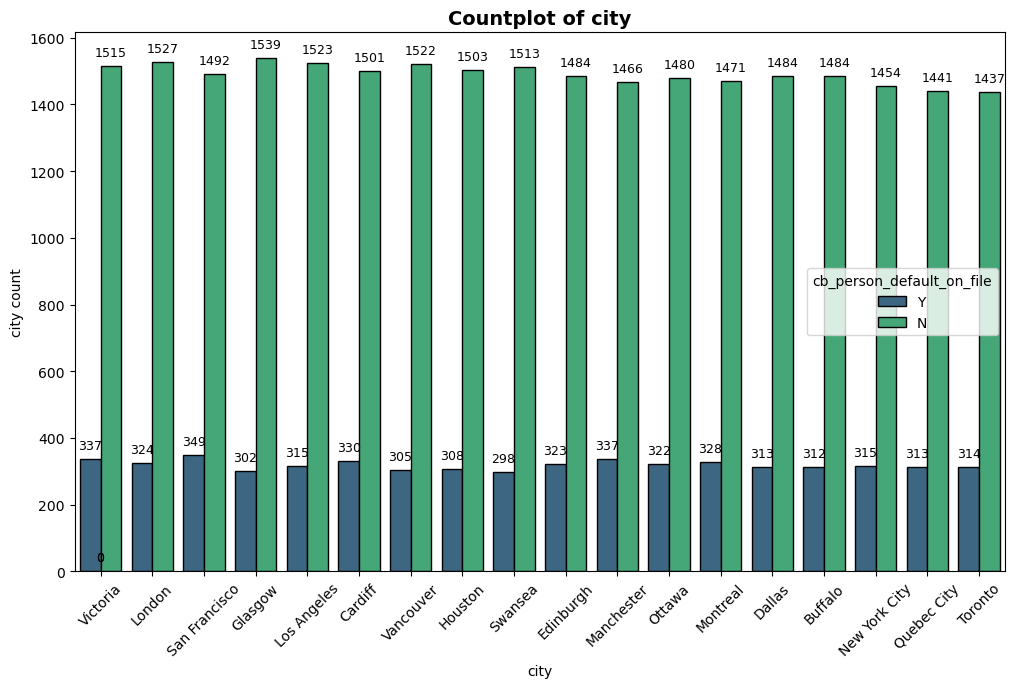

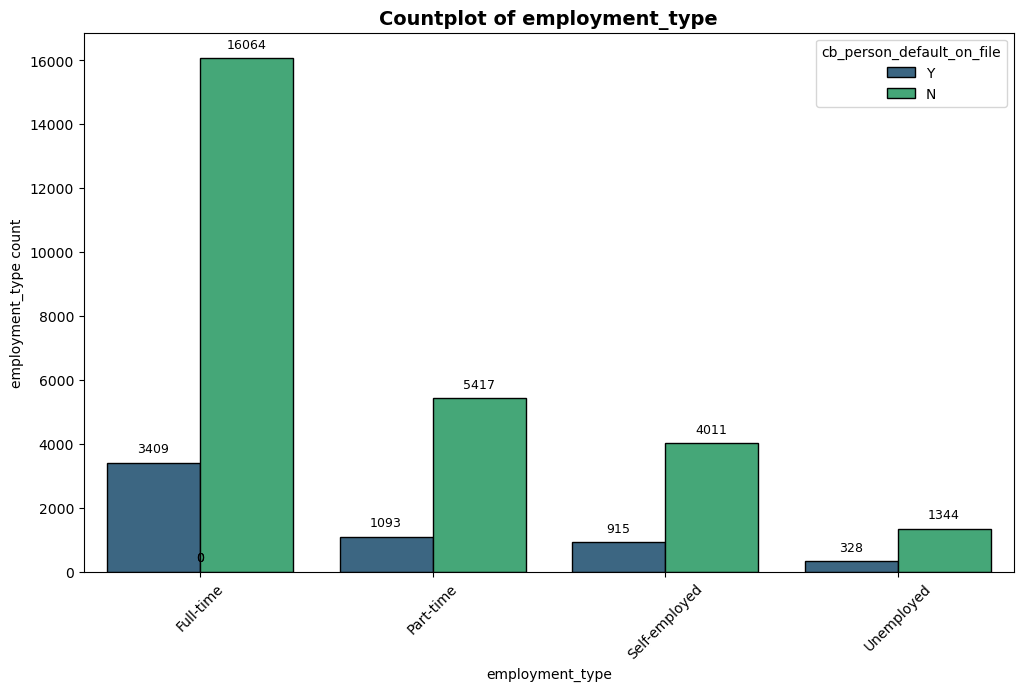

In [52]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','gender','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue ='cb_person_default_on_file', palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

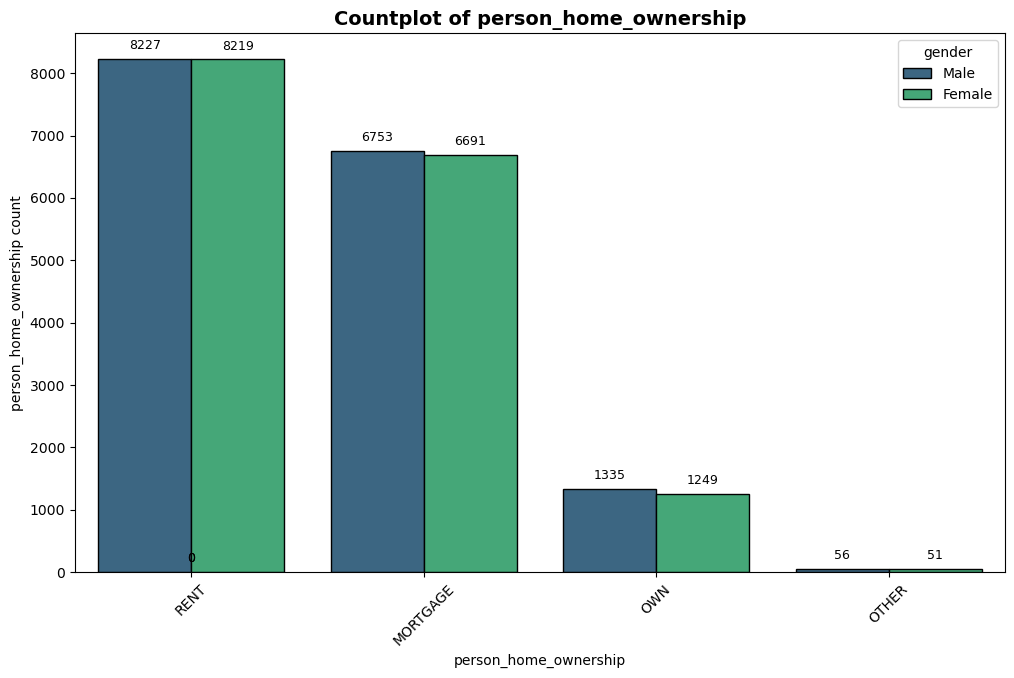

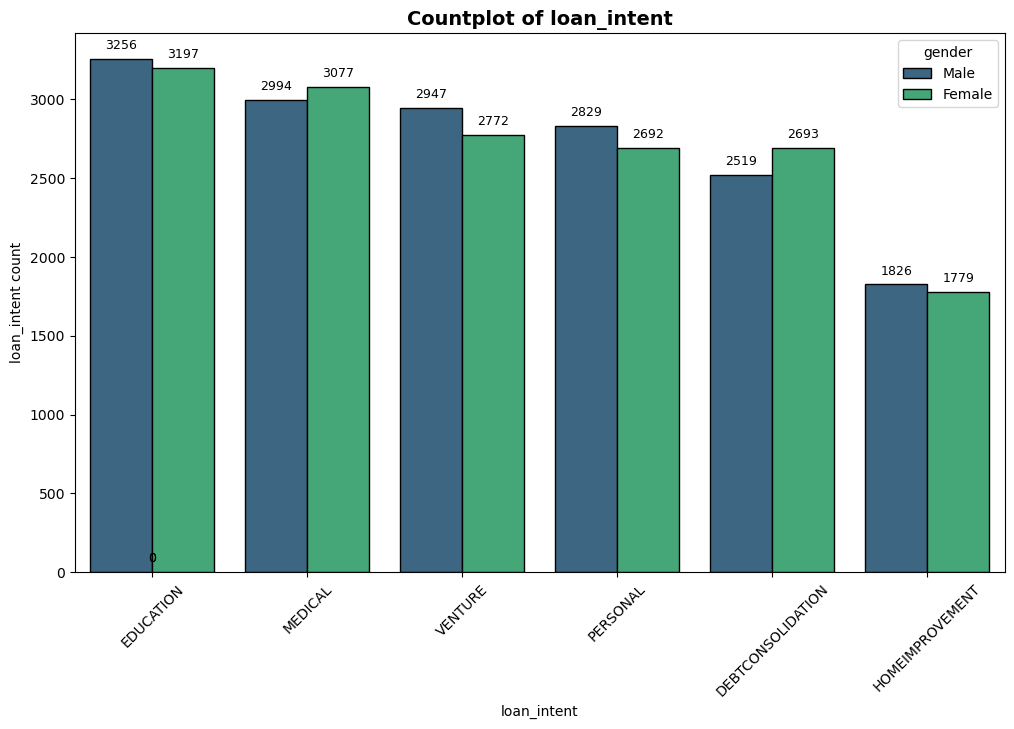

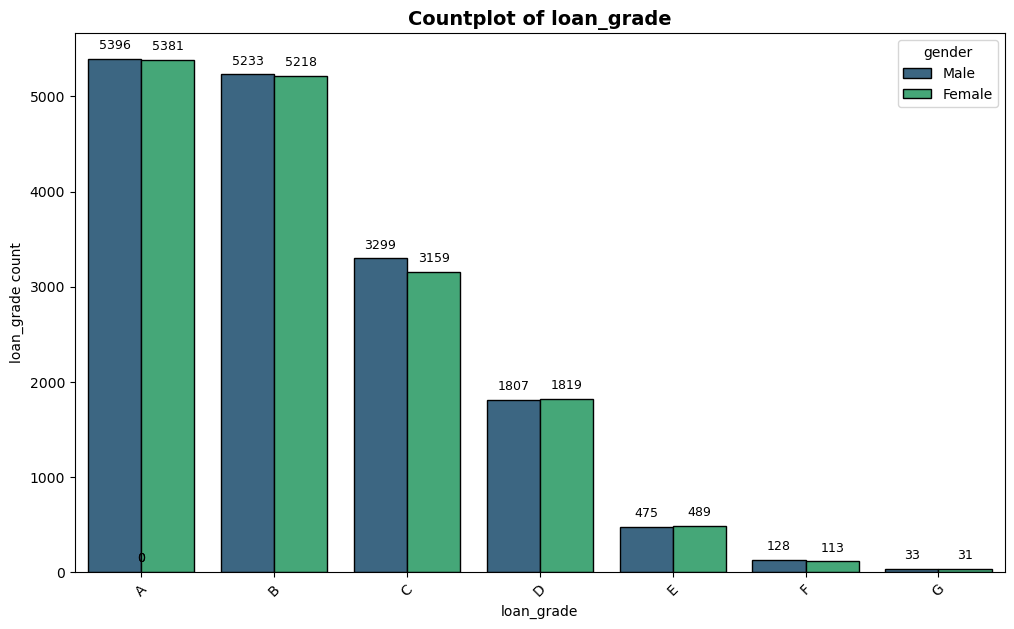

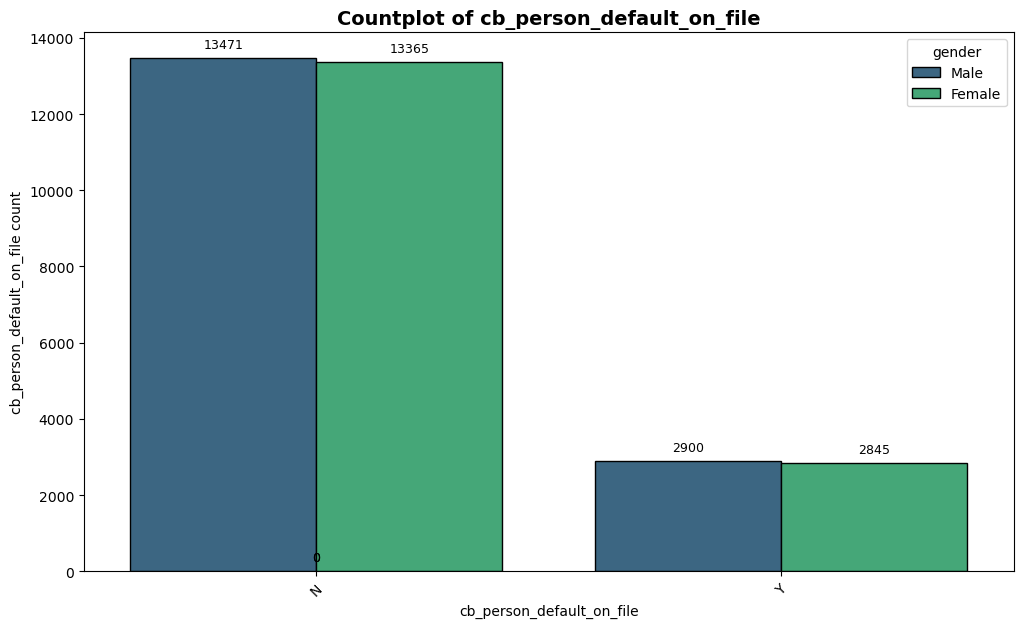

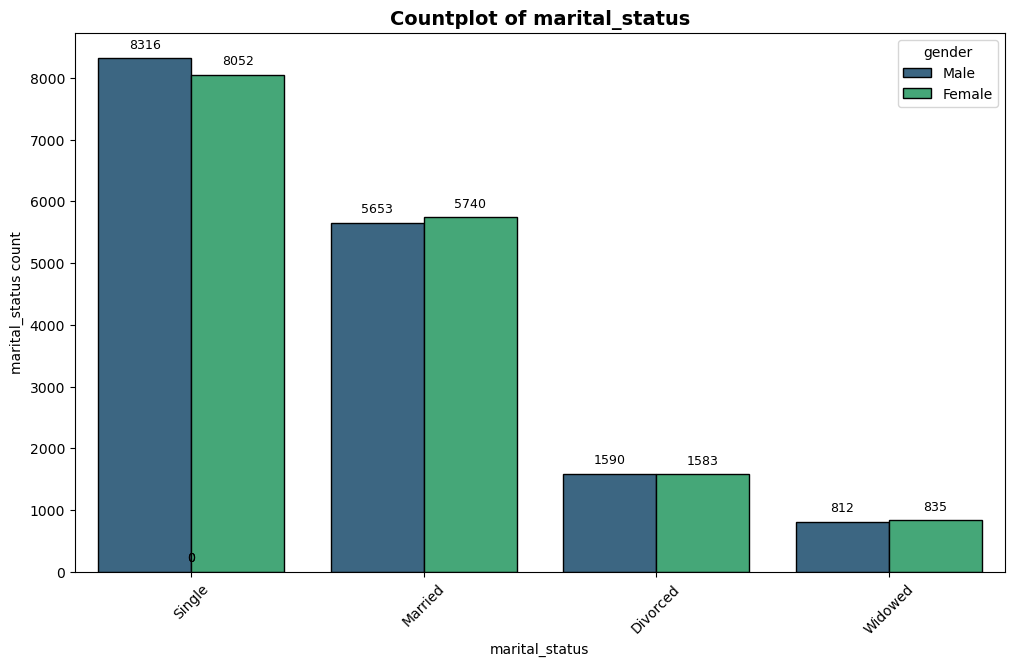

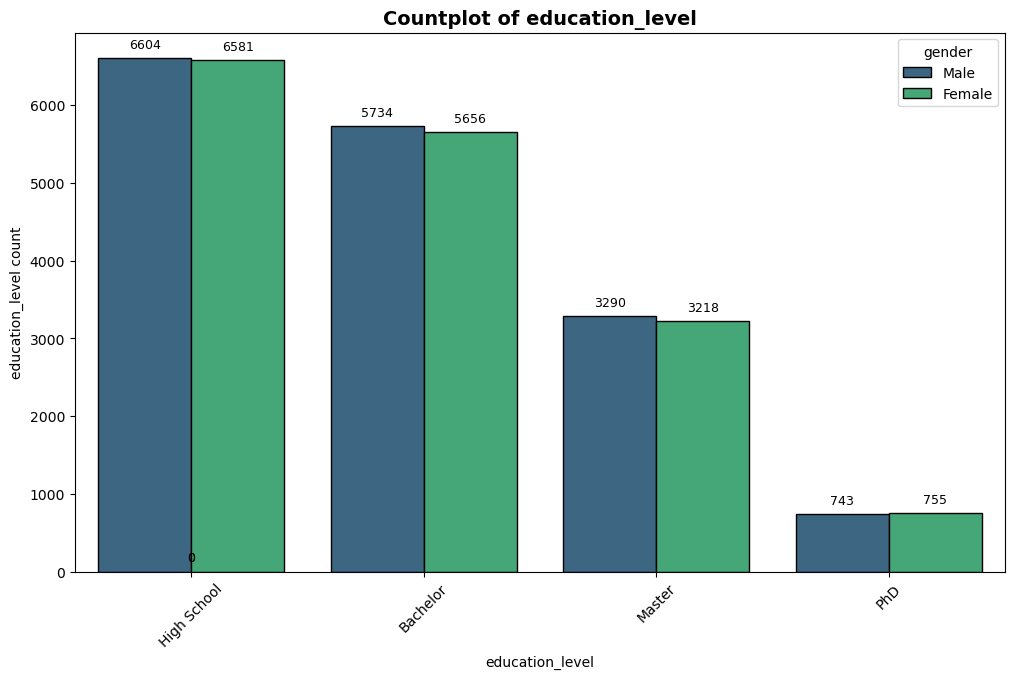

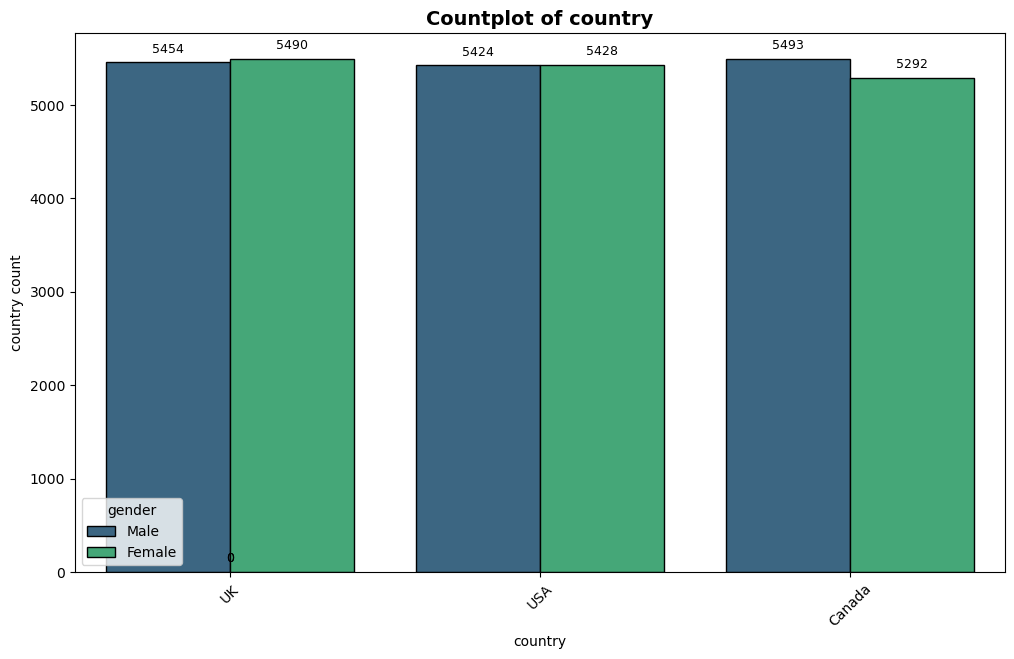

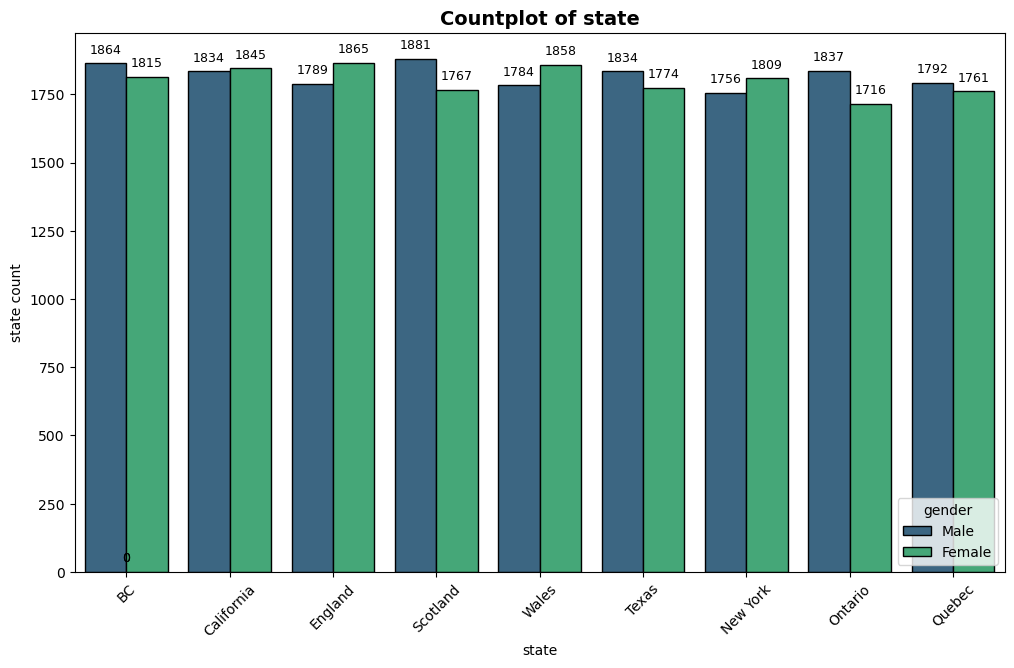

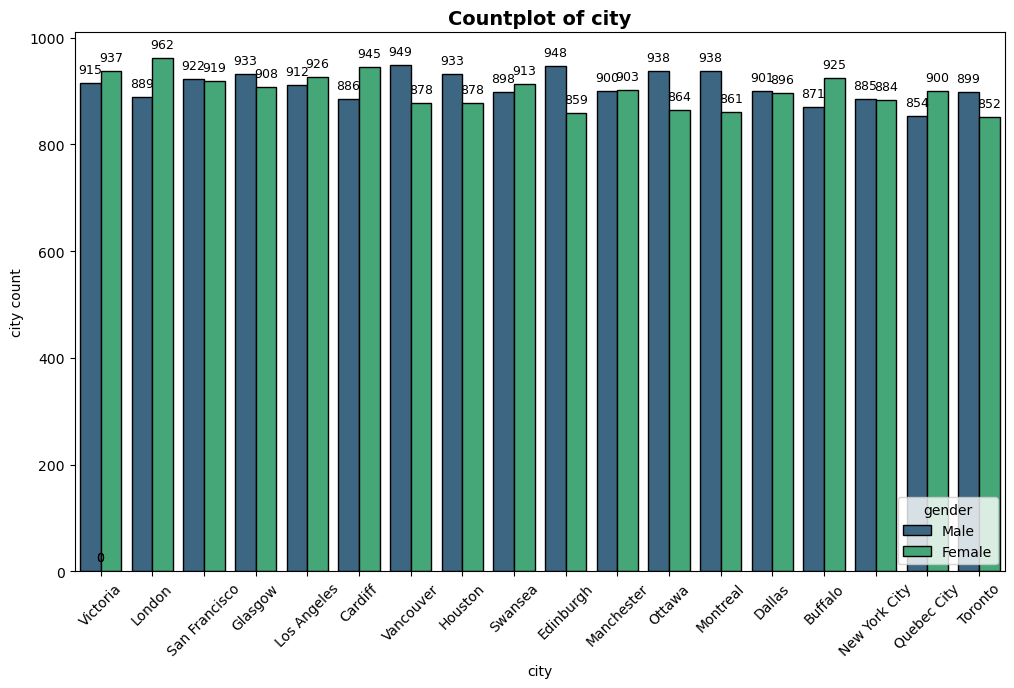

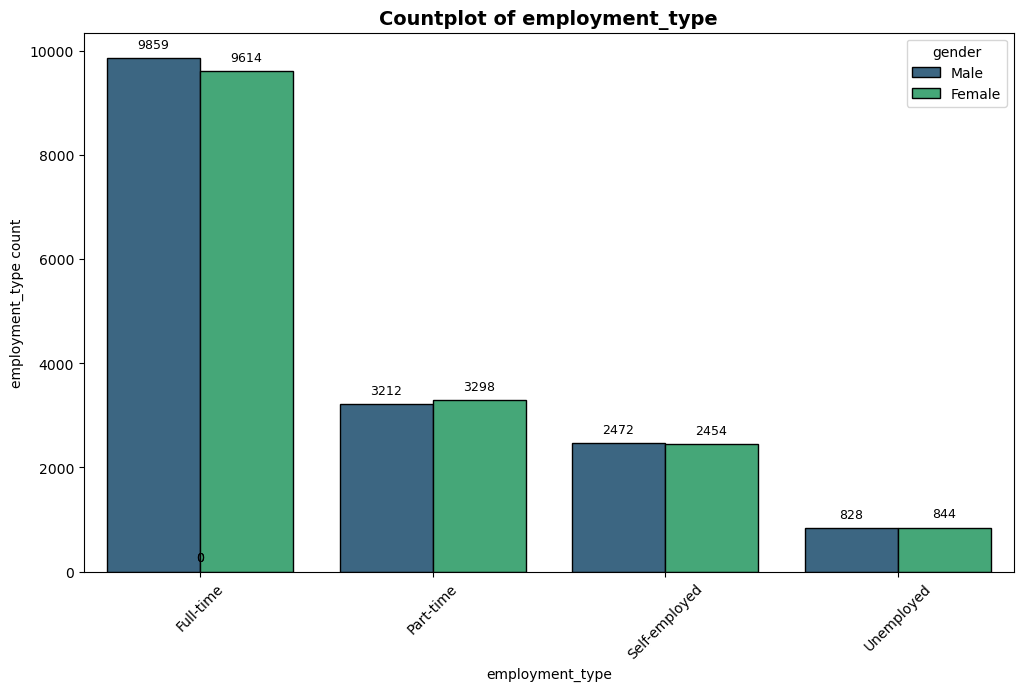

In [53]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','marital_status','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue ='gender', palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

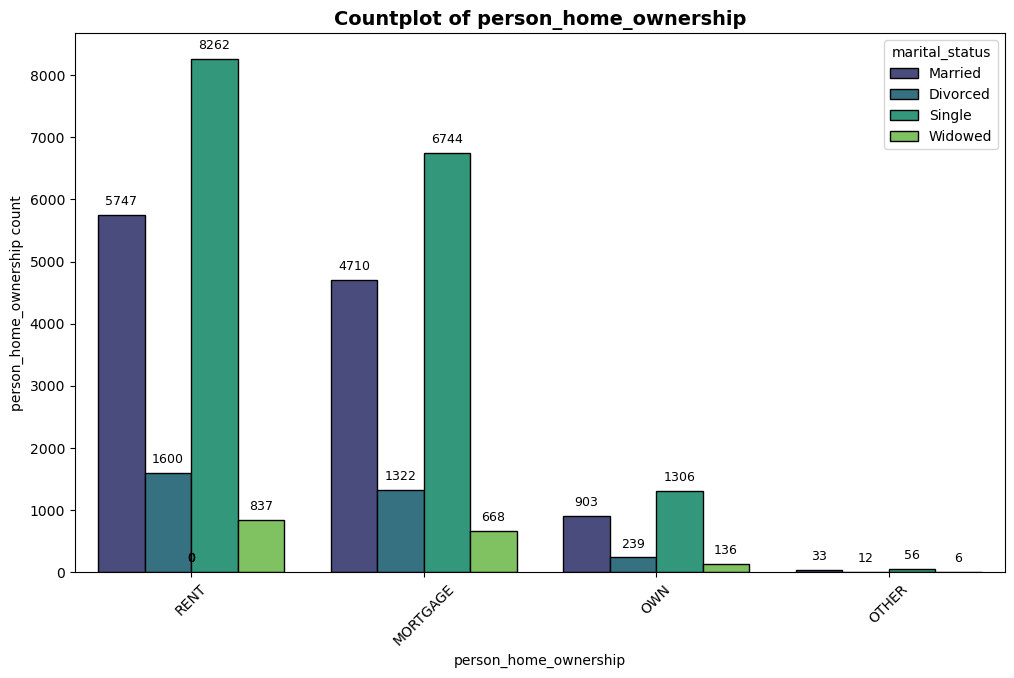

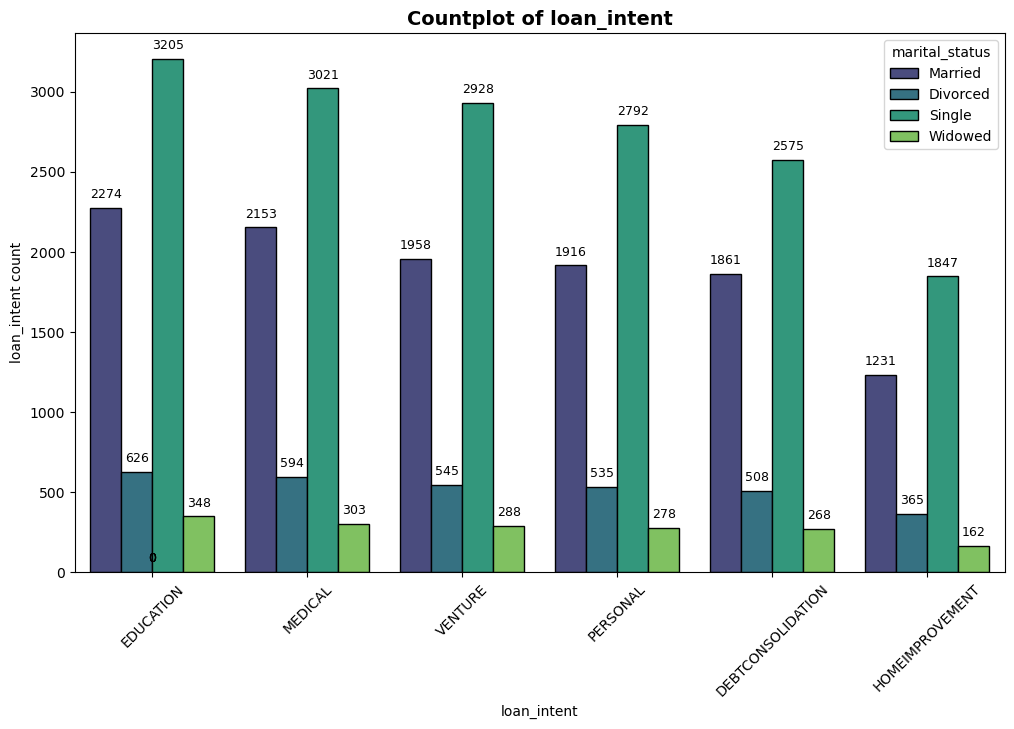

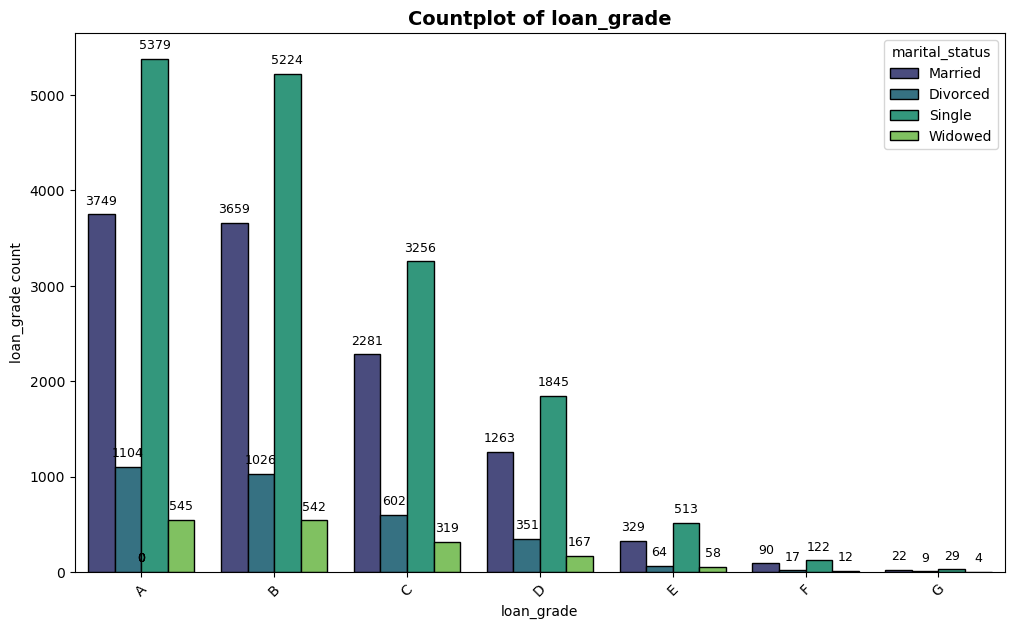

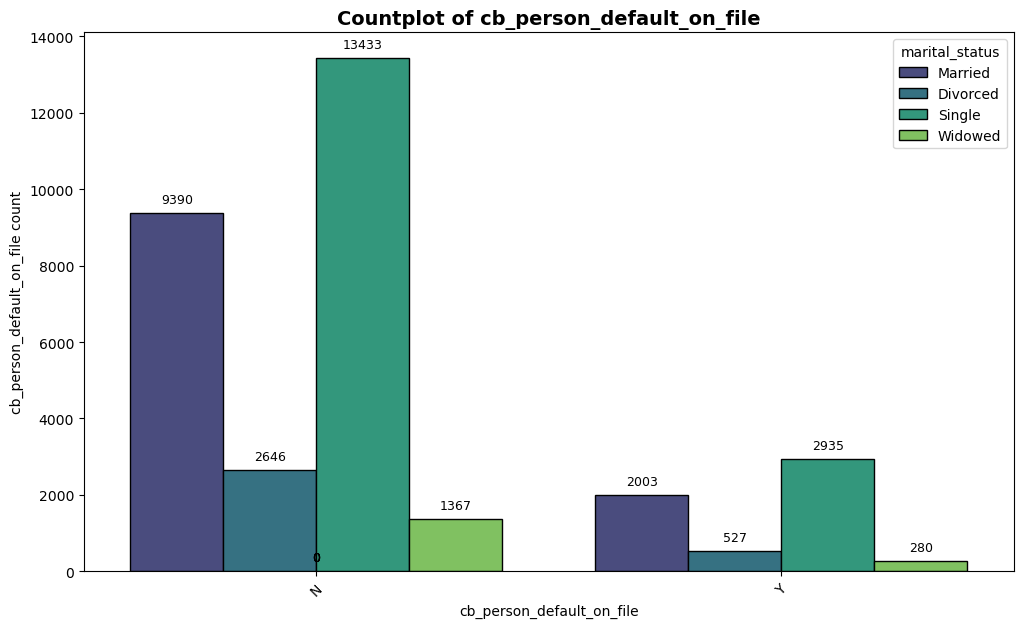

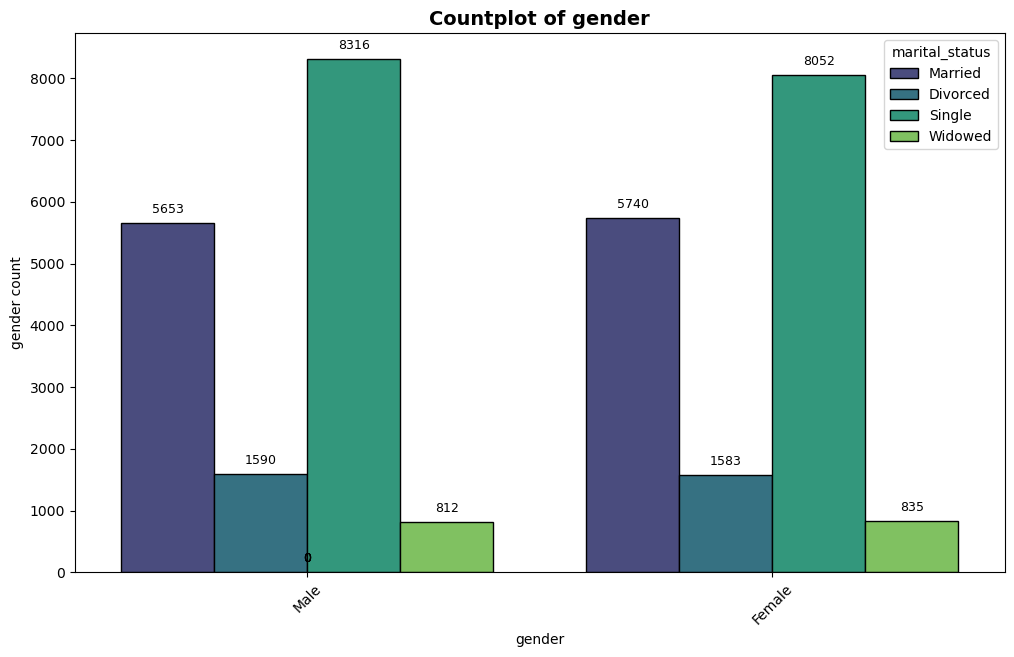

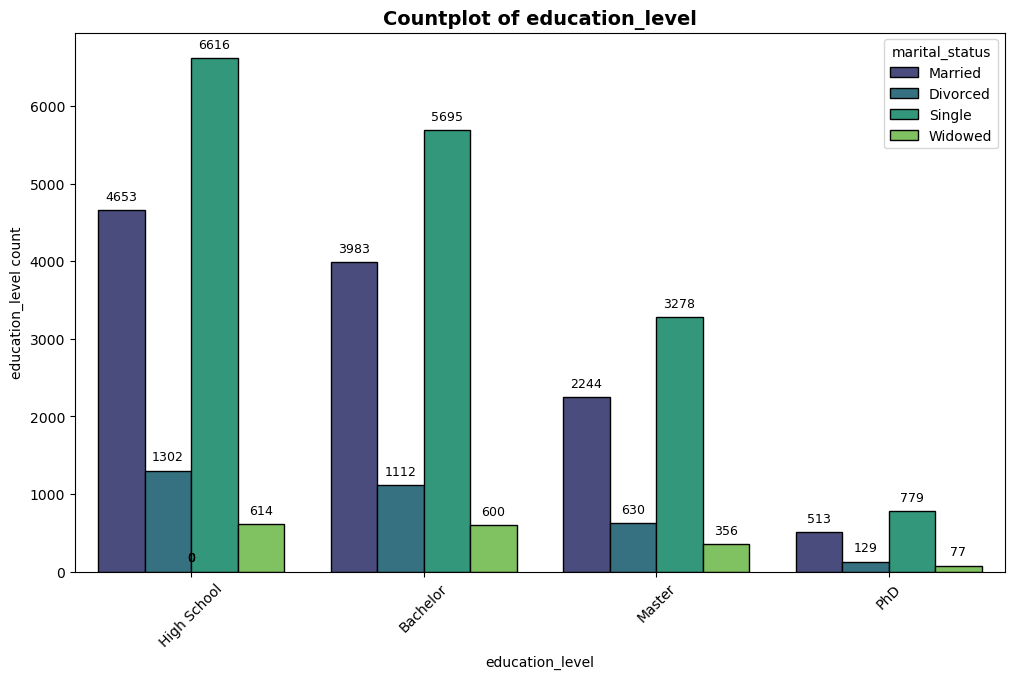

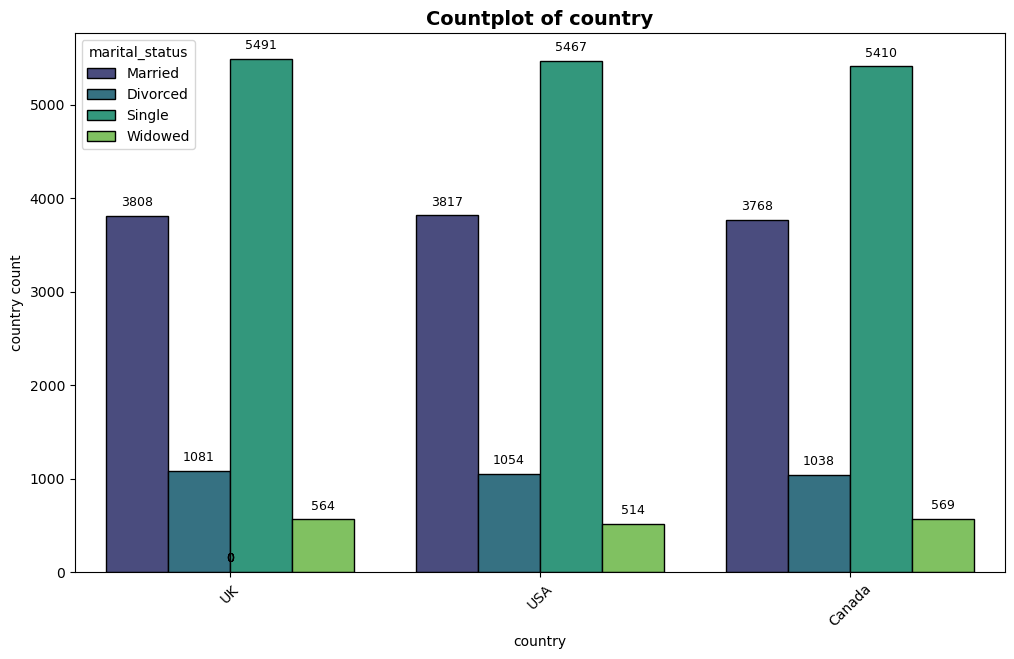

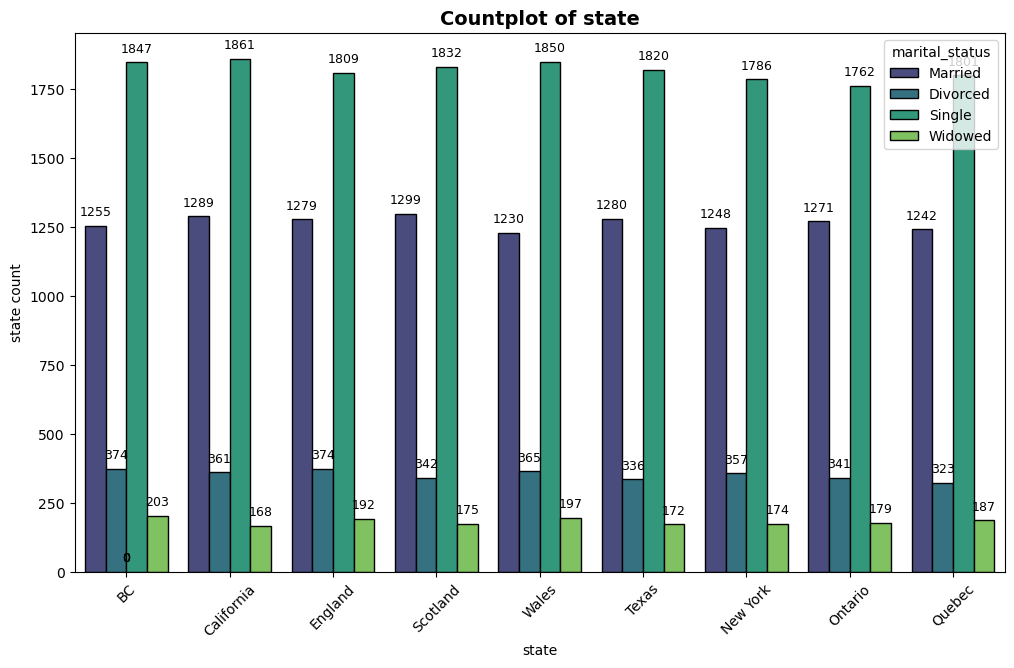

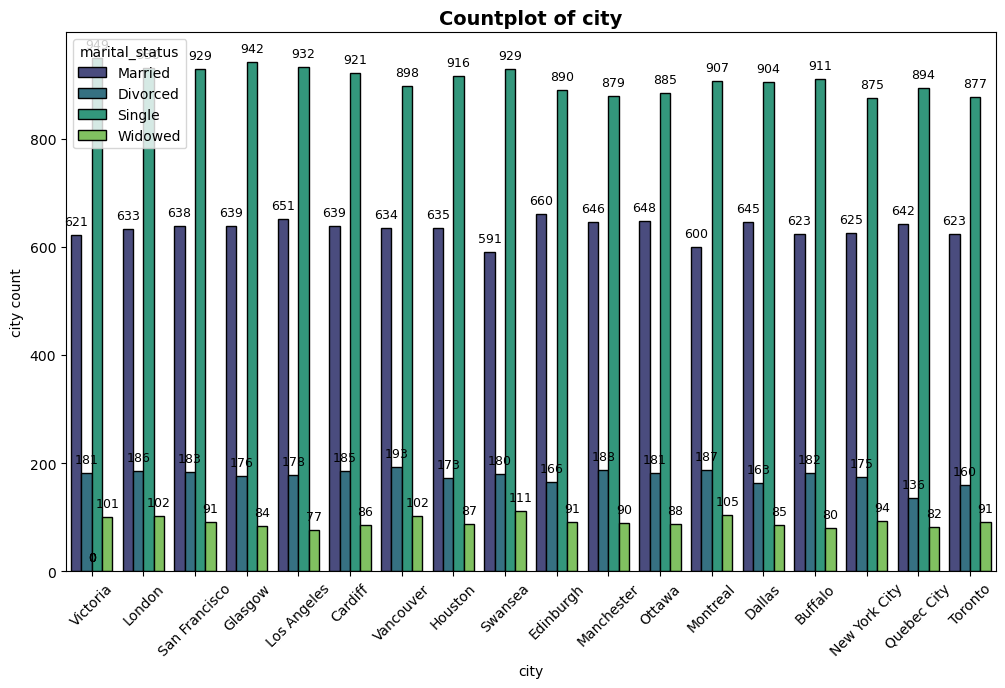

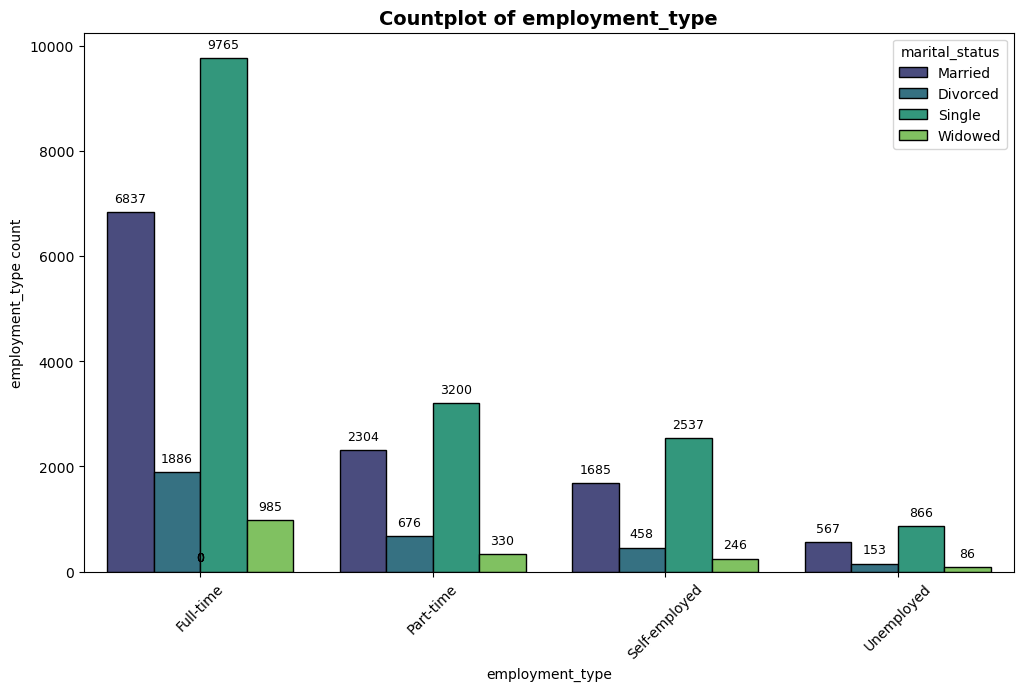

In [54]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','education_level',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'marital_status',palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

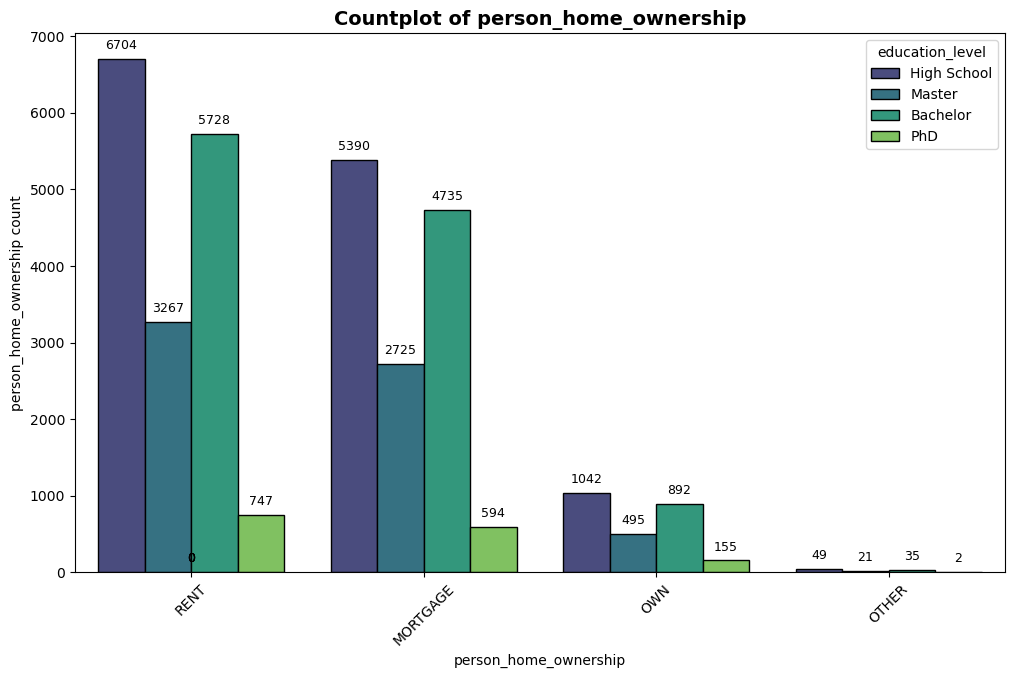

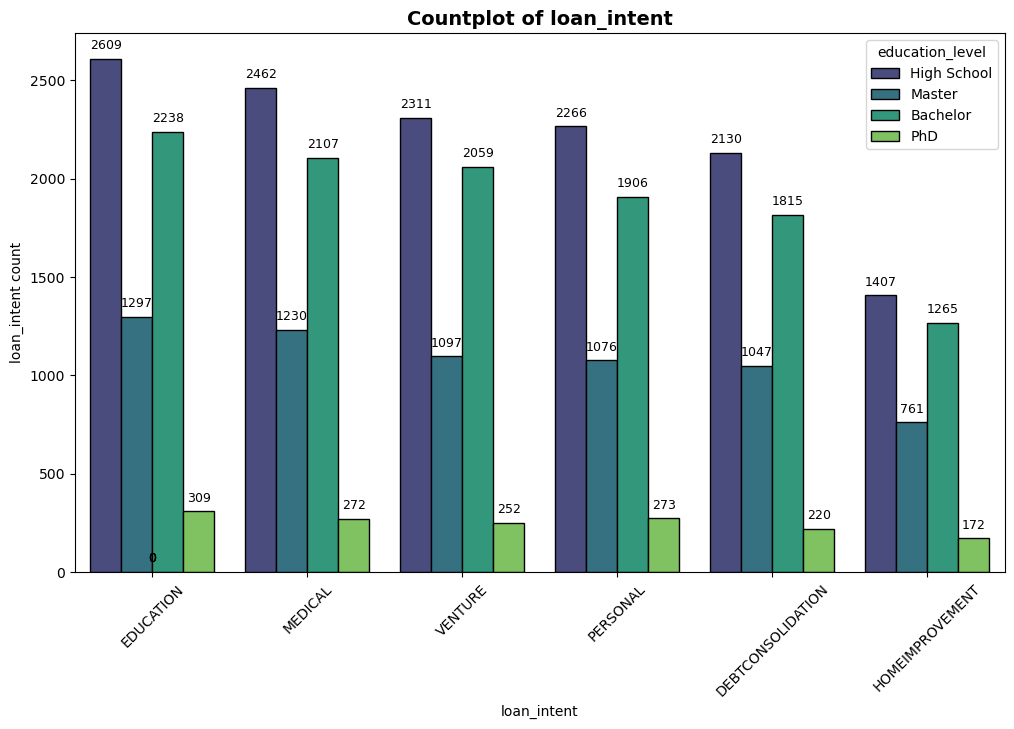

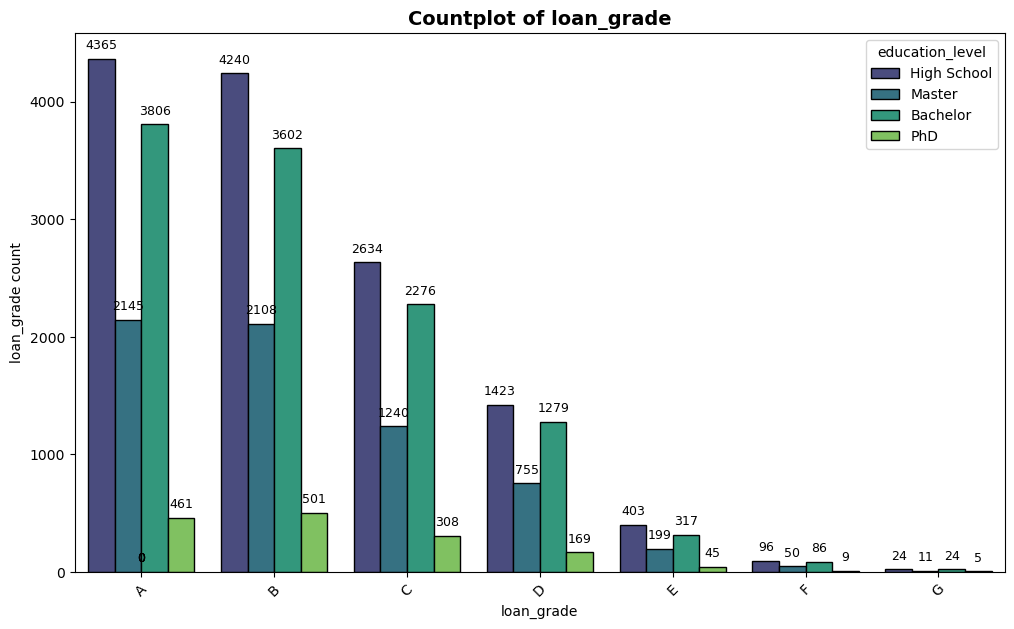

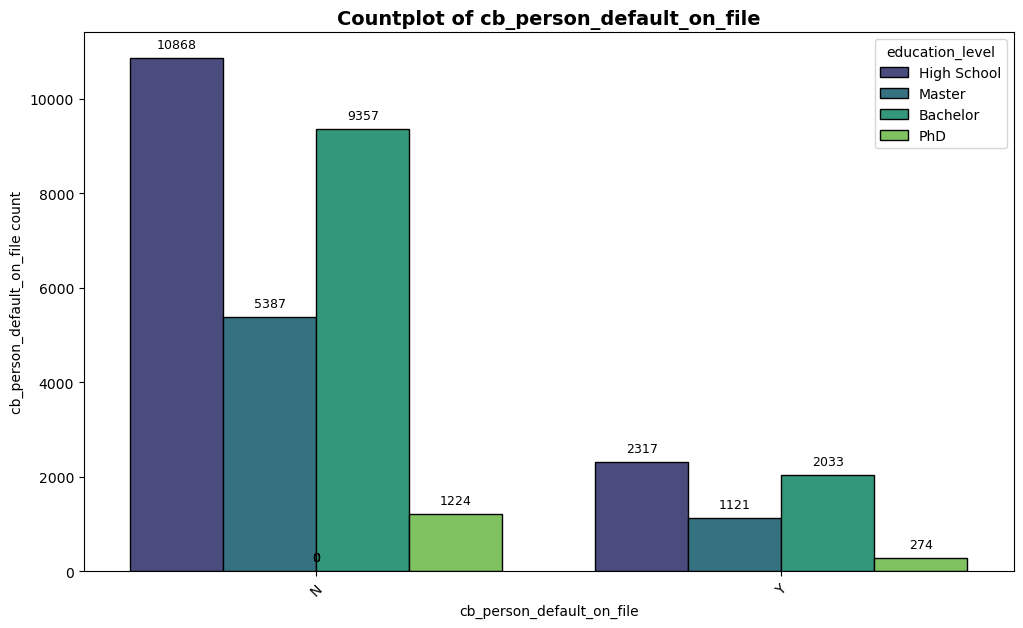

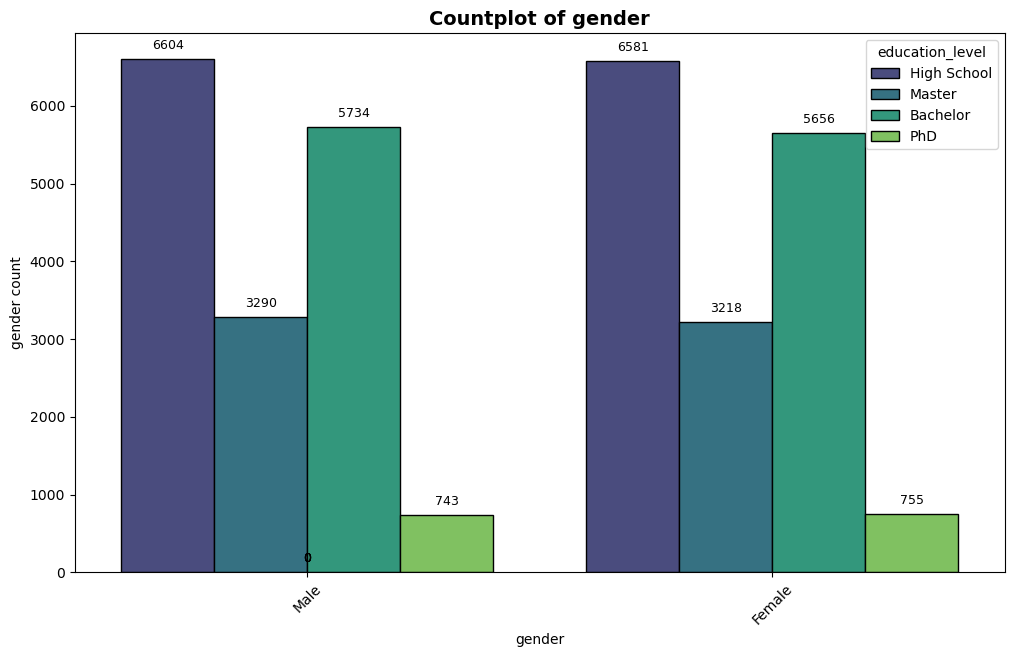

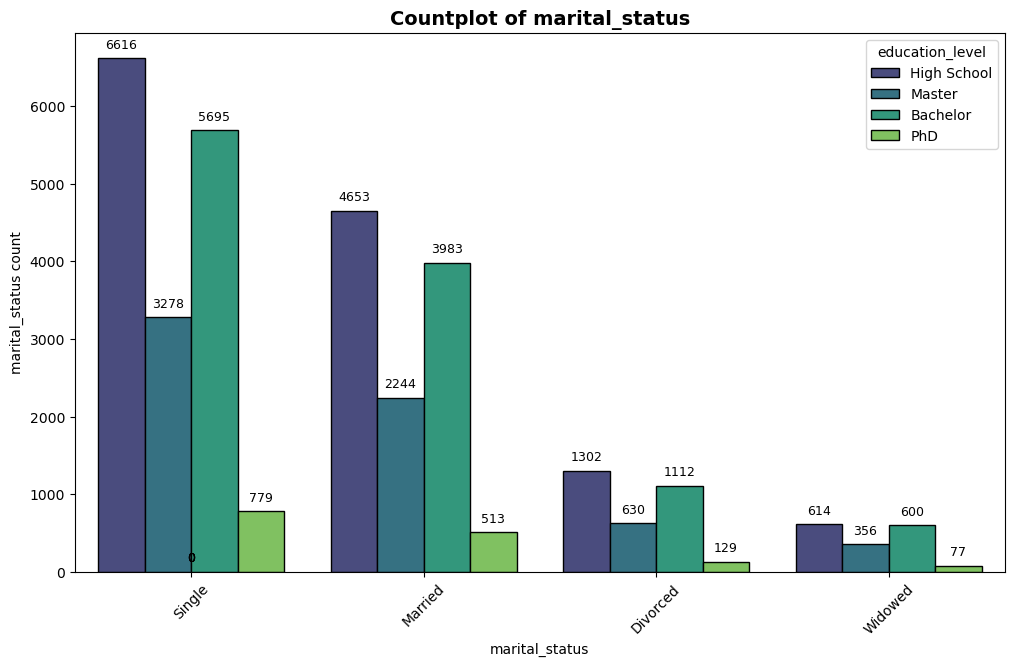

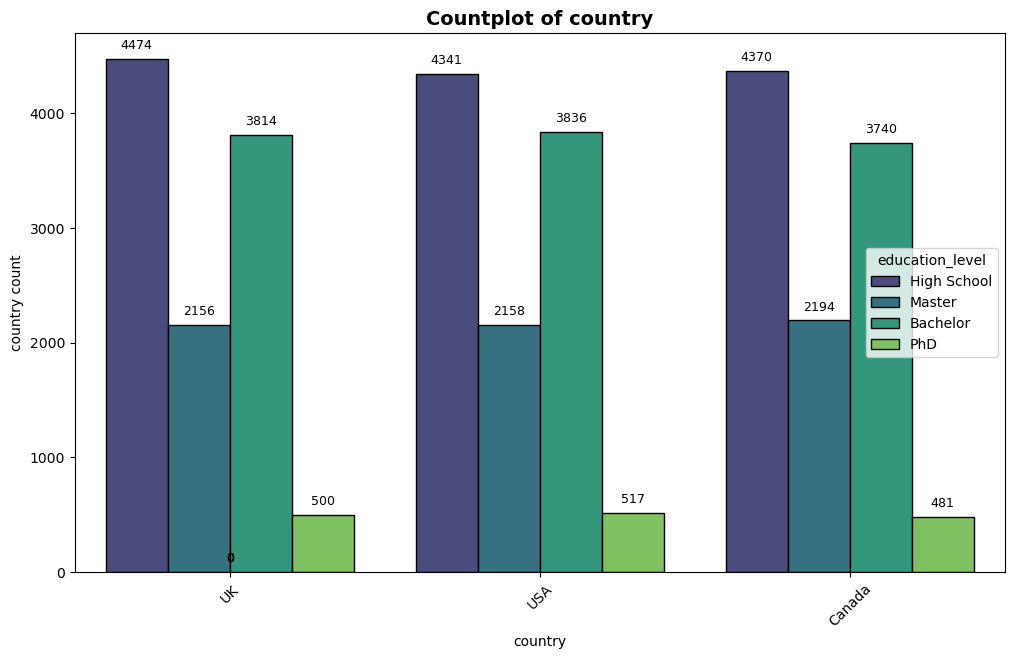

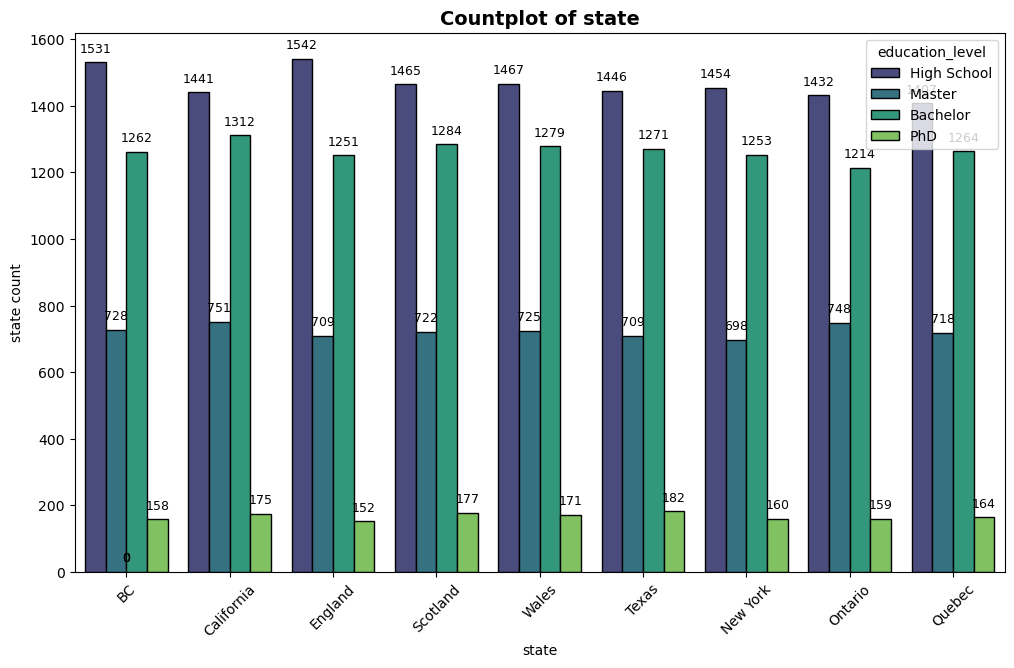

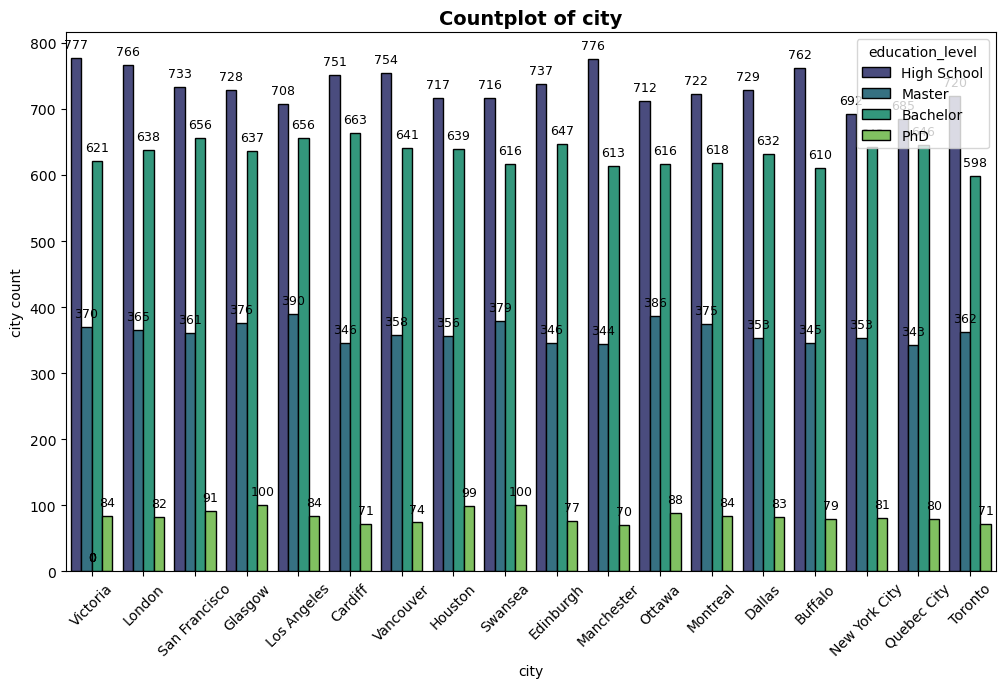

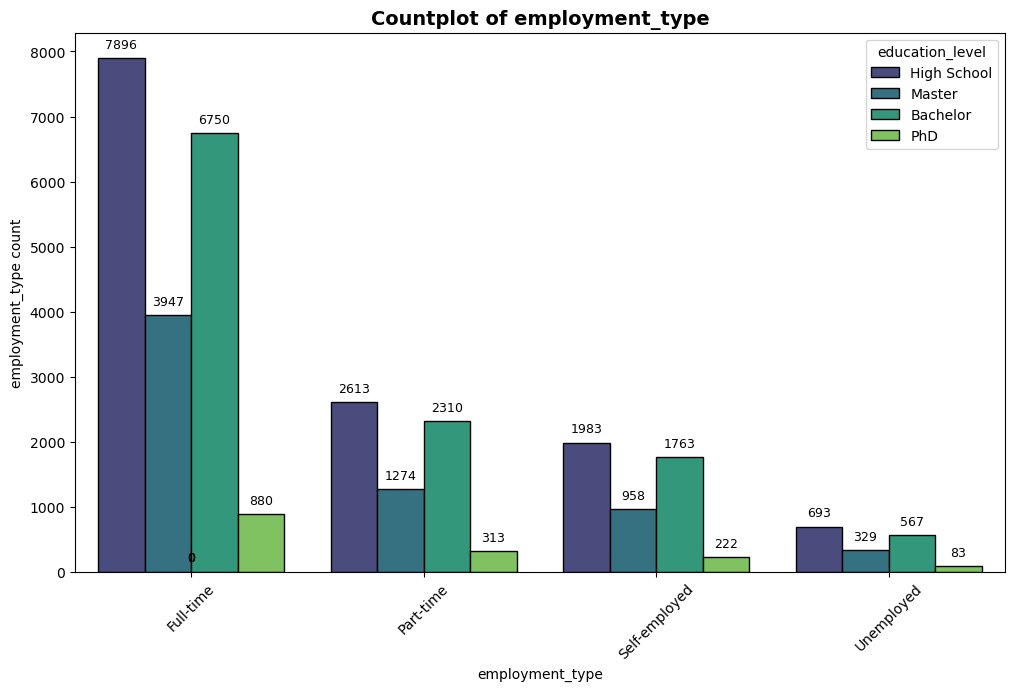

In [55]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status',
'country','state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'education_level',palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

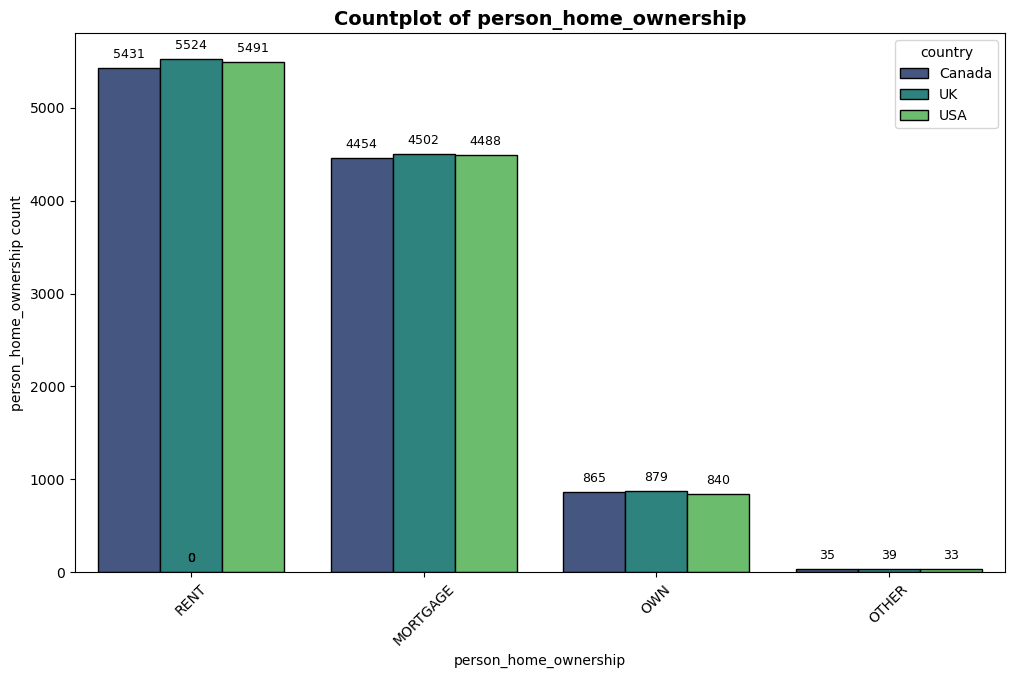

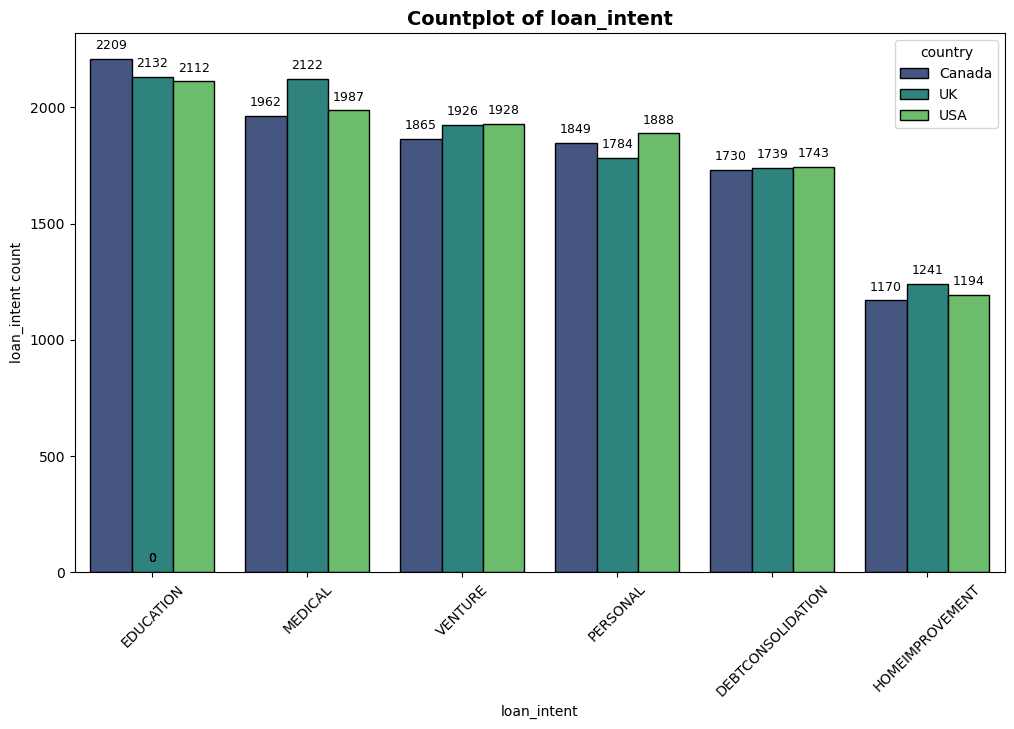

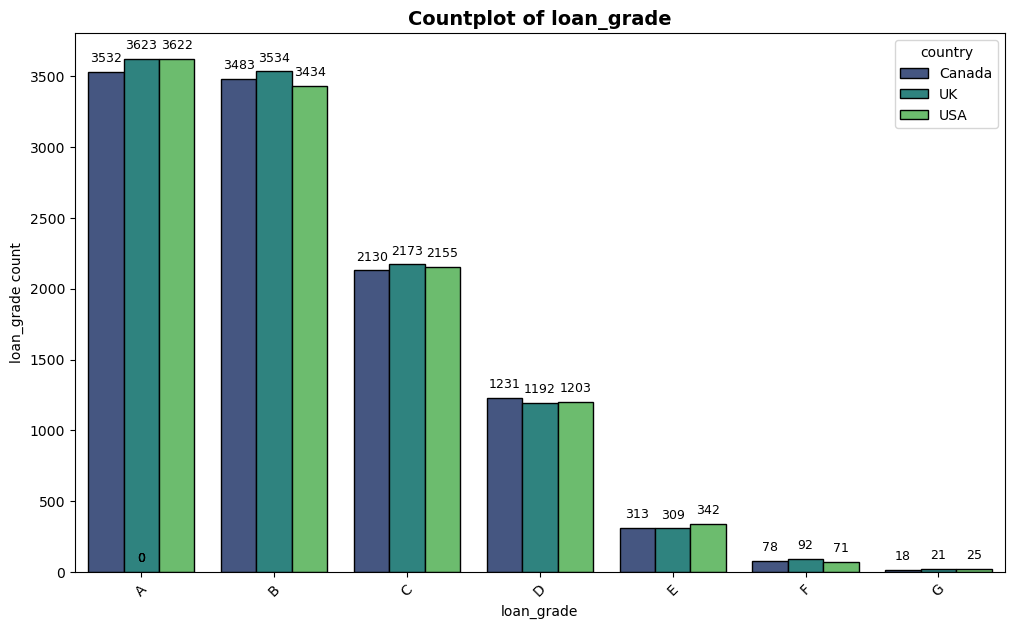

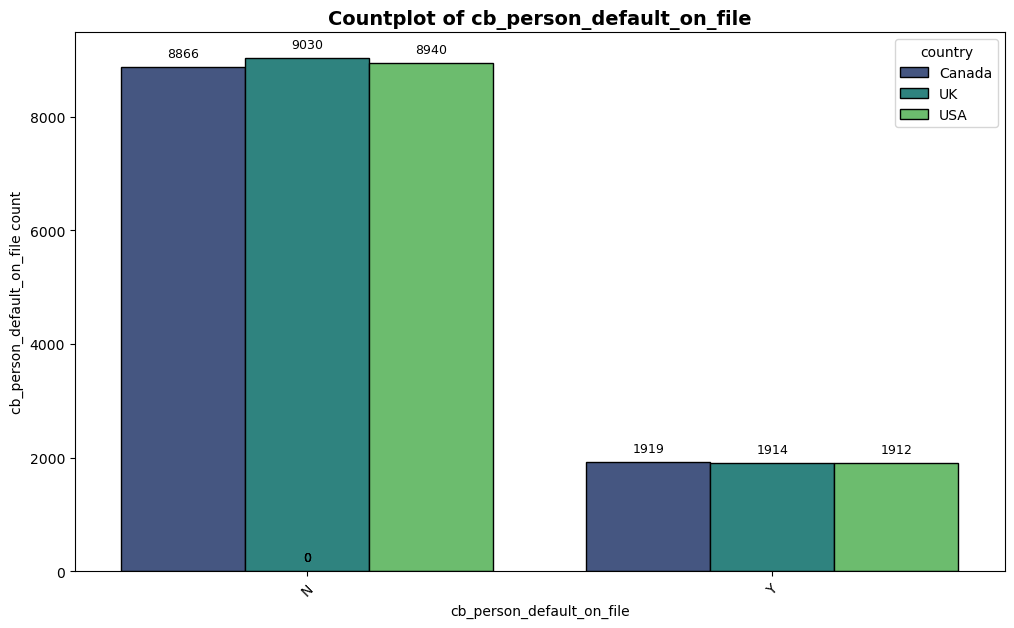

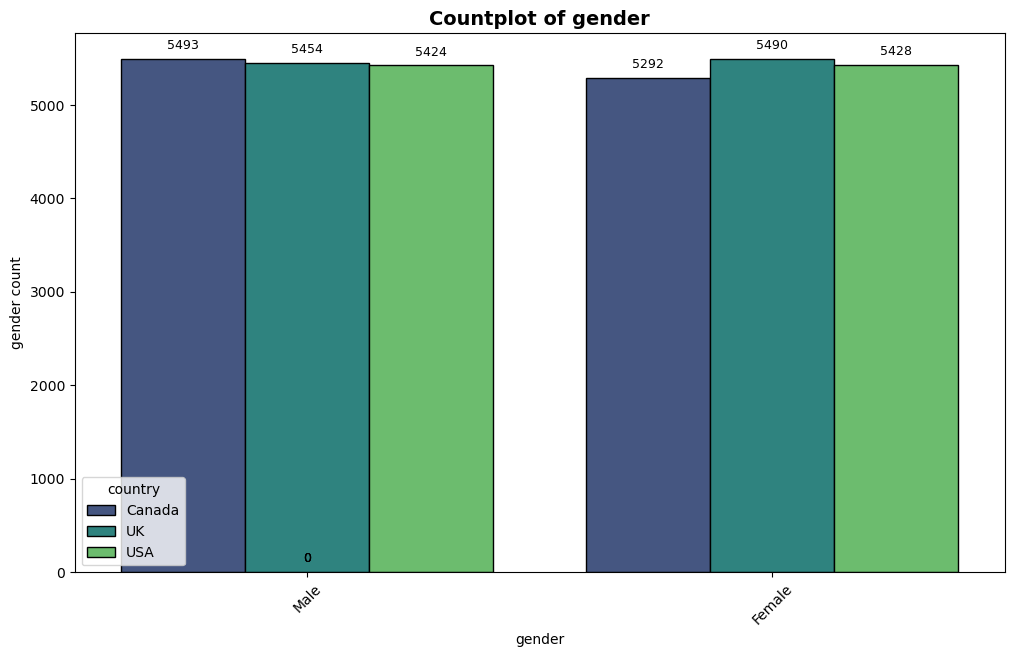

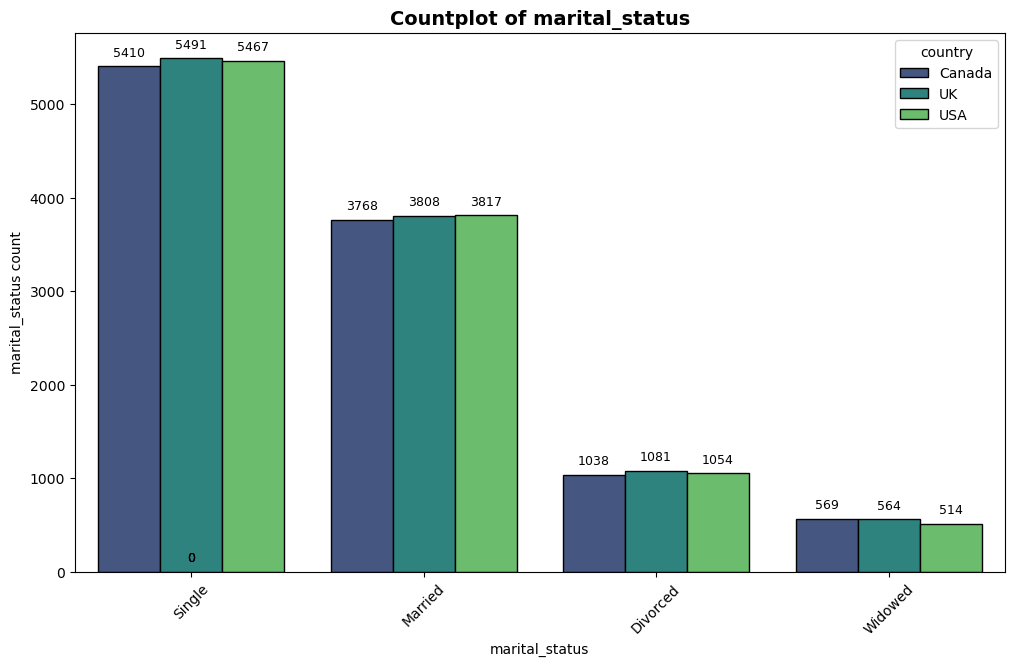

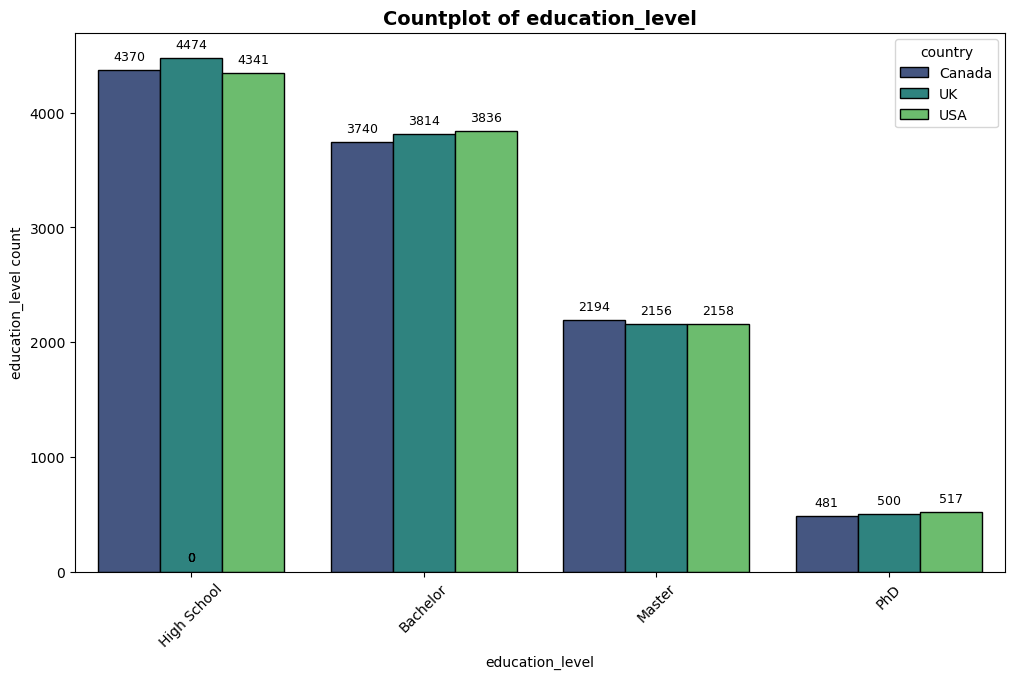

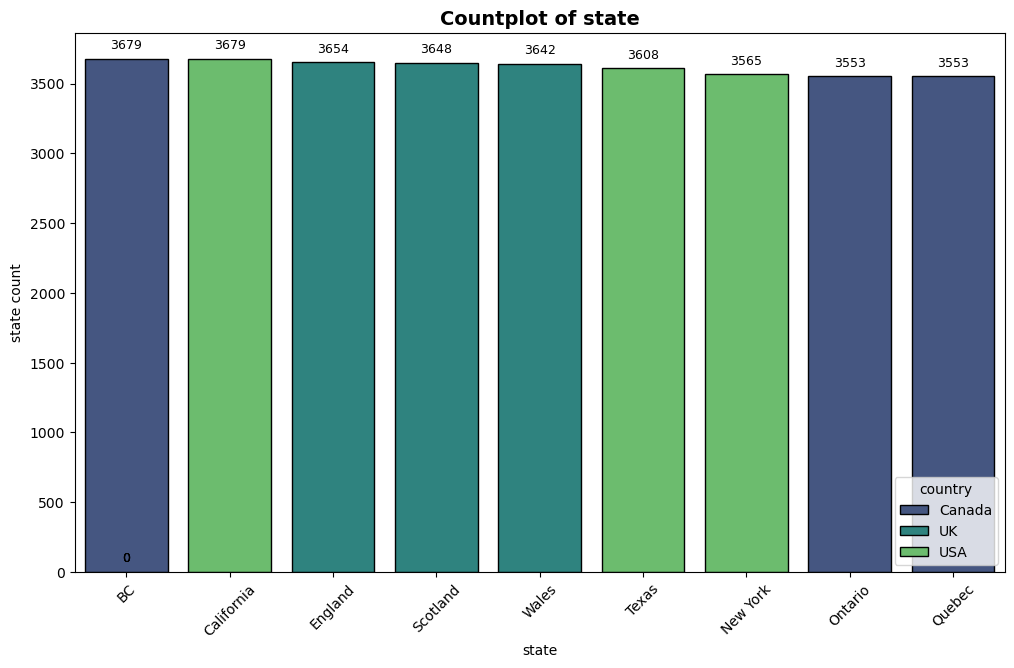

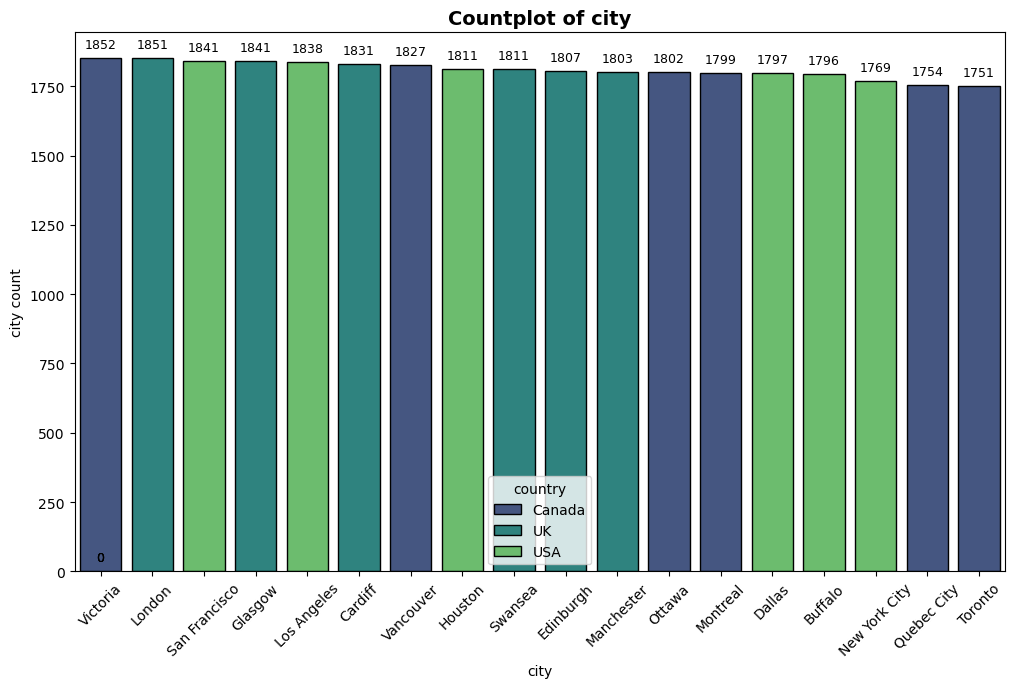

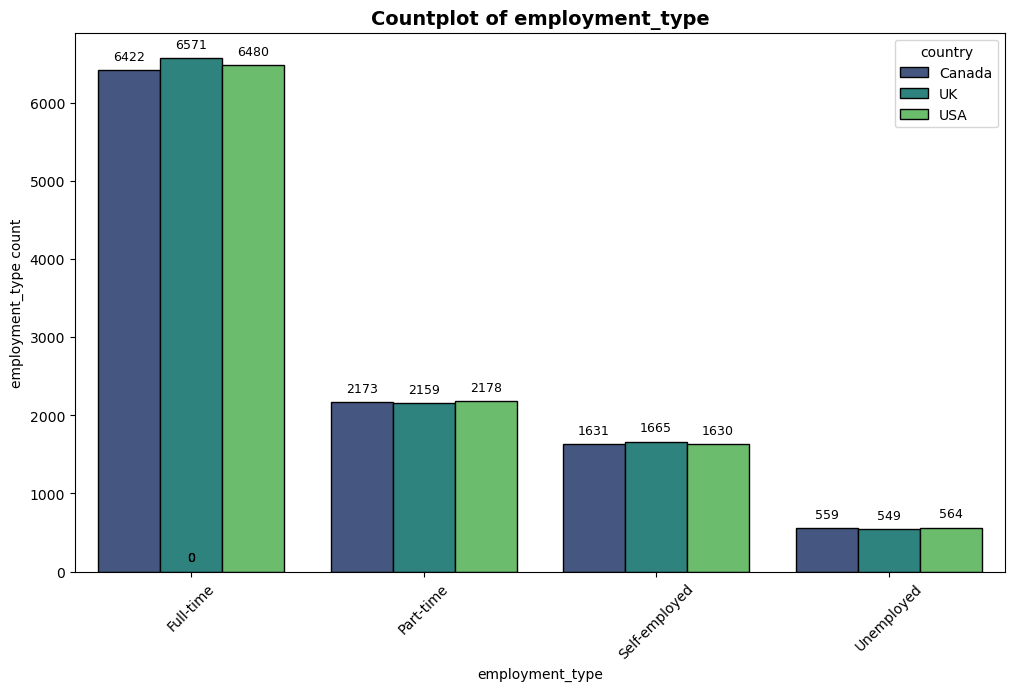

In [56]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'state','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'country',palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

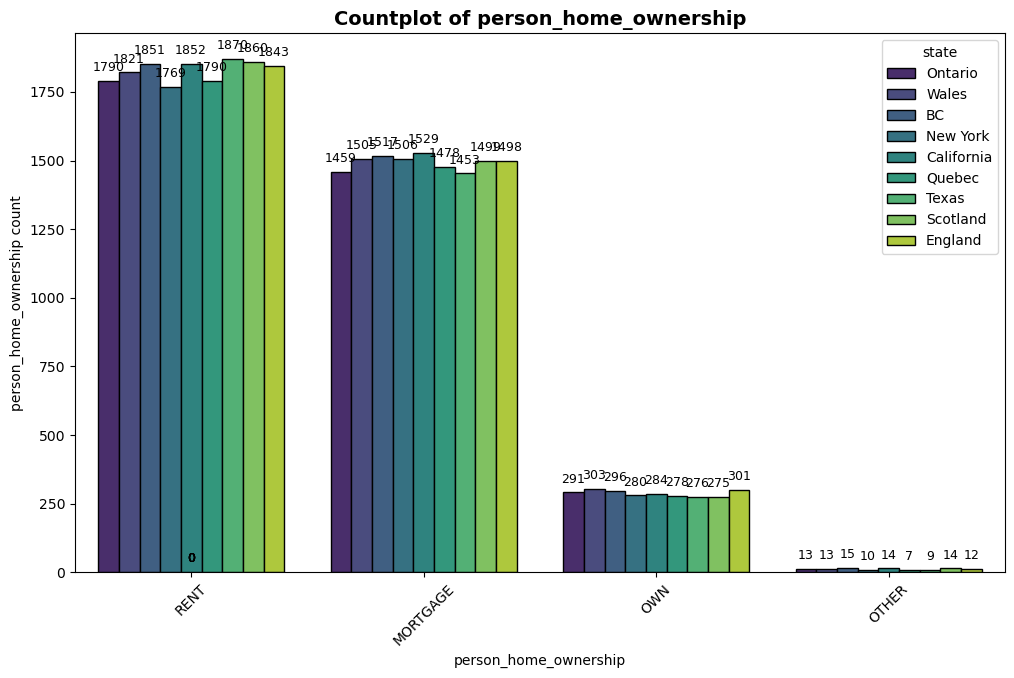

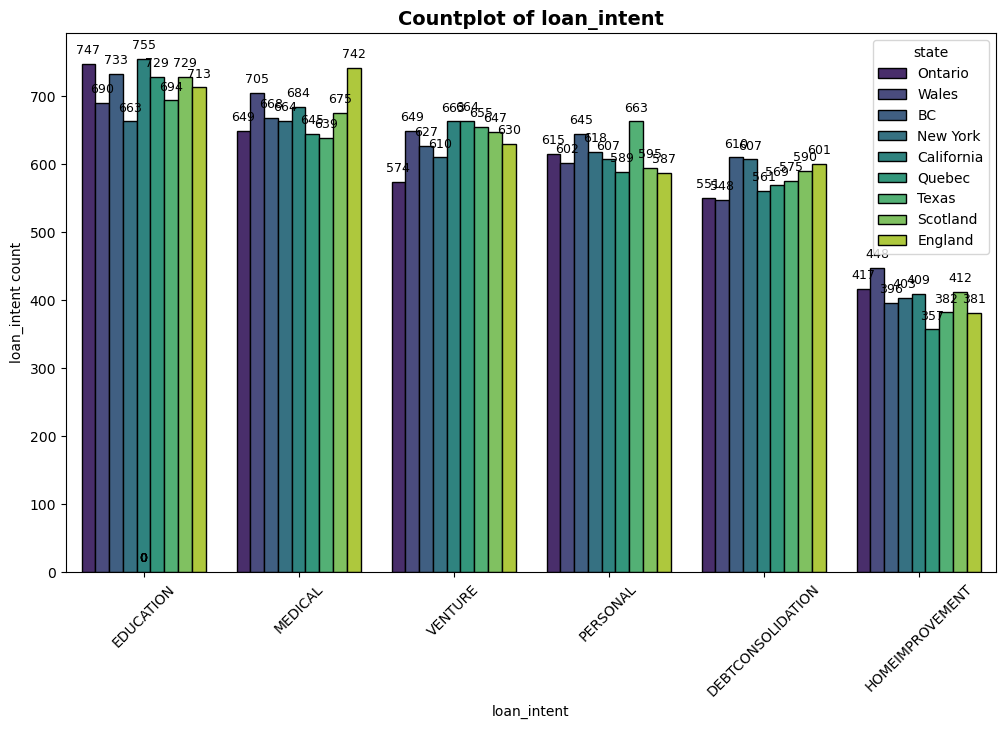

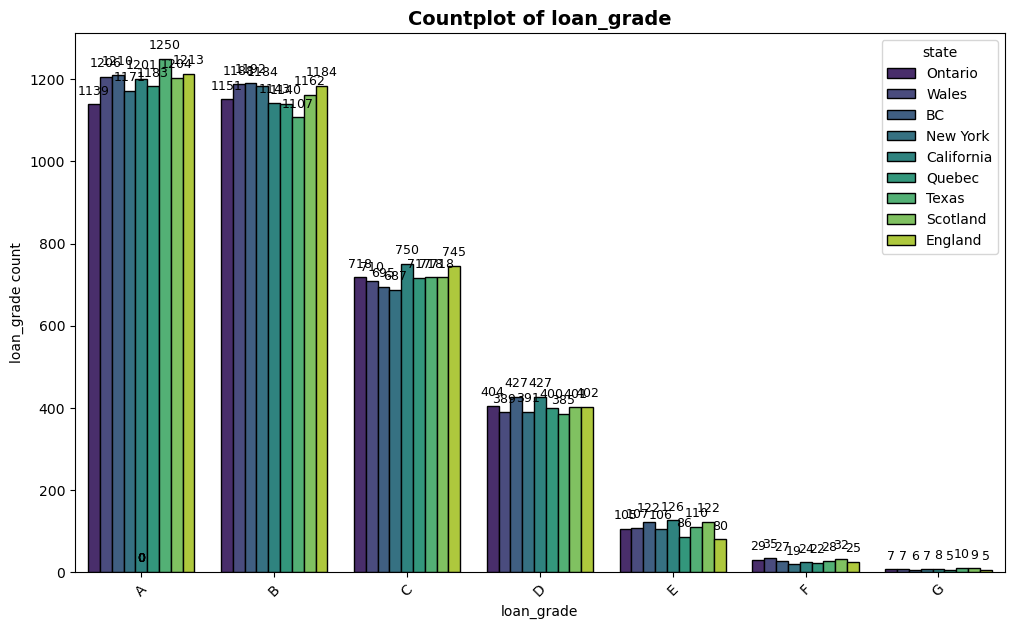

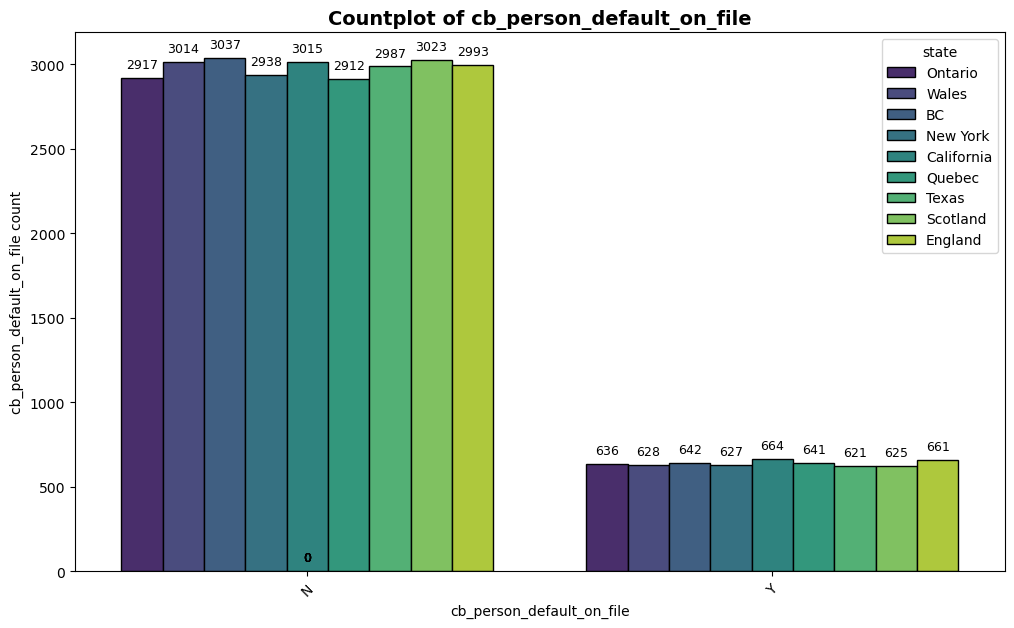

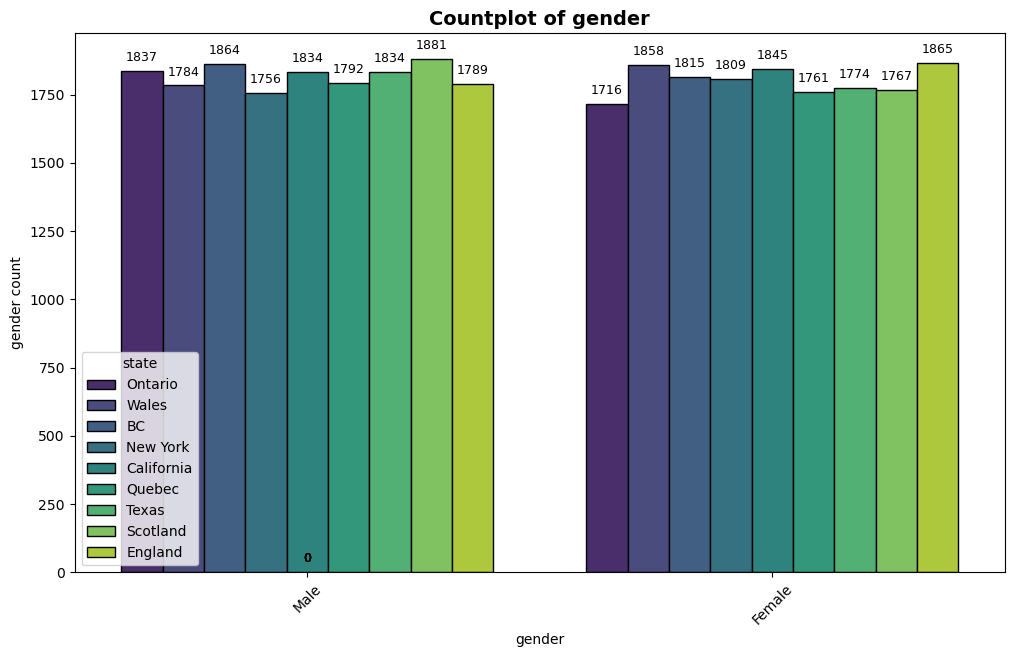

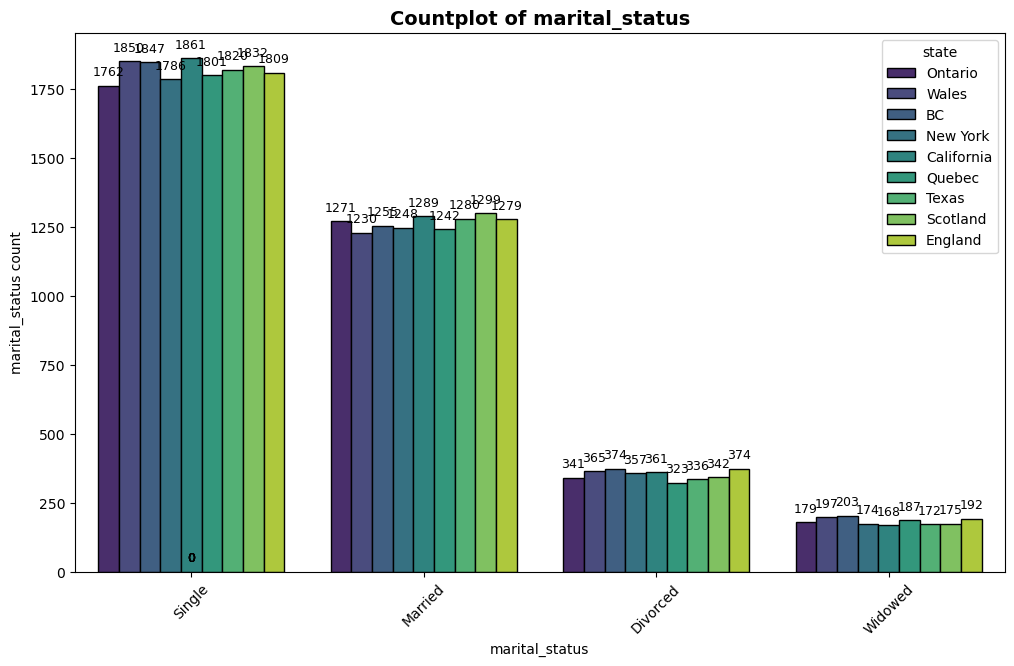

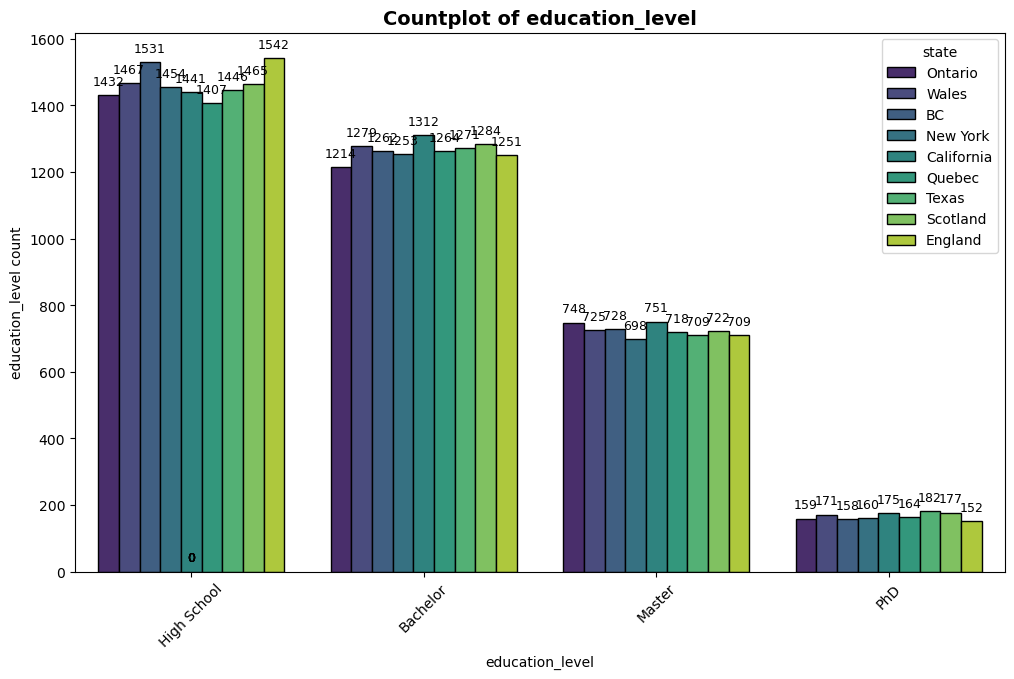

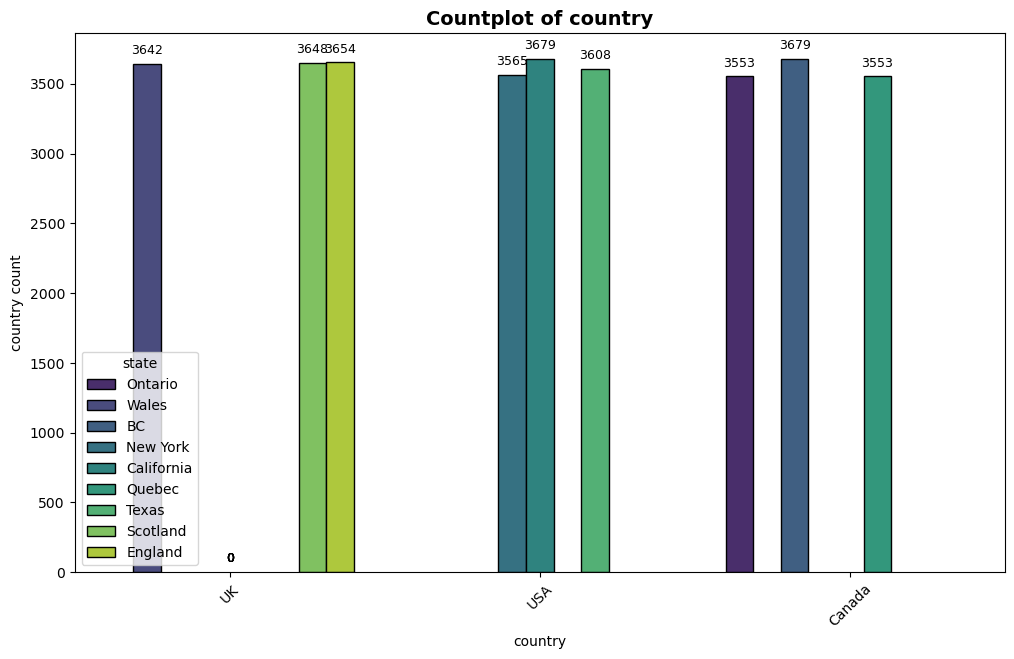

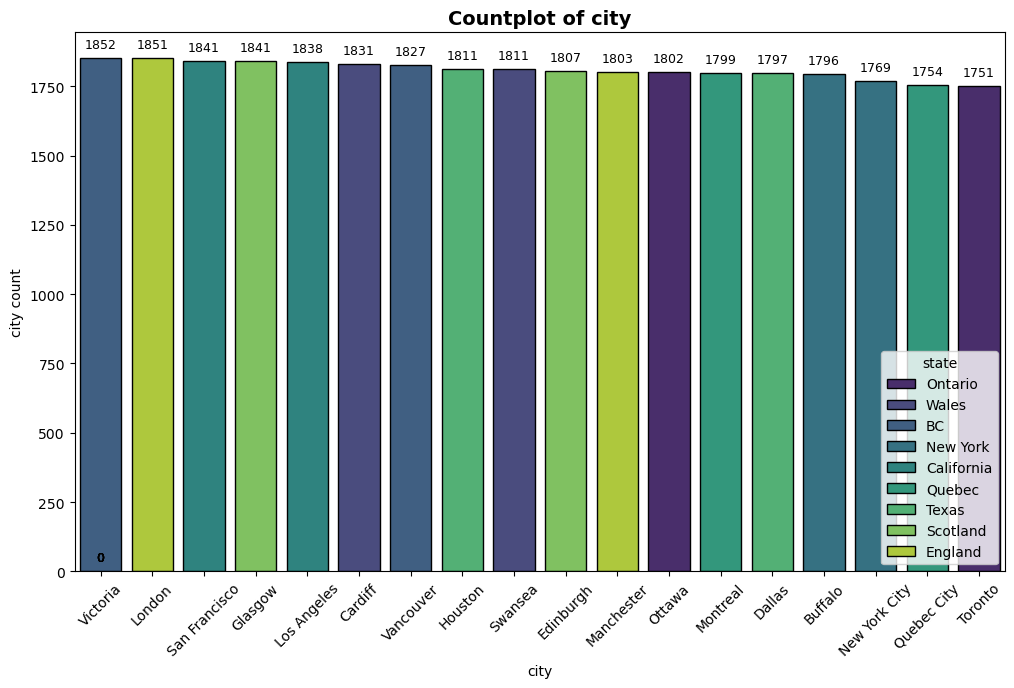

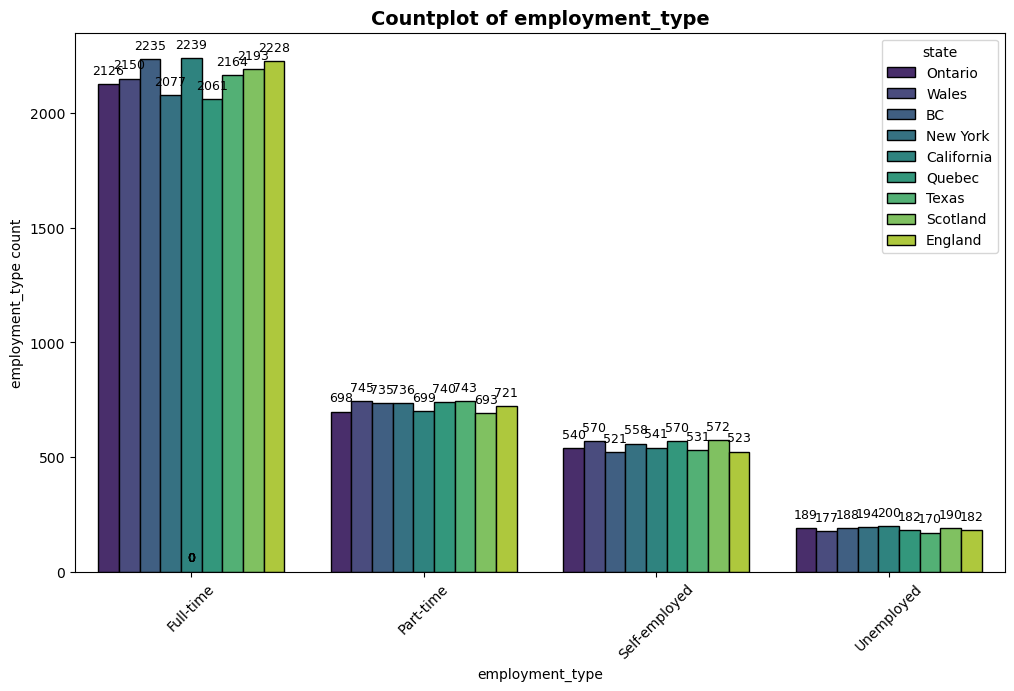

In [57]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','city','employment_type']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'state',palette='viridis',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

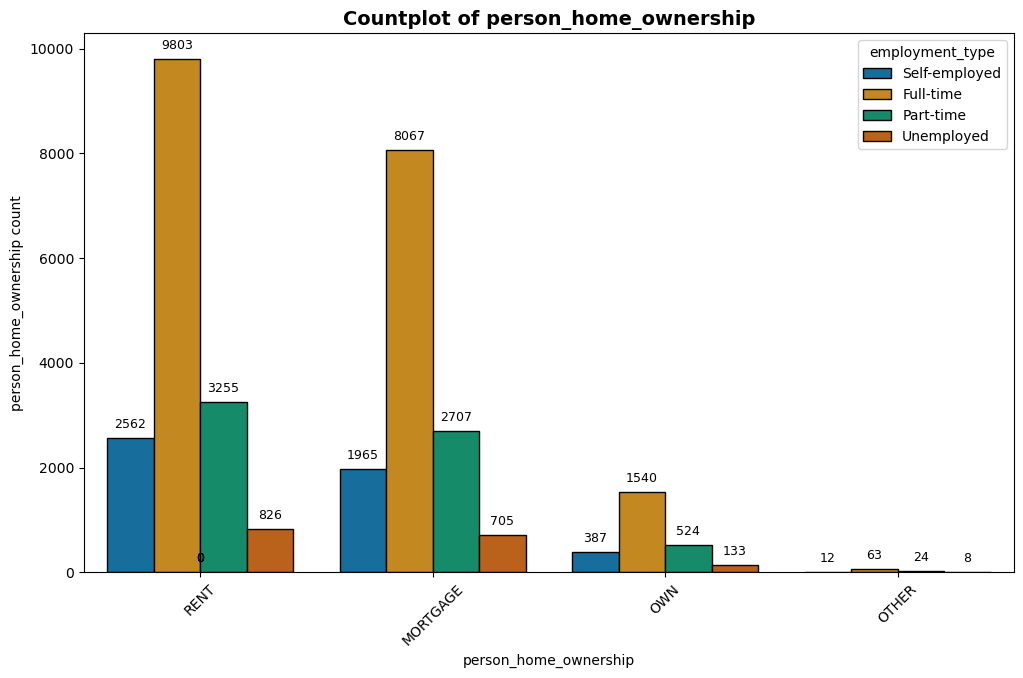

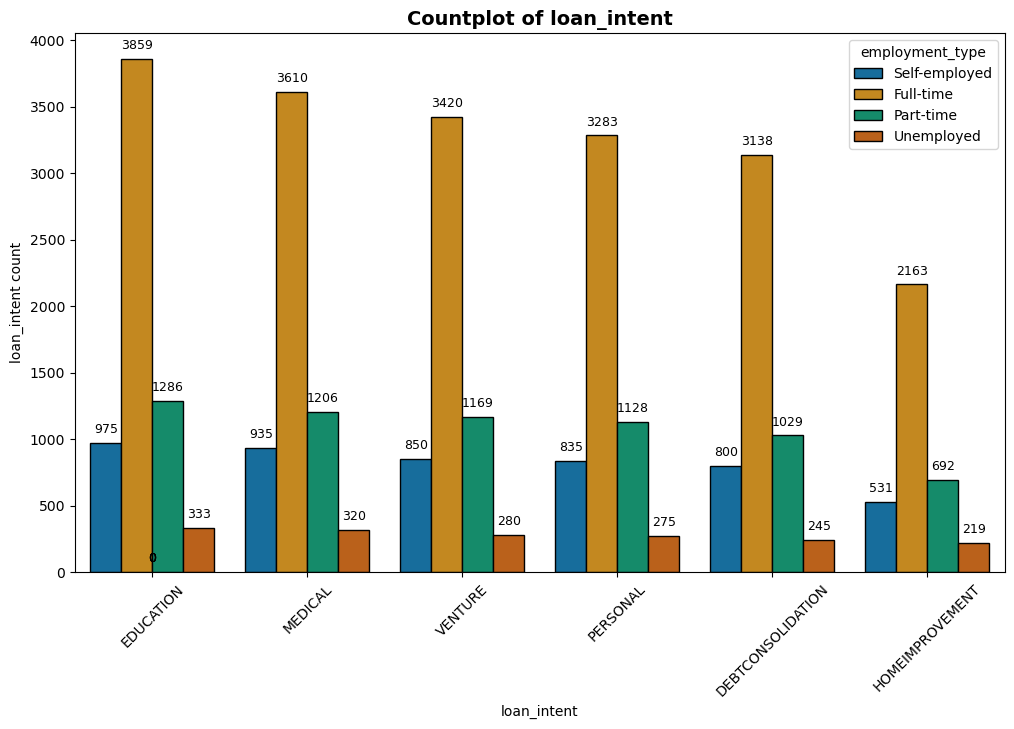

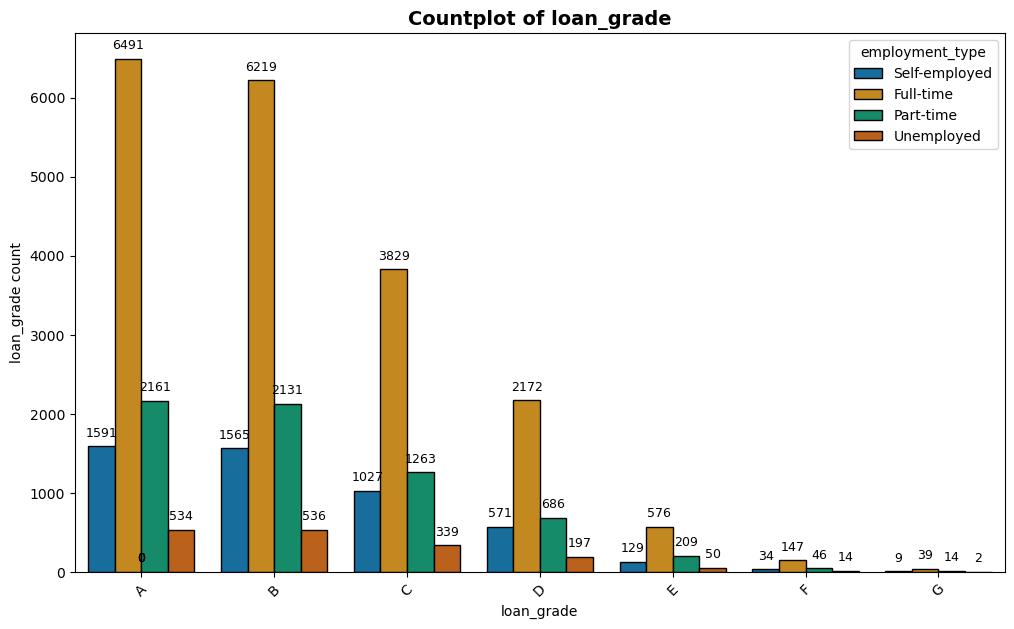

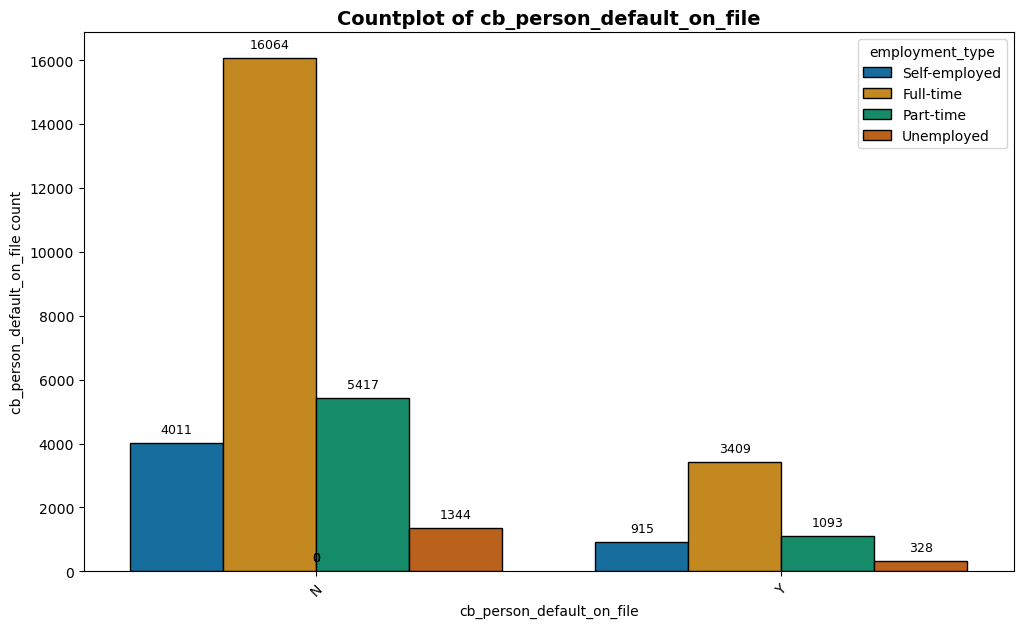

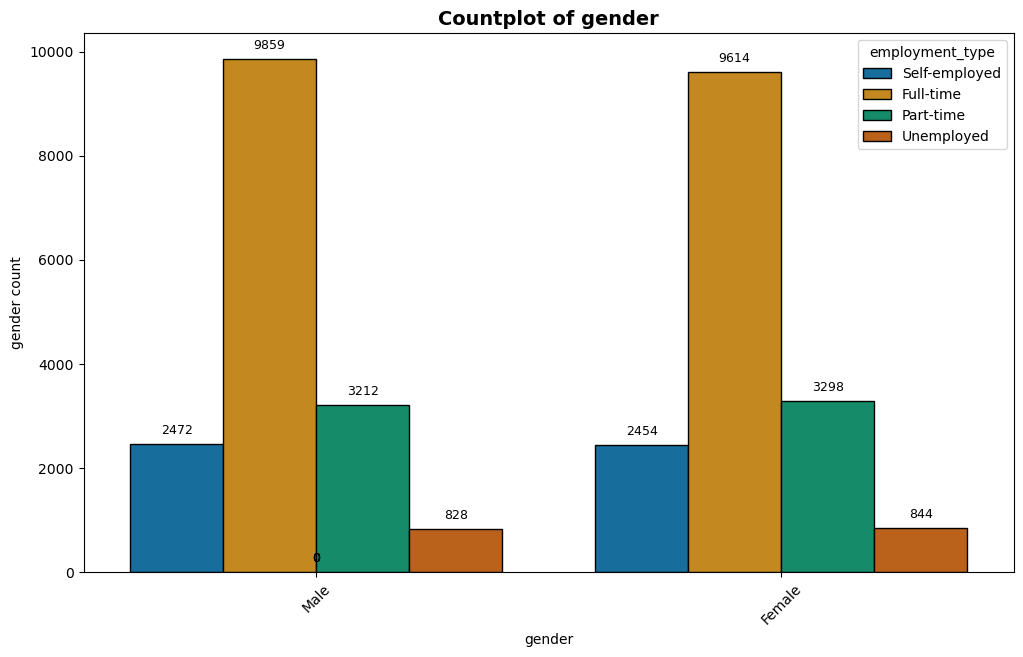

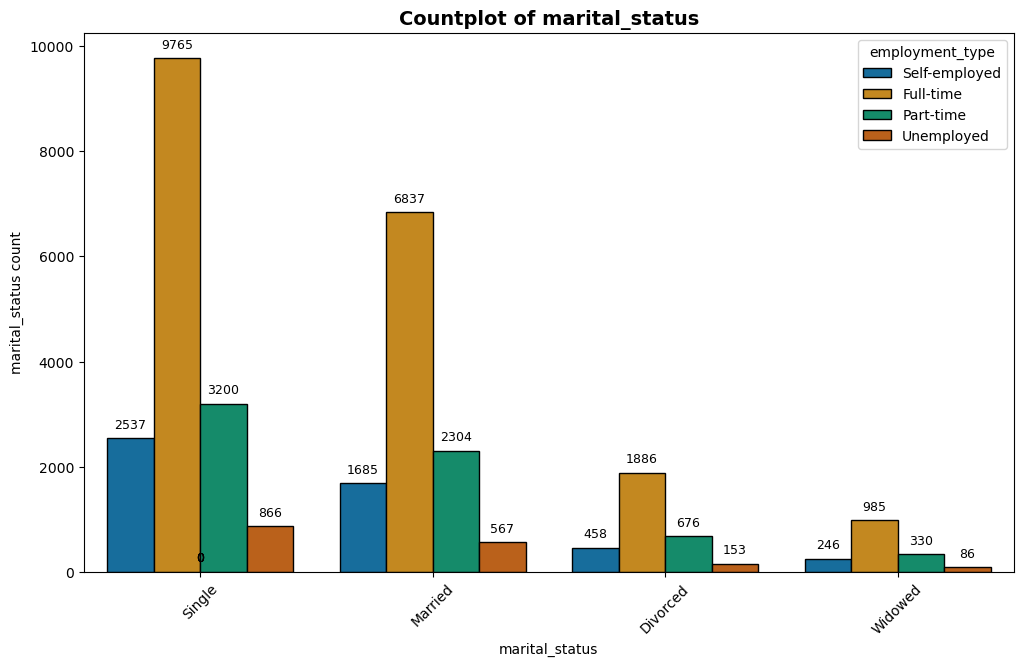

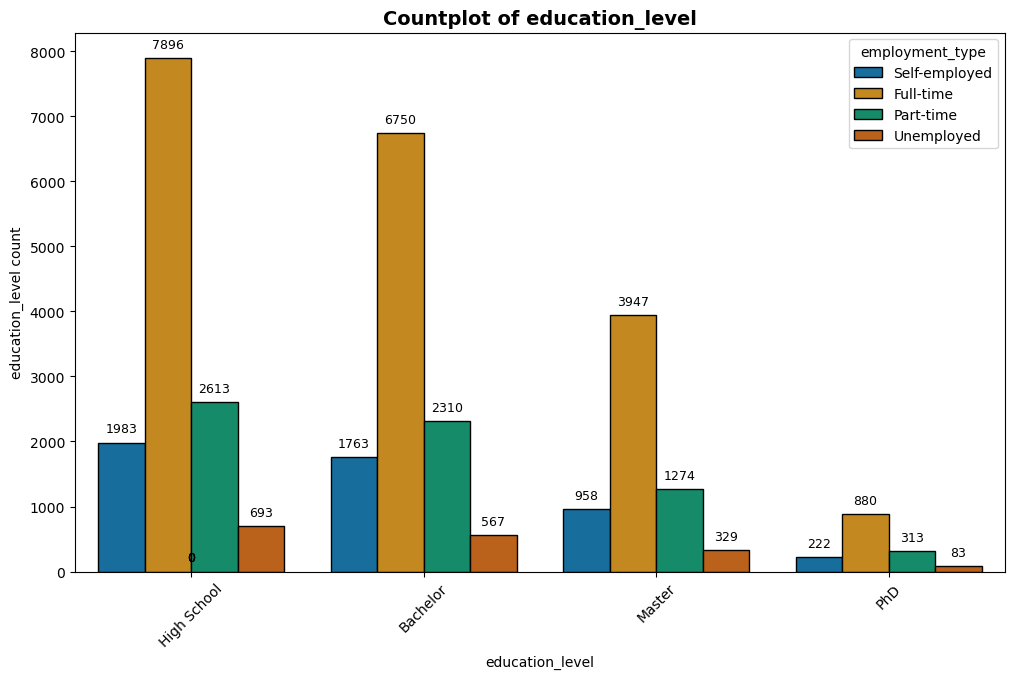

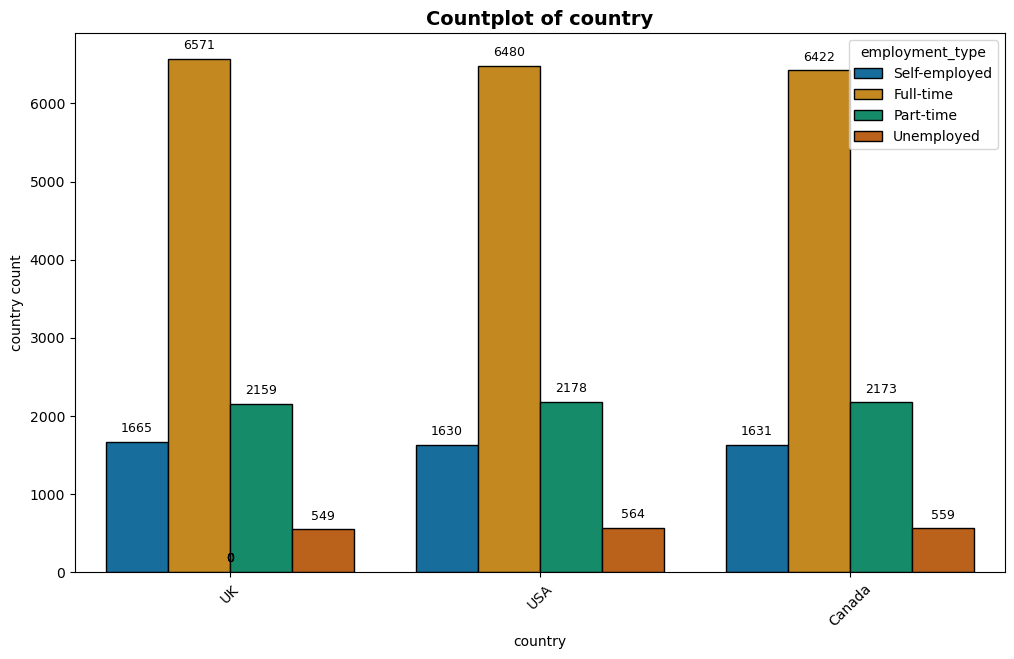

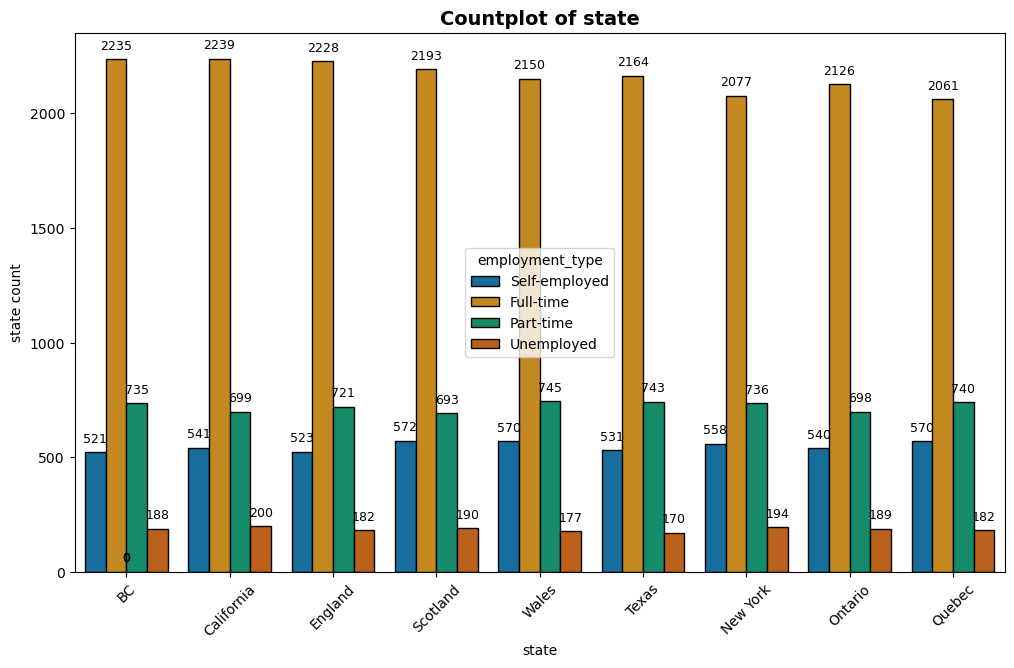

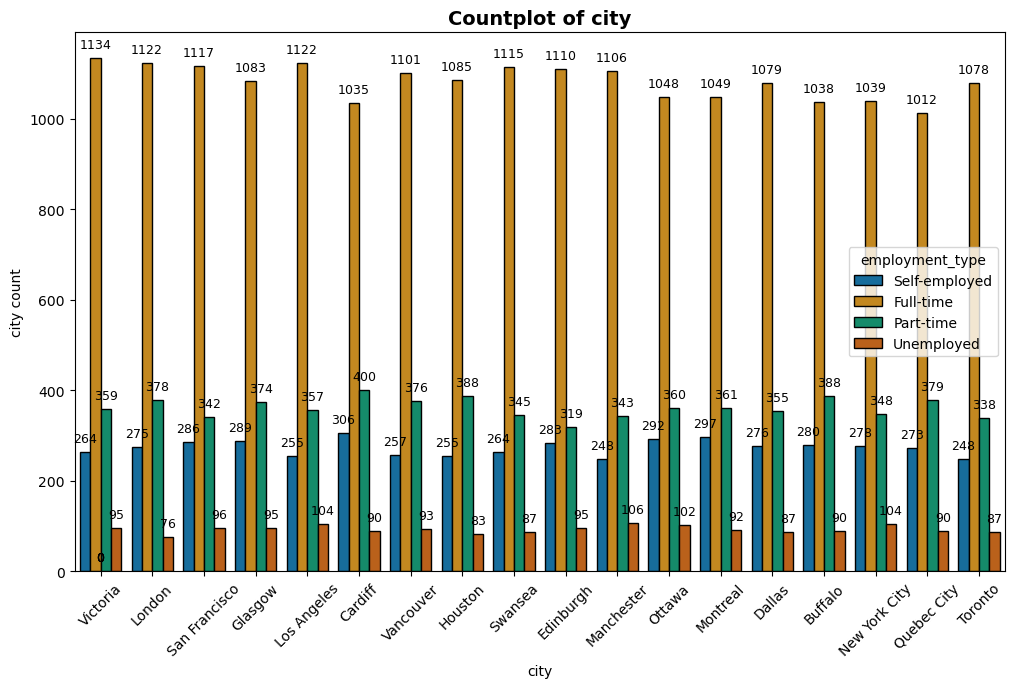

In [58]:
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','gender','marital_status','education_level',
'country','state','city']

for i,col in enumerate(categorical_columns):
    plt.figure(i,figsize=(12,7))
    ax = sns.countplot(data=df,x=col,hue = 'employment_type',palette='colorblind',edgecolor='black',order=df[col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        count = int(height)
        percentage = (height/total)*100
        
        #Count Label
        ax.annotate(f'{count}',
            (p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center', va='bottom',xytext=(0,5),
            textcoords = 'offset points',fontsize=9,color='black')
            
    plt.title(f'Countplot of {col}',fontsize =14,weight='bold')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col} count')
    plt.xticks(rotation=45)
plt.show()

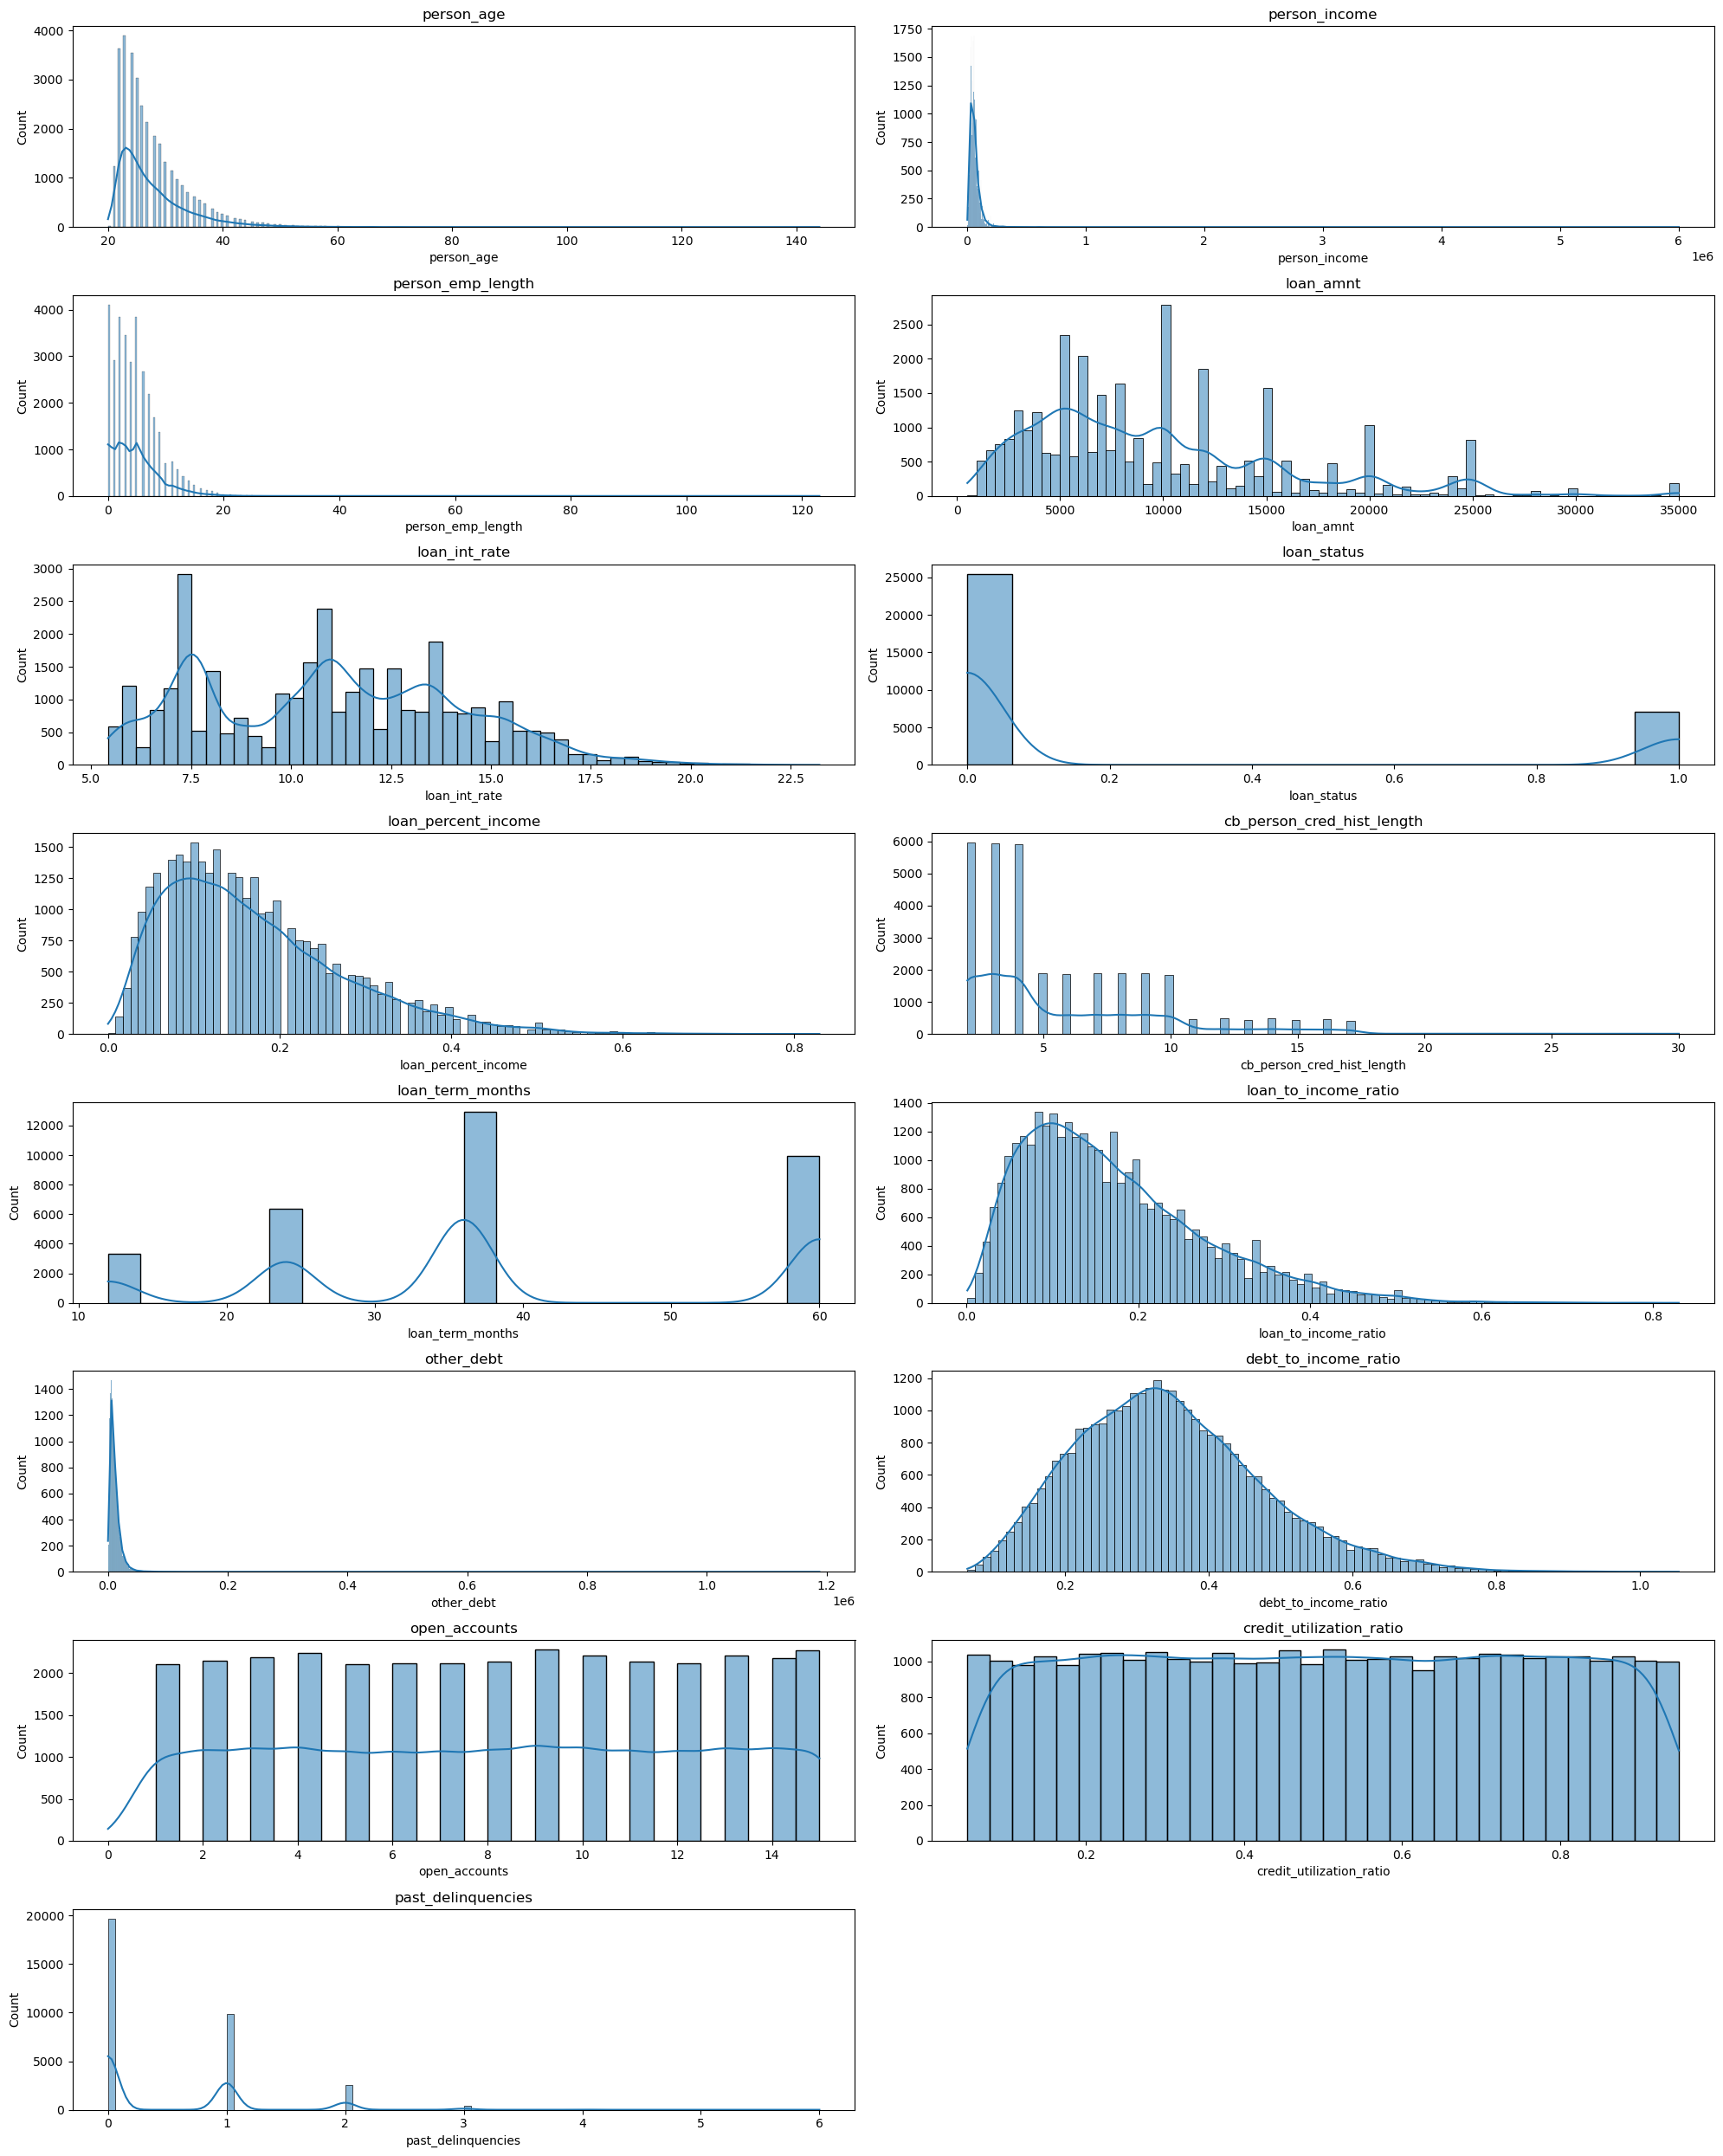

In [59]:
numerical_df = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income',
                'cb_person_cred_hist_length','loan_term_months','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts',
                'credit_utilization_ratio','past_delinquencies']

plt.figure(figsize = (20,25))

for i,col in enumerate (numerical_df):
    plt.subplot(8,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


<Axes: >

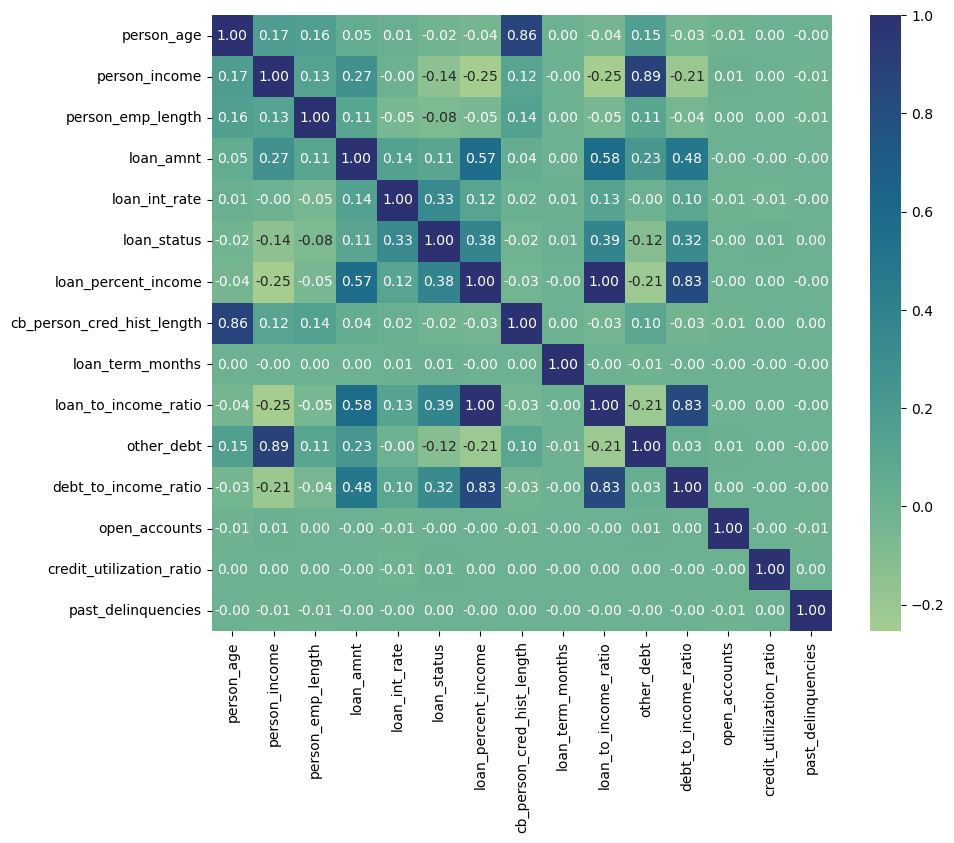

In [123]:
numerical_df = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income',
                'cb_person_cred_hist_length','loan_term_months','loan_to_income_ratio','other_debt','debt_to_income_ratio','open_accounts',
                'credit_utilization_ratio','past_delinquencies']

correlation_matrix = df[numerical_df].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='crest')


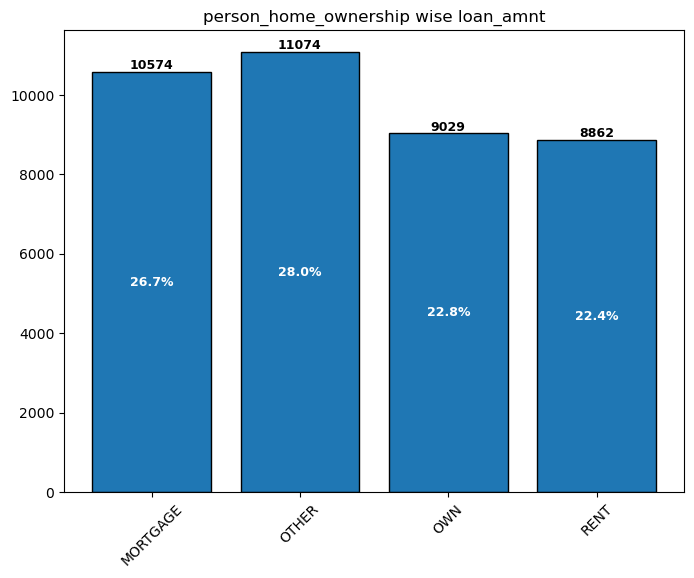

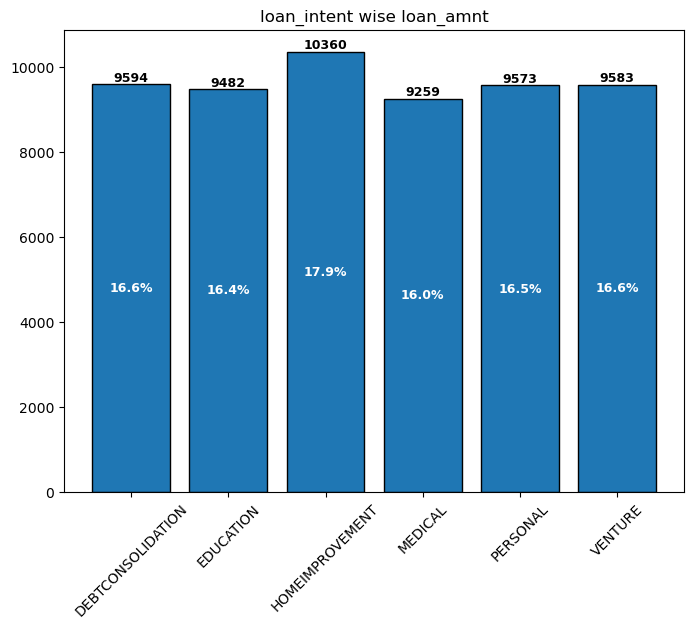

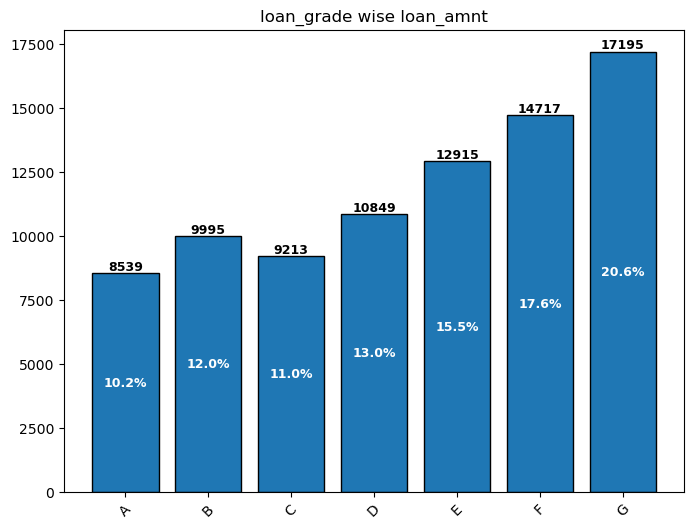

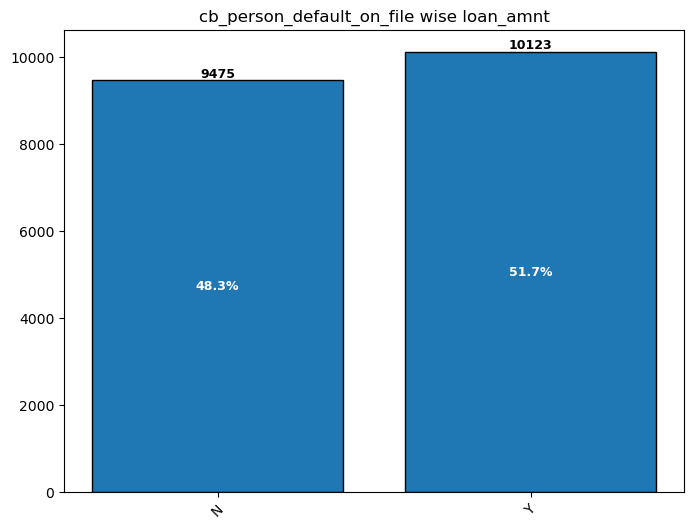

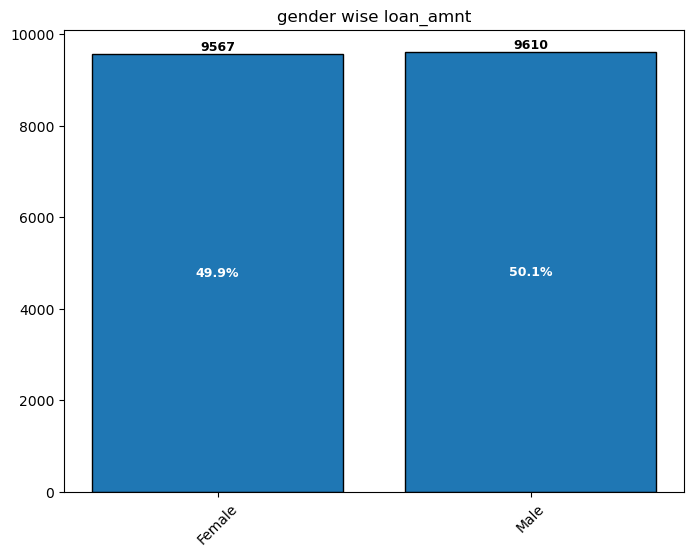

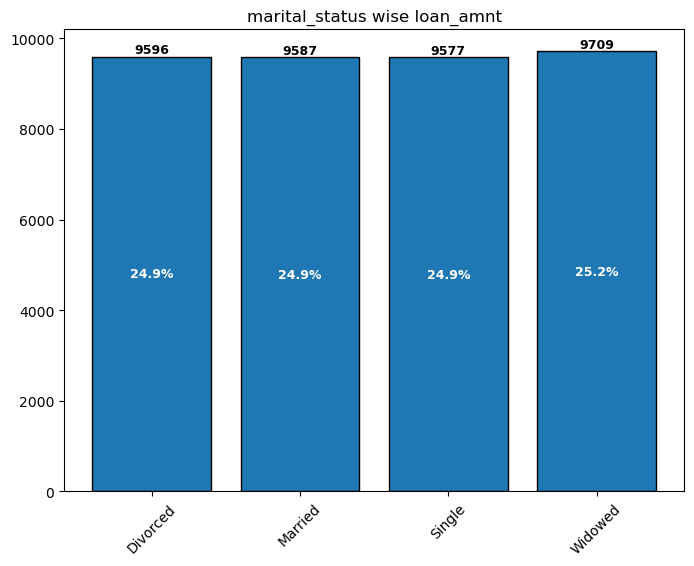

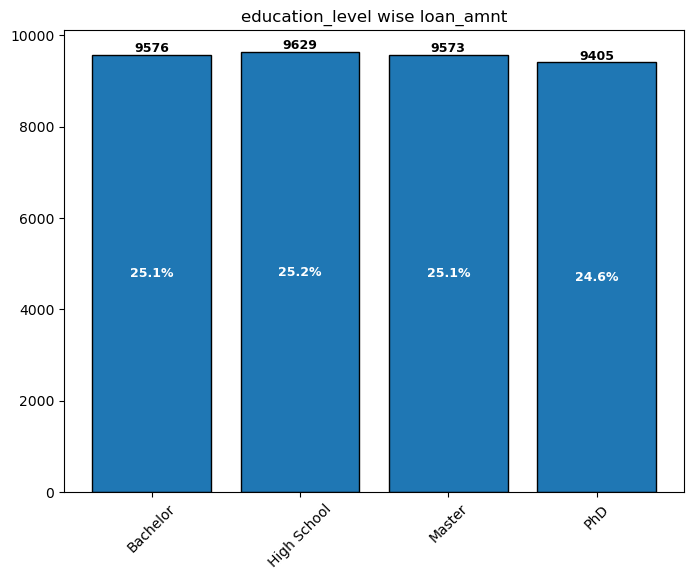

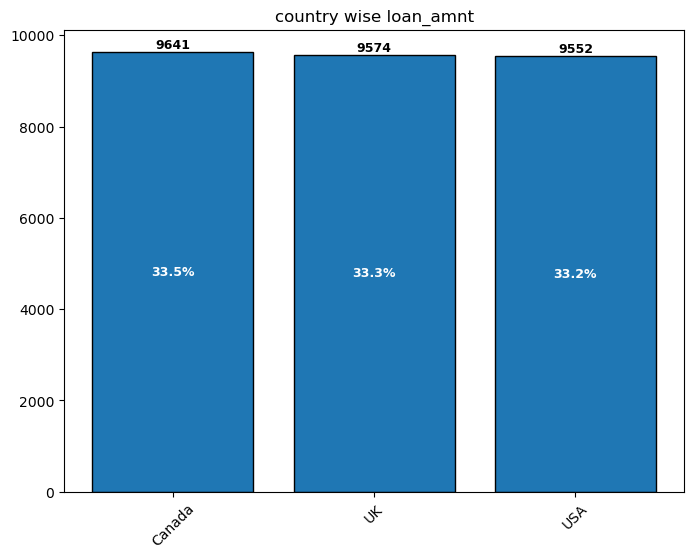

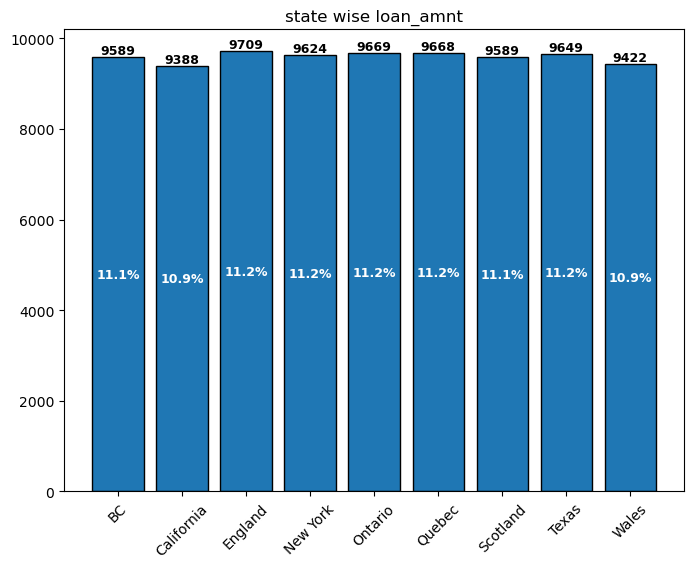

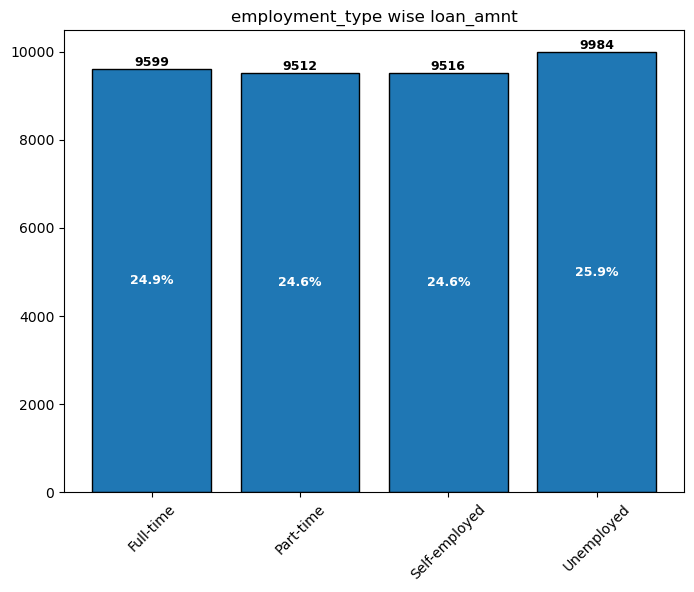

In [61]:
columns = [('person_home_ownership','loan_amnt'),
           ('loan_intent','loan_amnt'),
           ('loan_grade','loan_amnt'),
           ('cb_person_default_on_file','loan_amnt'),
           ('gender','loan_amnt'),
           ('marital_status','loan_amnt'),
           ('education_level','loan_amnt'),
           ('country','loan_amnt'),
           ('state','loan_amnt'),
           ('employment_type','loan_amnt')]

for x_col,y_col in columns:
    col = df.groupby(x_col)[y_col].mean()
    total = col.sum()
    percentage = (col/total)*100

    plt.figure(figsize=(8,6))
    bars = plt.bar(col.index,col,edgecolor='black')
    plt.xticks(rotation =45)
    plt.title(f'{x_col} wise {y_col}')

    for bar,value,pct in zip(bars,col,percentage):
        height = bar.get_height()

        plt.text(bar.get_x()+bar.get_width()/2.,
            height,f'{int(value)}',
            ha='center',va='bottom',
            fontsize=9,color='black',
            weight='bold')

        plt.text(bar.get_x()+bar.get_width()/2.,
            height/2,f'{pct:.1f}%',
            ha='center',va='center',
            fontsize=9,color='white',
            weight='bold')
plt.show()

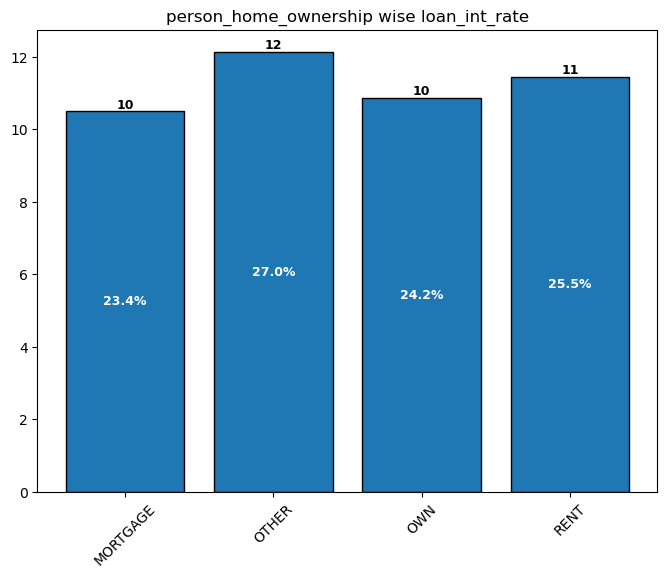

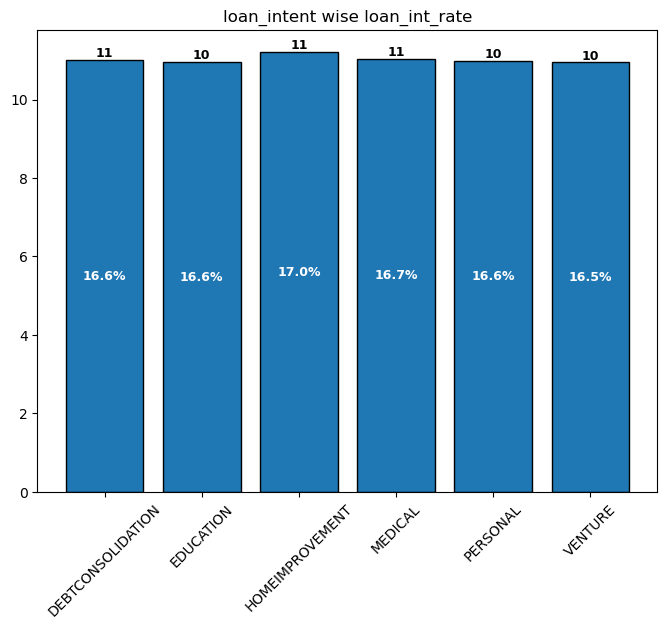

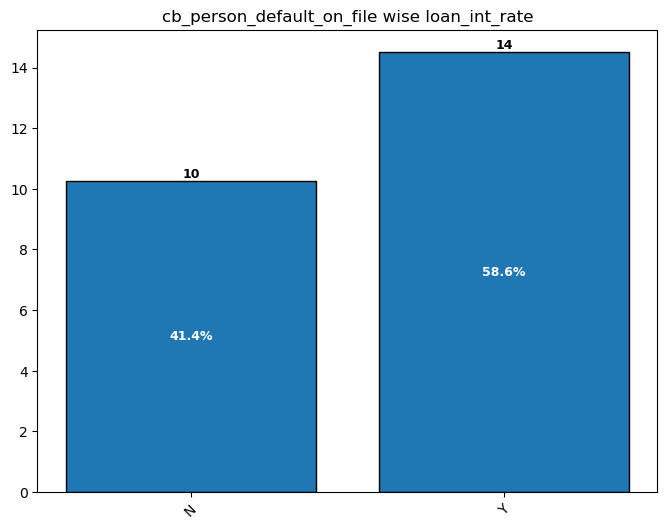

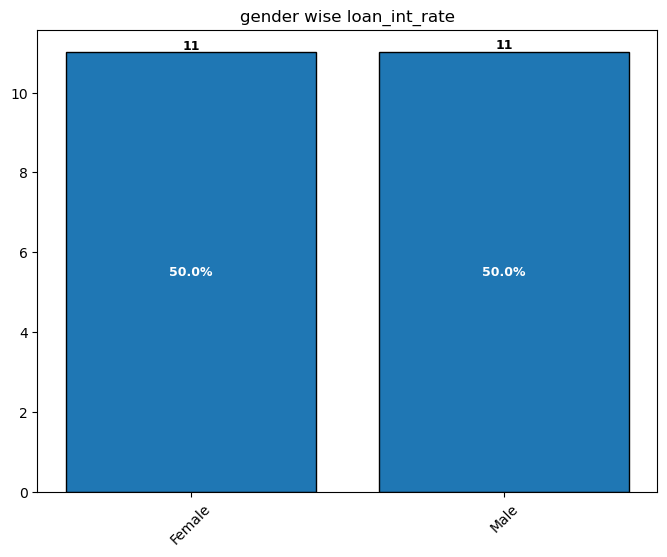

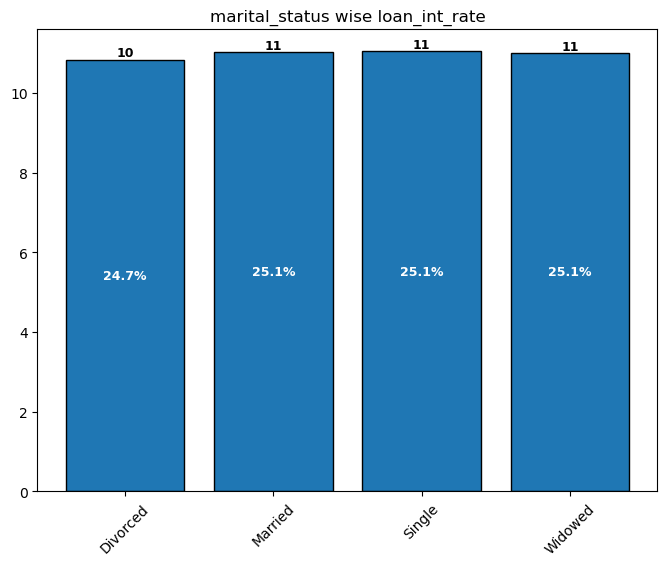

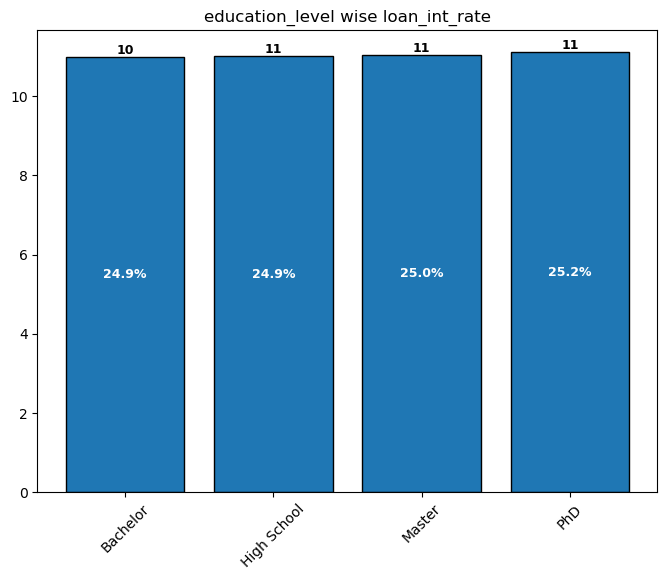

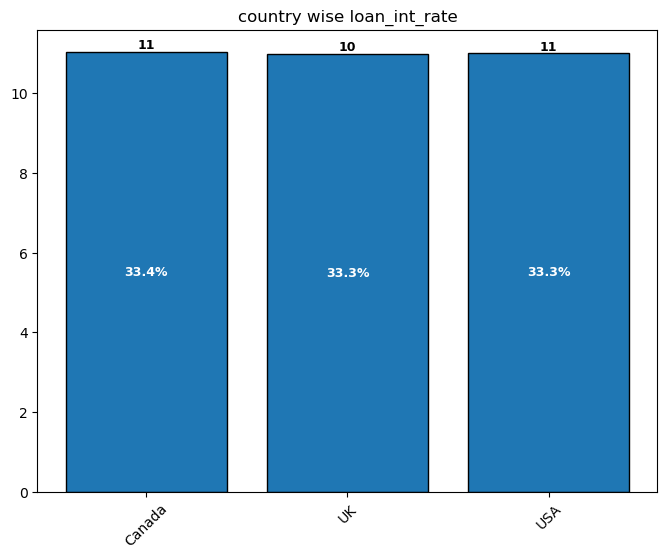

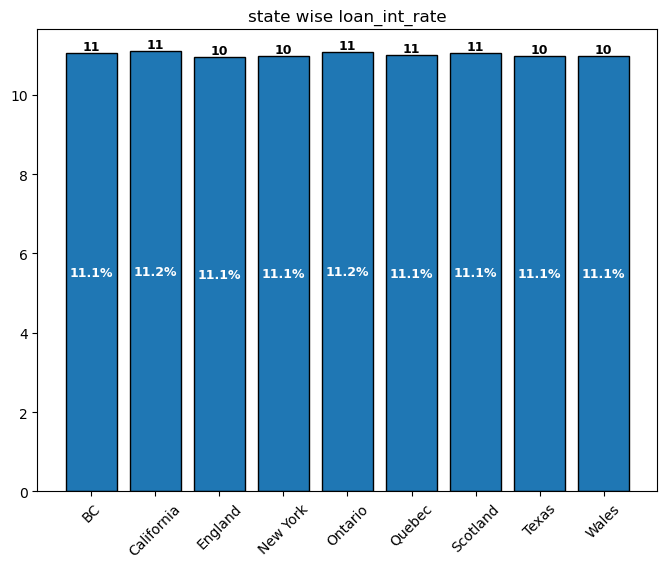

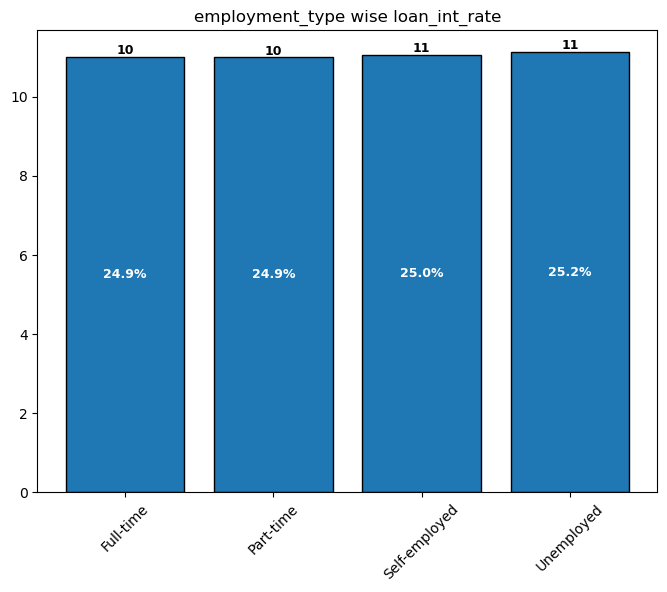

In [62]:
columns = [('person_home_ownership','loan_int_rate'),
           ('loan_intent','loan_int_rate'),
           ('cb_person_default_on_file','loan_int_rate'),
           ('gender','loan_int_rate'),
           ('marital_status','loan_int_rate'),
           ('education_level','loan_int_rate'),
           ('country','loan_int_rate'),
           ('state','loan_int_rate'),
           ('employment_type','loan_int_rate')]

for x_col,y_col in columns:
    col = df.groupby(x_col)[y_col].mean()
    total = col.sum()
    percentage = (col/total)*100

    plt.figure(figsize=(8,6))
    bars = plt.bar(col.index,col,edgecolor='black')
    plt.xticks(rotation =45)
    plt.title(f'{x_col} wise {y_col}')

    for bar,value,pct in zip(bars,col,percentage):
        height = bar.get_height()

        plt.text(bar.get_x()+bar.get_width()/2.,
            height,f'{int(value)}',
            ha='center',va='bottom',
            fontsize=9,color='black',
            weight='bold')

        plt.text(bar.get_x()+bar.get_width()/2.,
            height/2,f'{pct:.1f}%',
            ha='center',va='center',
            fontsize=9,color='white',
            weight='bold')
plt.show()

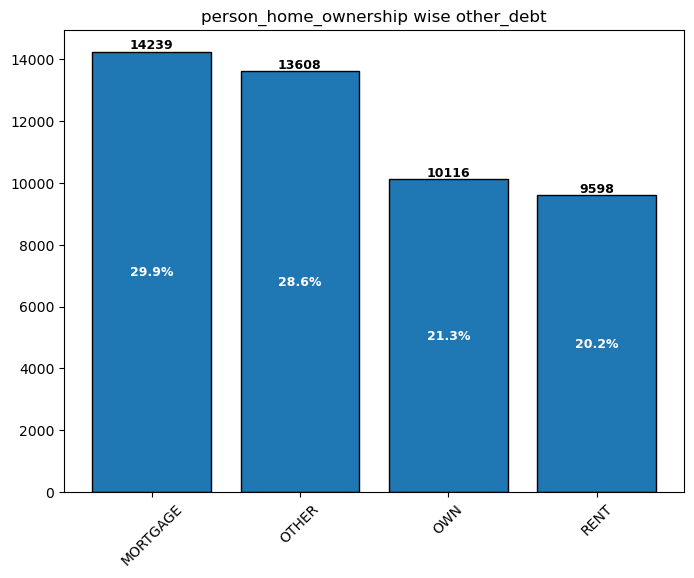

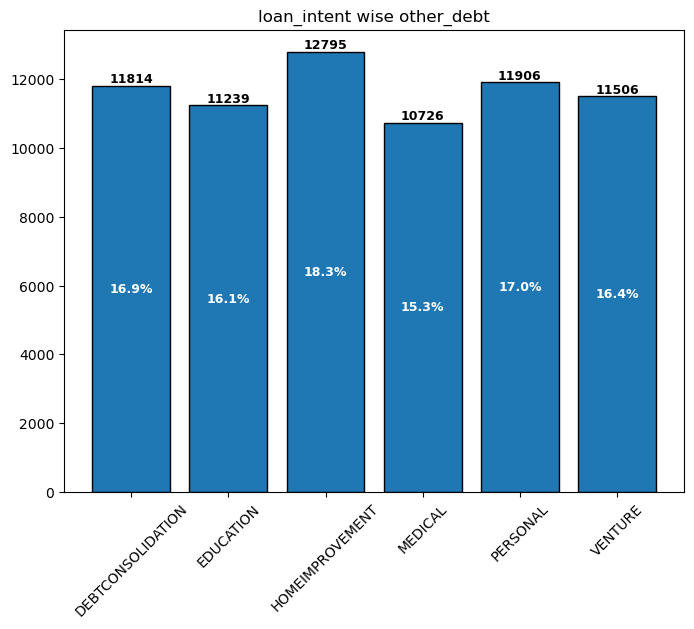

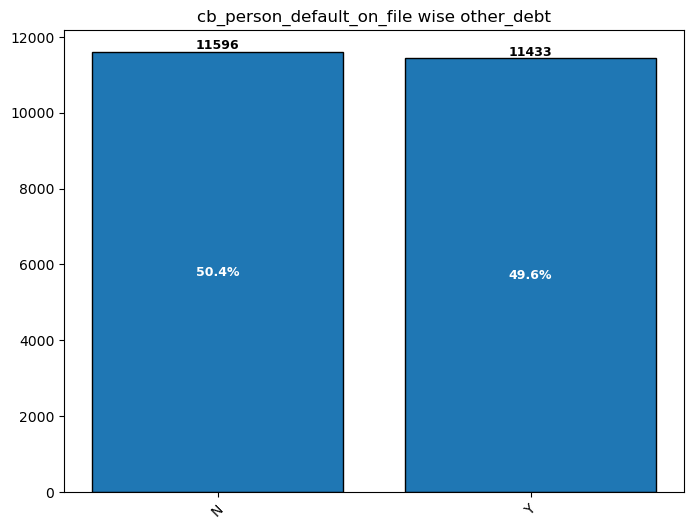

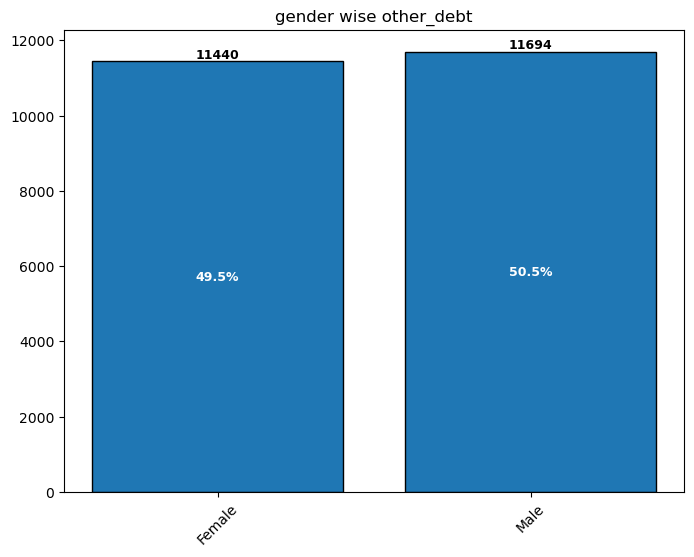

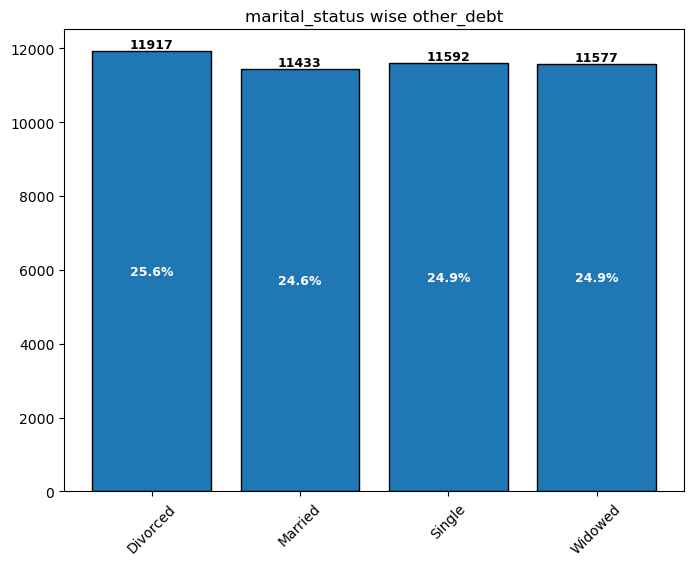

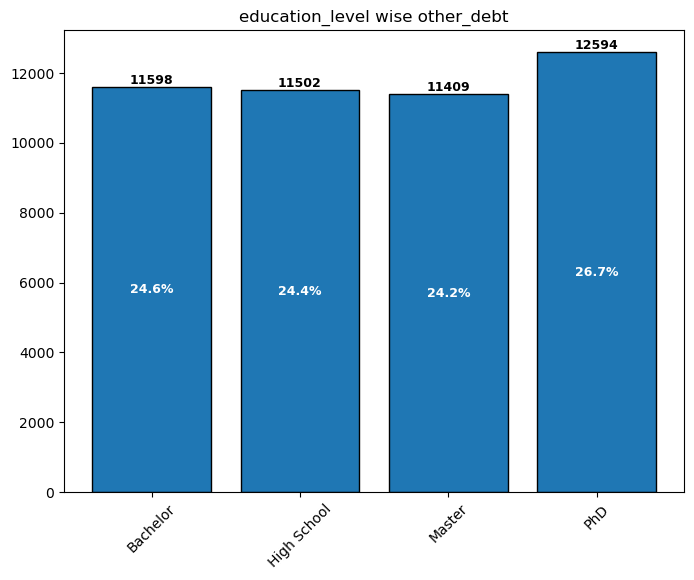

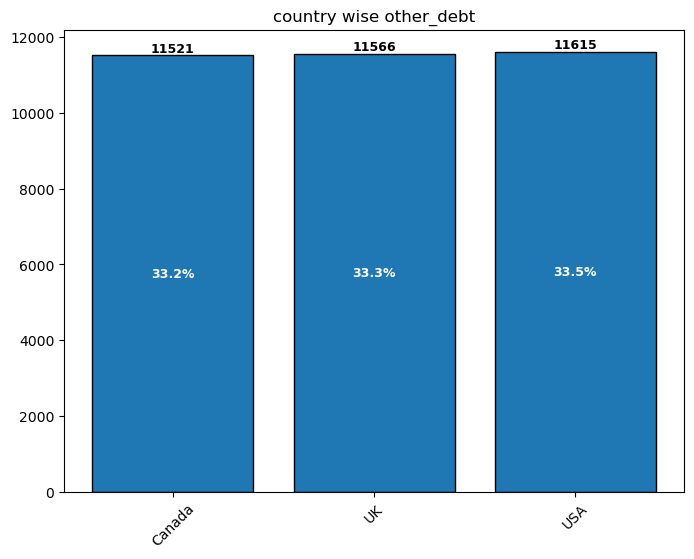

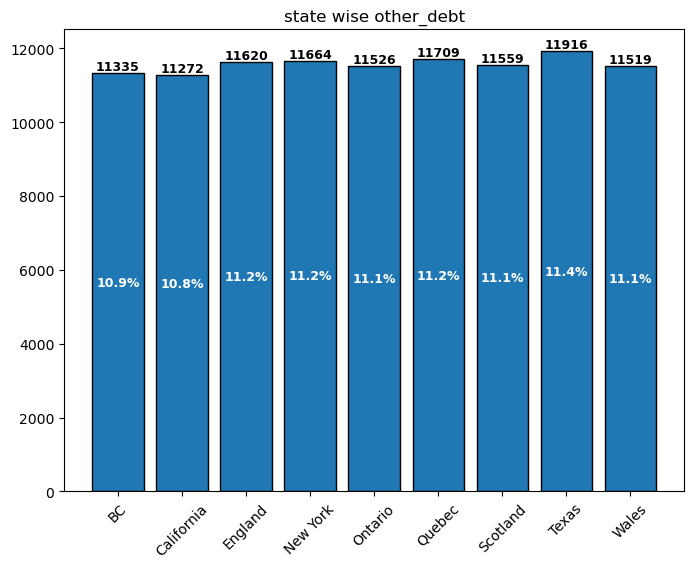

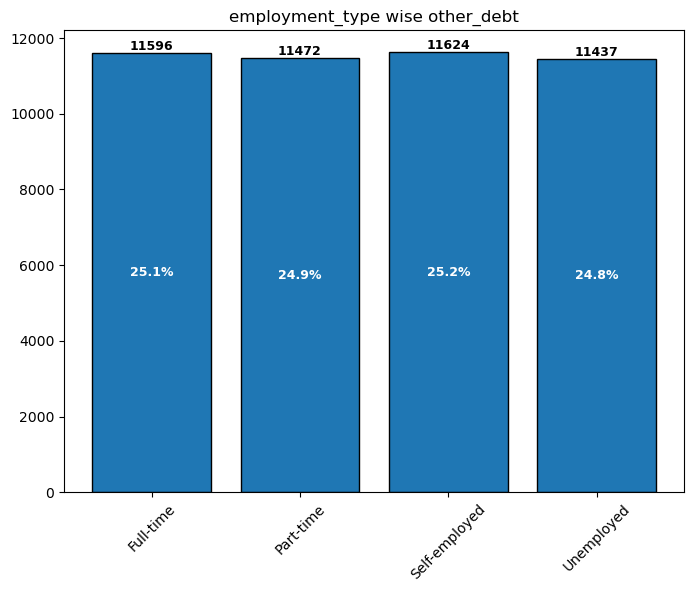

In [63]:

columns = [('person_home_ownership','other_debt'),
           ('loan_intent','other_debt'),
           ('cb_person_default_on_file','other_debt'),
           ('gender','other_debt'),
           ('marital_status','other_debt'),
           ('education_level','other_debt'),
           ('country','other_debt'),
           ('state','other_debt'),
           ('employment_type','other_debt')]

for x_col,y_col in columns:
    col = df.groupby(x_col)[y_col].mean()
    total = col.sum()
    percentage = (col/total)*100

    plt.figure(figsize=(8,6))
    bars = plt.bar(col.index,col,edgecolor='black')
    plt.xticks(rotation =45)
    plt.title(f'{x_col} wise {y_col}')

    for bar,value,pct in zip(bars,col,percentage):
        height = bar.get_height()

        plt.text(bar.get_x()+bar.get_width()/2.,
            height,f'{int(value)}',
            ha='center',va='bottom',
            fontsize=9,color='black',
            weight='bold')

        plt.text(bar.get_x()+bar.get_width()/2.,
            height/2,f'{pct:.1f}%',
            ha='center',va='center',
            fontsize=9,color='white',
            weight='bold')

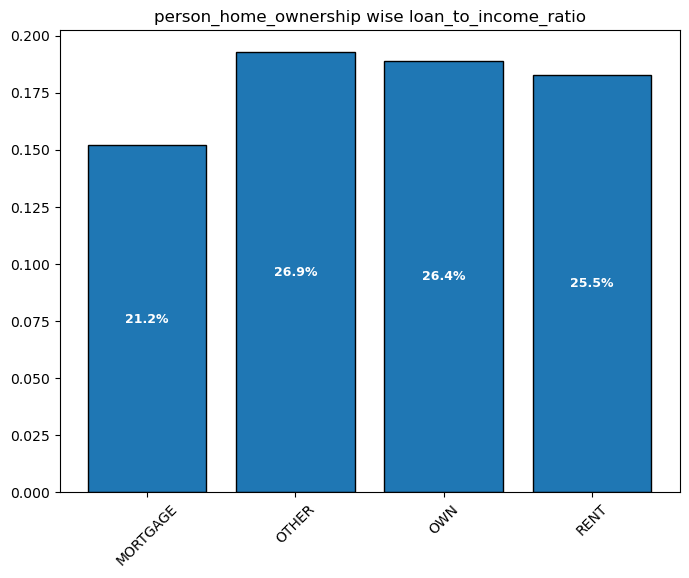

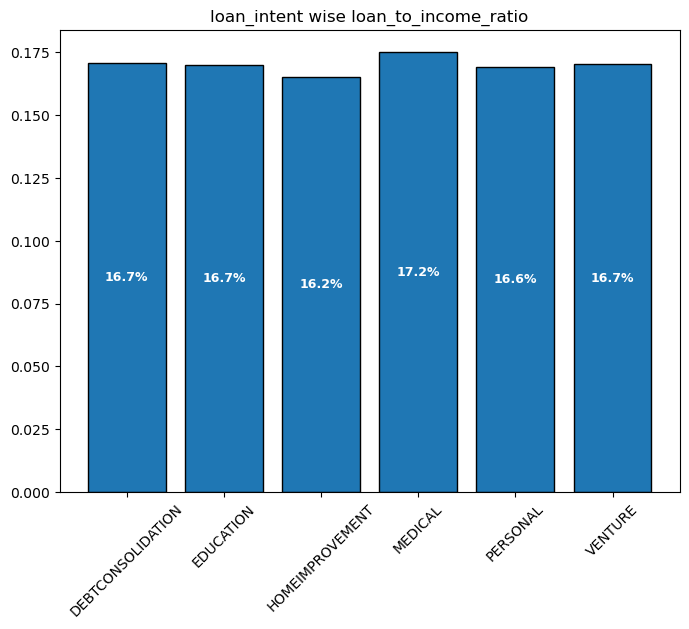

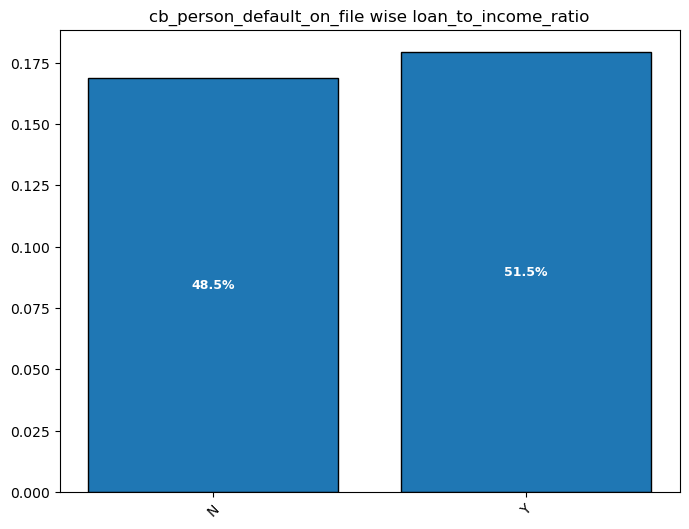

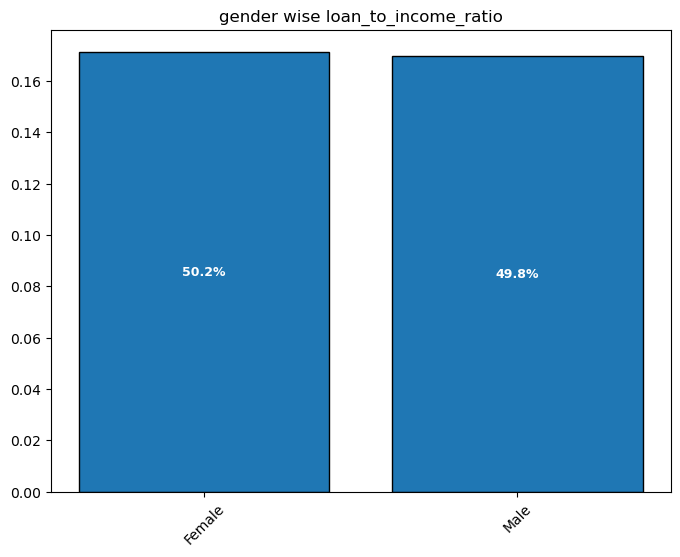

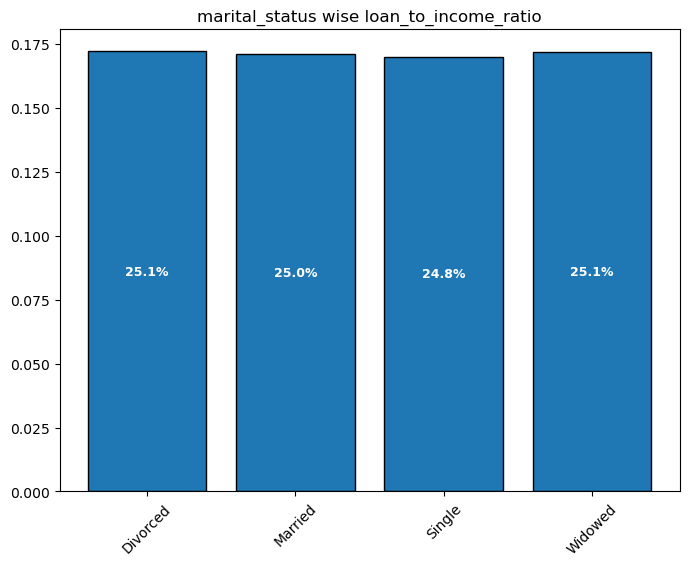

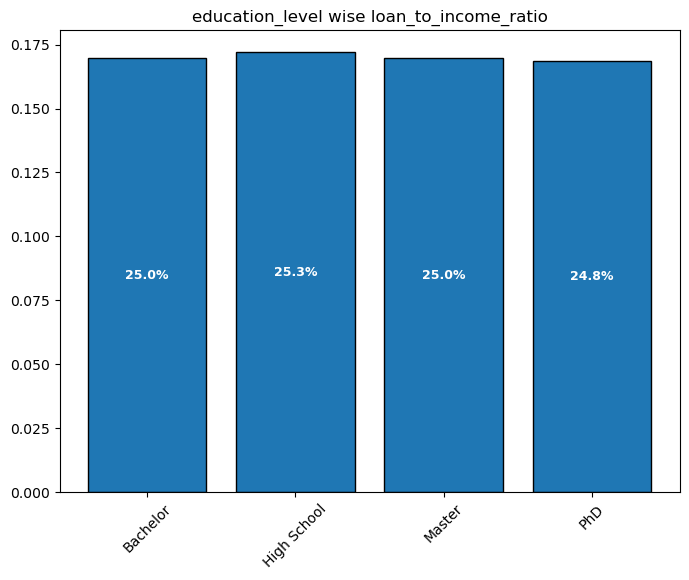

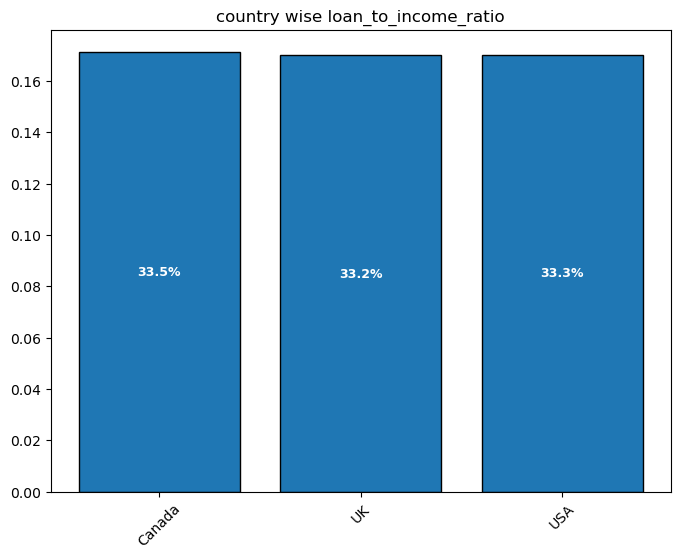

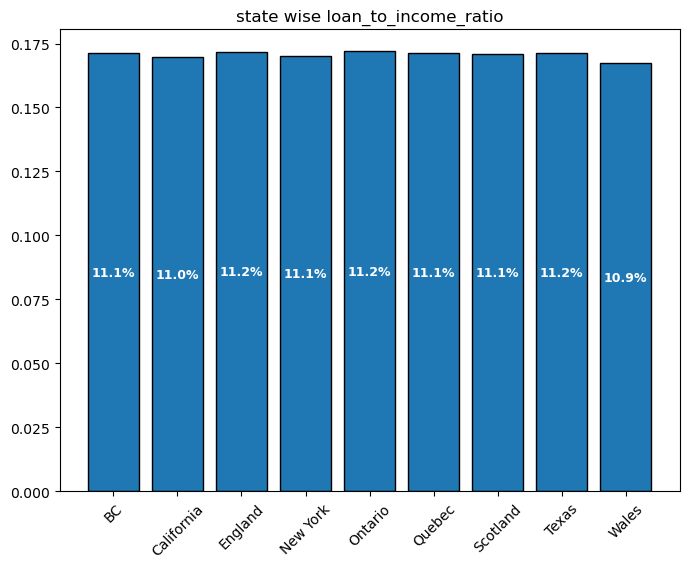

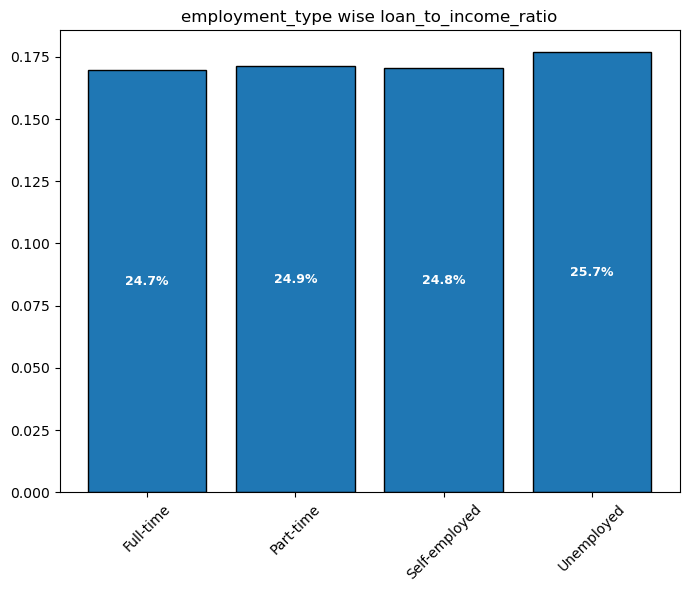

In [64]:
columns = [('person_home_ownership','loan_to_income_ratio'),
           ('loan_intent','loan_to_income_ratio'),
           ('cb_person_default_on_file','loan_to_income_ratio'),
           ('gender','loan_to_income_ratio'),
           ('marital_status','loan_to_income_ratio'),
           ('education_level','loan_to_income_ratio'),
           ('country','loan_to_income_ratio'),
           ('state','loan_to_income_ratio'),
           ('employment_type','loan_to_income_ratio')]

for x_col,y_col in columns:
    col = df.groupby(x_col)[y_col].mean()
    total = col.sum()
    percentage = (col/total)*100

    plt.figure(figsize=(8,6))
    bars = plt.bar(col.index,col,edgecolor='black')
    plt.xticks(rotation =45)
    plt.title(f'{x_col} wise {y_col}')

    for bar,value,pct in zip(bars,col,percentage):
        height = bar.get_height()

        plt.text(bar.get_x()+bar.get_width()/2.,
            height/2,f'{pct:.1f}%',
            ha='center',va='center',
            fontsize=9,color='white',
            weight='bold')

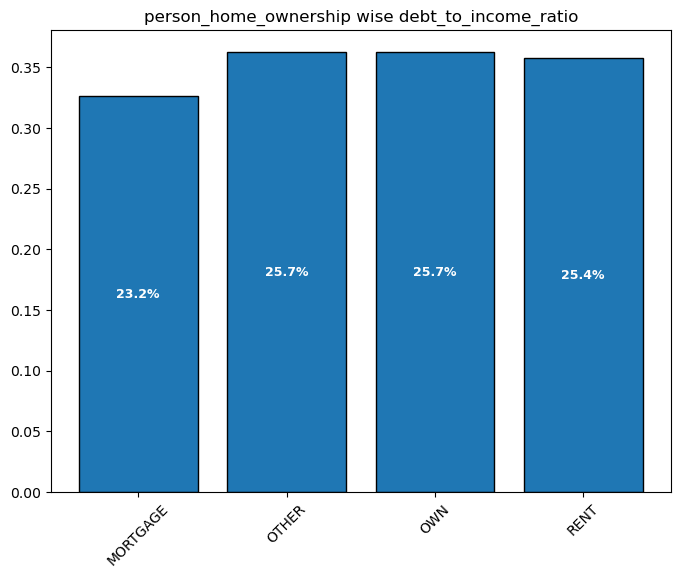

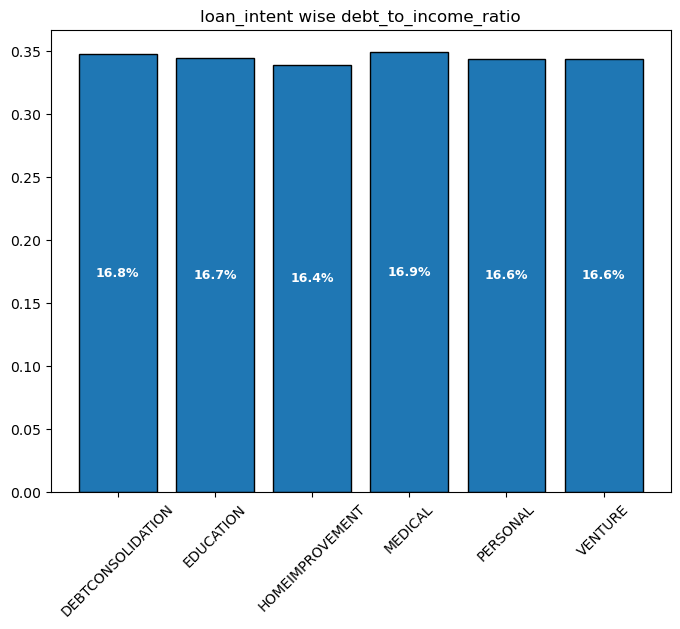

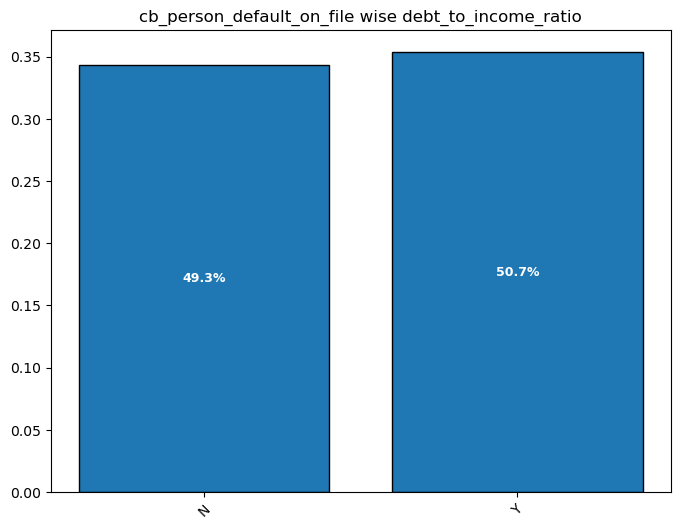

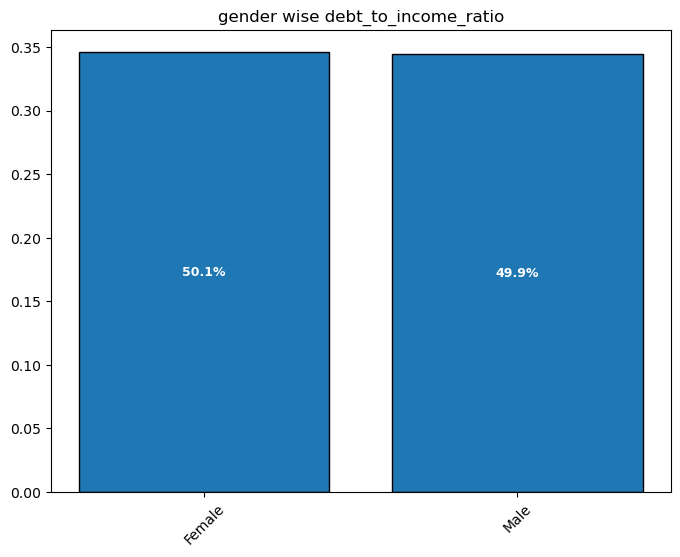

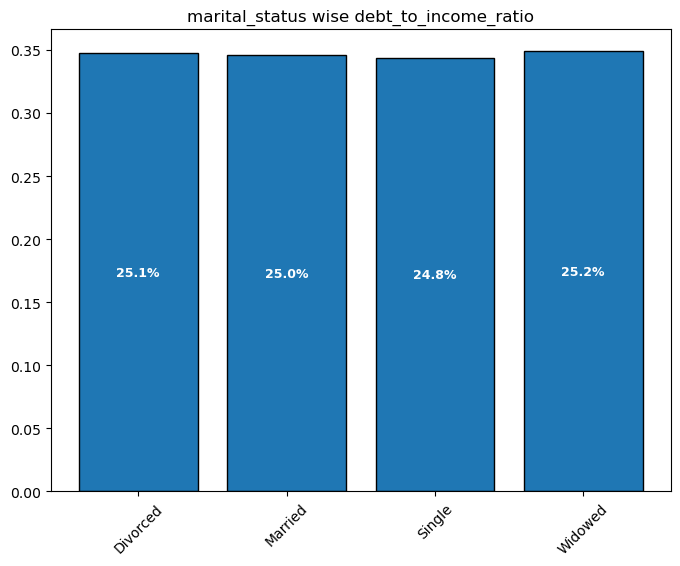

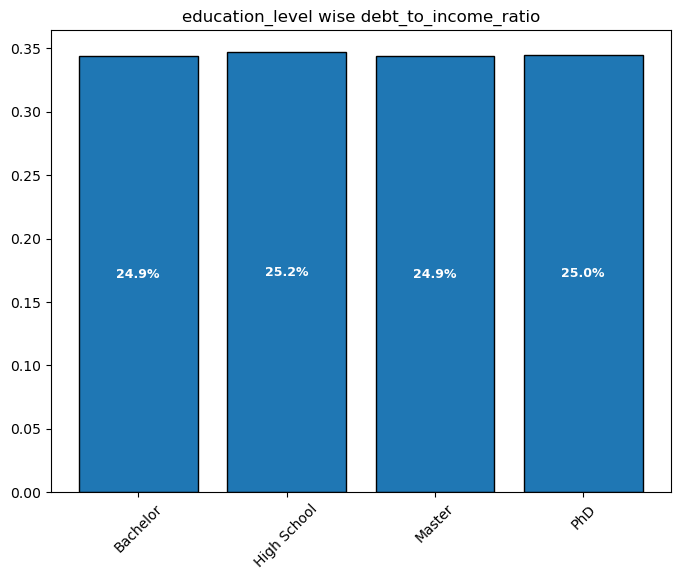

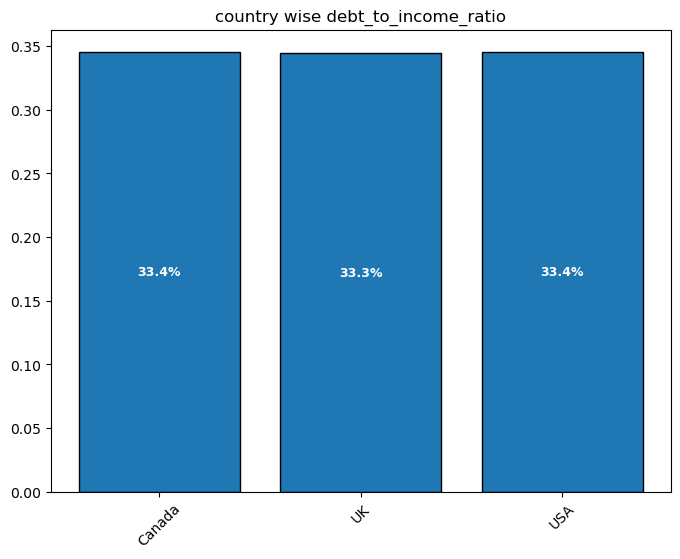

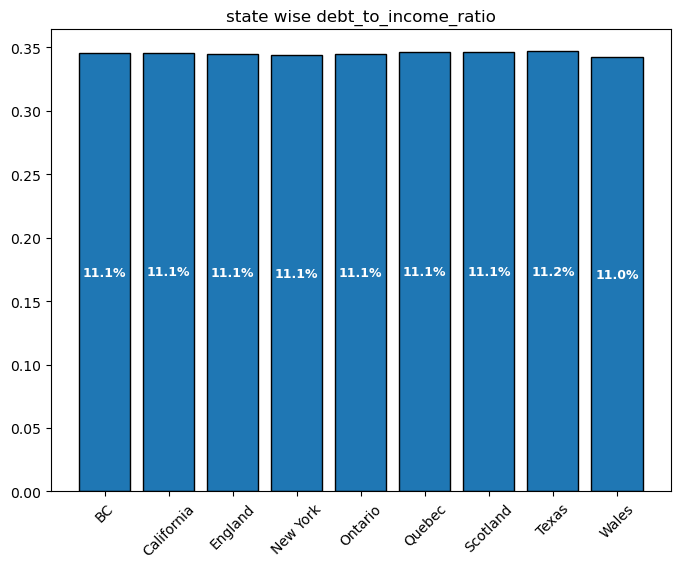

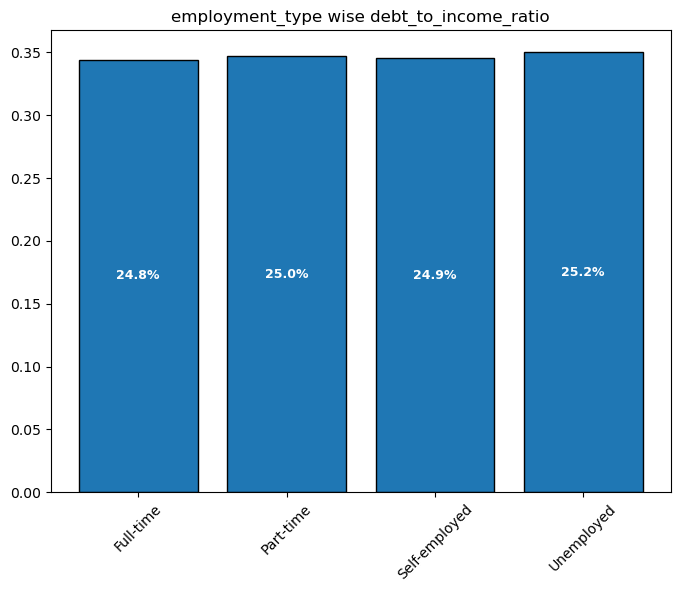

In [65]:
columns = [('person_home_ownership','debt_to_income_ratio'),
           ('loan_intent','debt_to_income_ratio'),
           ('cb_person_default_on_file','debt_to_income_ratio'),
           ('gender','debt_to_income_ratio'),
           ('marital_status','debt_to_income_ratio'),
           ('education_level','debt_to_income_ratio'),
           ('country','debt_to_income_ratio'),
           ('state','debt_to_income_ratio'),
           ('employment_type','debt_to_income_ratio')]

for x_col,y_col in columns:
    col = df.groupby(x_col)[y_col].mean()
    total = col.sum()
    percentage = (col/total)*100

    plt.figure(figsize=(8,6))
    bars = plt.bar(col.index,col,edgecolor='black')
    plt.xticks(rotation =45)
    plt.title(f'{x_col} wise {y_col}')

    for bar,value,pct in zip(bars,col,percentage):
        height = bar.get_height()

        plt.text(bar.get_x()+bar.get_width()/2.,
            height/2,f'{pct:.1f}%',
            ha='center',va='center',
            fontsize=9,color='white',
            weight='bold')